# SK 유동인구데이터 22시 - 02시 / 03시 - 08시 Diff 보기

In [2]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager
from matplotlib import rc
from IPython.core.display import display, HTML
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler

In [3]:
# display 설정
display(HTML("<style>.container { width:90% !important; }</style>"))

In [4]:
# 한글 폰트 설정
path= 'c:/Windows/Fonts/malgun.ttf'
font_name= font_manager.FontProperties(fname= path).get_name()
plt.rcParams['font.family']= font_name

# 마이너스 깨짐 설정
import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False

In [5]:
path= 'c:/Users/soohan/bigcontest/dataset/BIGCON_DATA_ver1.2'

with open(path+'/CJ_DATA.bin', 'rb') as f:
    cj = pickle.load(f)

with open(path+'/GS_DATA.bin', 'rb') as f:
    gs = pickle.load(f)
    
with open(path+'/SH_DATA.bin', 'rb') as f:
    sh = pickle.load(f)
    
with open(path+'/SK_DATA.bin', 'rb') as f:
    sk = pickle.load(f)
    
with open(path+'/WS_DATA.bin', 'rb') as f:
    ws = pickle.load(f)

In [6]:
# cj data
cj_data= cj['CJ_DATA']

# gs data
gs_total_data= gs['GS_TOTAL']
gs_category_data= gs['GS_CATEGORY']
gs_dong_data= gs['GS_DONG']

# sh data
sh_resident_data= sh['SH_RESIDENT']
sh_foreign_data= sh['SH_FOREIGN']

# sk data
sk_age_data= sk['SK_AGE']
sk_time_data= sk['SK_TIME']

# ws data
ws_mention_data= ws['WS_MENTION']
ws_sentiment_data= ws['WS_SENTIMENT']
ws_topic_data= ws['WS_TOPIC']

# Base Data Preprocessing

In [7]:
sk_time_2019_2202= sk_time_data[sk_time_data.YEAR == 2019].groupby(['DATE','DONG_NM'])[['TMST_22','TMST_23','TMST_00','TMST_01','TMST_02']].sum().sum(axis=1).reset_index().rename(columns= {0: 'TMST_22_02'})
sk_time_2019_0308= sk_time_data[sk_time_data.YEAR == 2019].groupby(['DATE','DONG_NM'])[['TMST_03','TMST_04','TMST_05','TMST_06','TMST_07','TMST_08']].sum().sum(axis=1).reset_index().rename(columns= {0:'TMST_03_08'})
sk_time_2020_2202= sk_time_data[sk_time_data.YEAR == 2020].groupby(['DATE','DONG_NM'])[['TMST_22','TMST_23','TMST_00','TMST_01','TMST_02']].sum().sum(axis=1).reset_index().rename(columns= {0: 'TMST_22_02'})
sk_time_2020_0308= sk_time_data[sk_time_data.YEAR == 2020].groupby(['DATE','DONG_NM'])[['TMST_03','TMST_04','TMST_05','TMST_06','TMST_07','TMST_08']].sum().sum(axis=1).reset_index().rename(columns= {0:'TMST_03_08'})

## 22시 - 02시

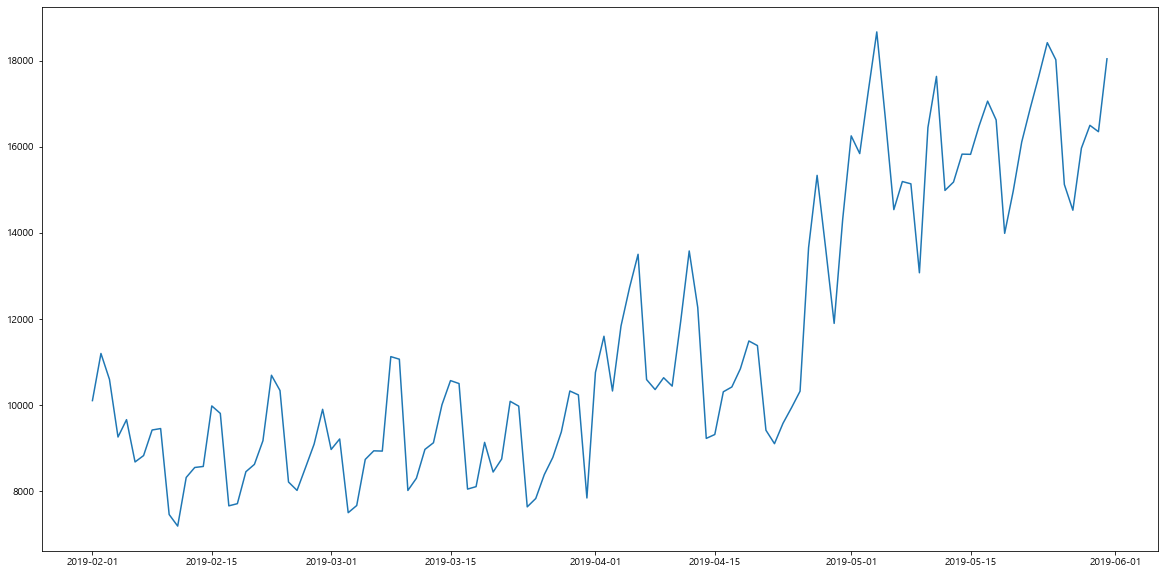

In [7]:
# 동 plot 조회하기
name_search= '고산1동'

plt.figure(figsize= (20,10))
plt.plot(sk_time_2019_2202[sk_time_2019_2202.DONG_NM == name_search].iloc[:,0], sk_time_2019_2202[sk_time_2019_2202.DONG_NM == name_search].iloc[:,2])
plt.show()

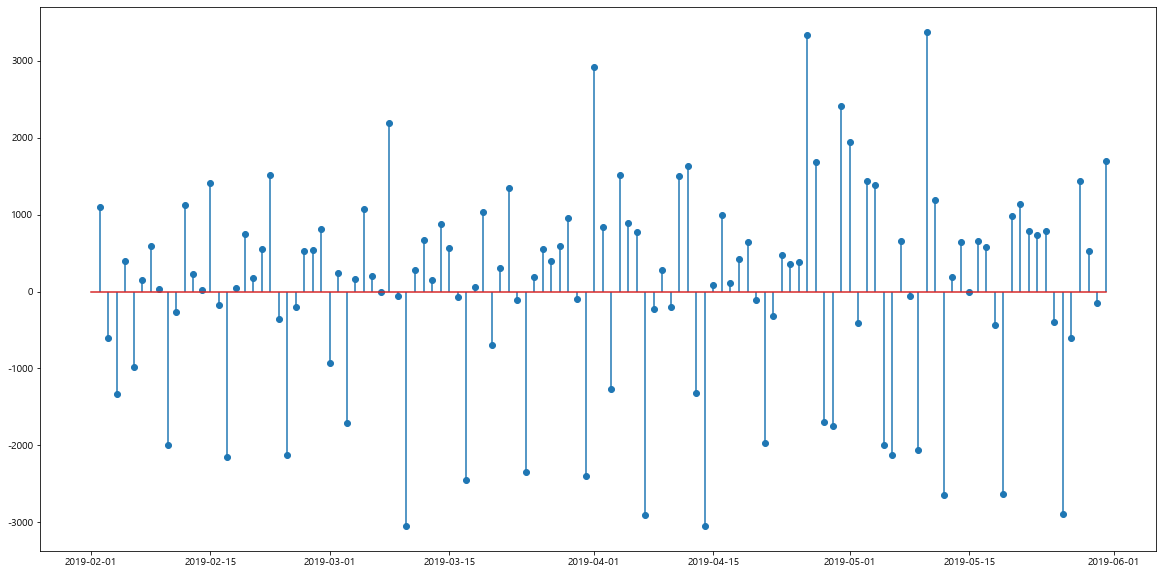

In [8]:
# 동 diff 조회하기
name_search = '고산1동'
diff= 1
diff_pd_search= pd.DataFrame({'DATE': sk_time_2019_2202.query("DONG_NM == @name_search").DATE ,'DIFF1': sk_time_2019_2202.query("DONG_NM == @name_search").iloc[:,2] - sk_time_2019_2202.query("DONG_NM == @name_search").iloc[:,2].shift(diff)})

plt.figure(figsize= (20,10))
plt.stem(diff_pd_search.iloc[:,0],diff_pd_search.iloc[:,1], use_line_collection= True)
plt.show()

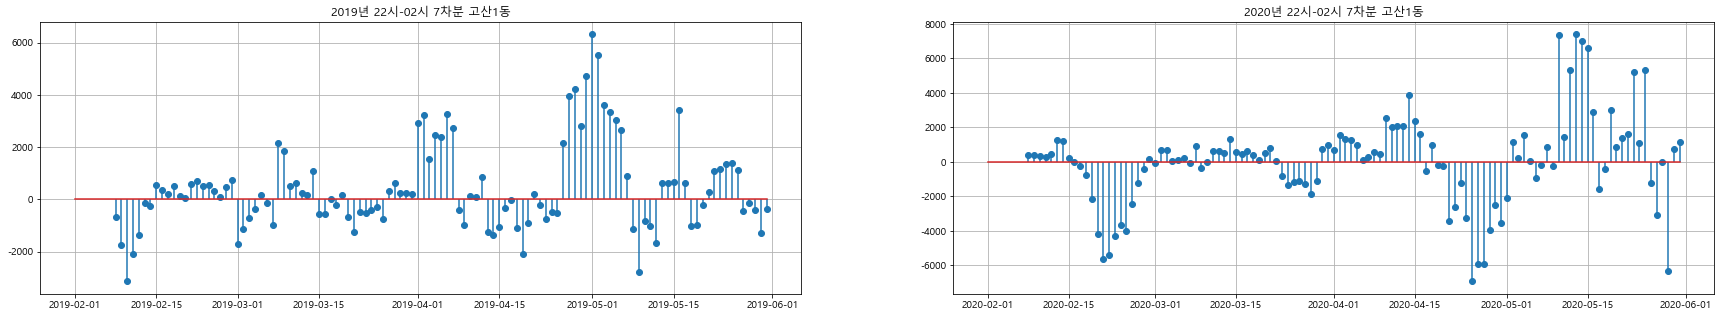

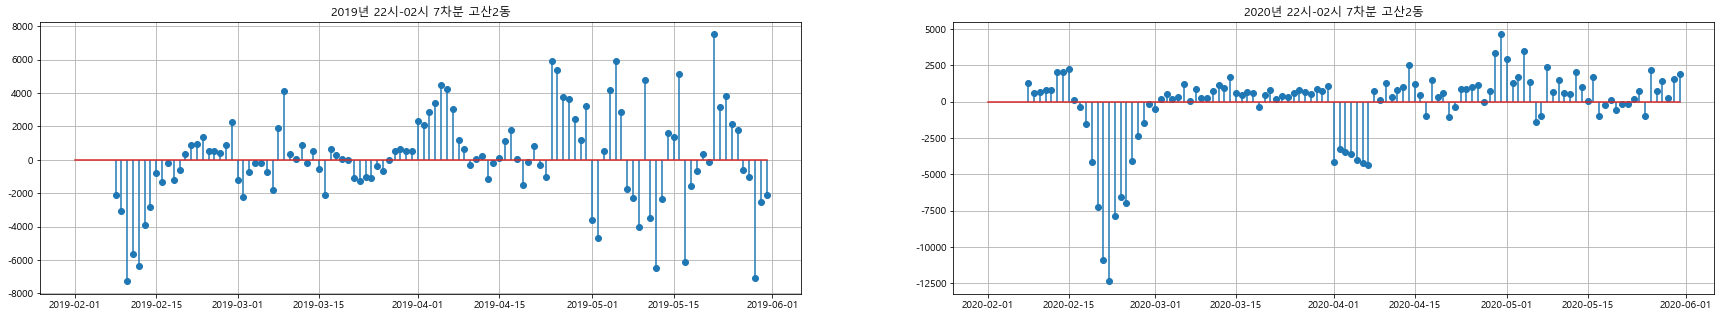

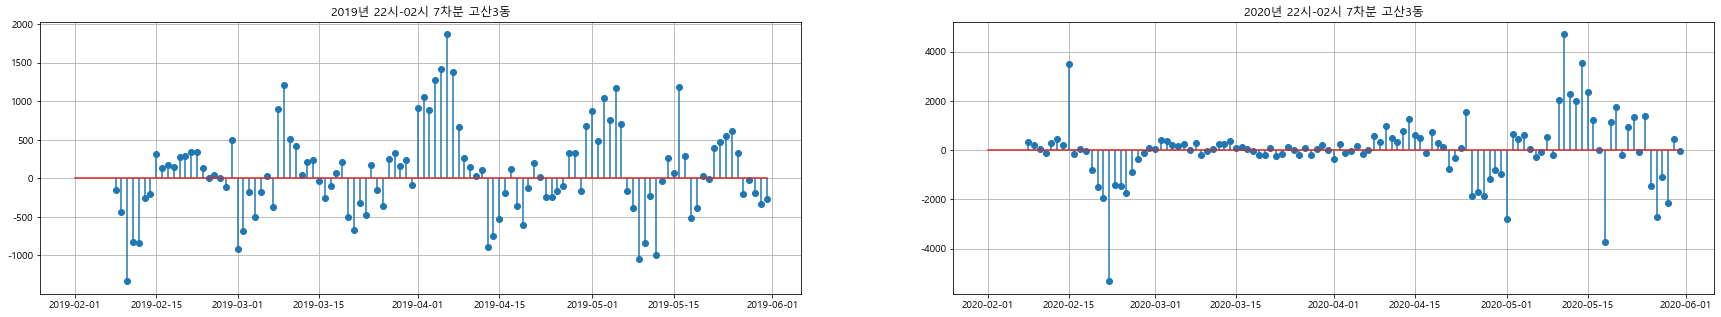

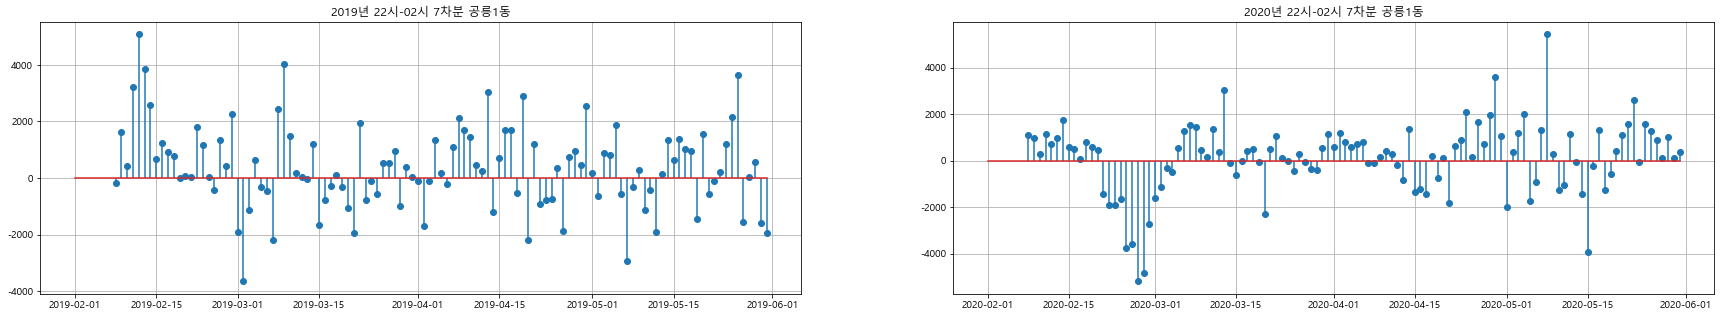

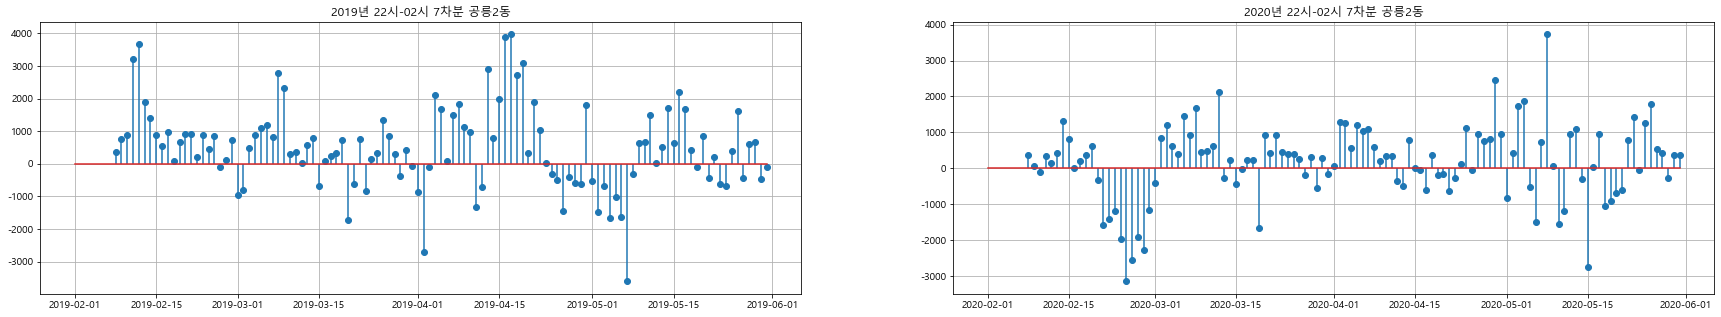

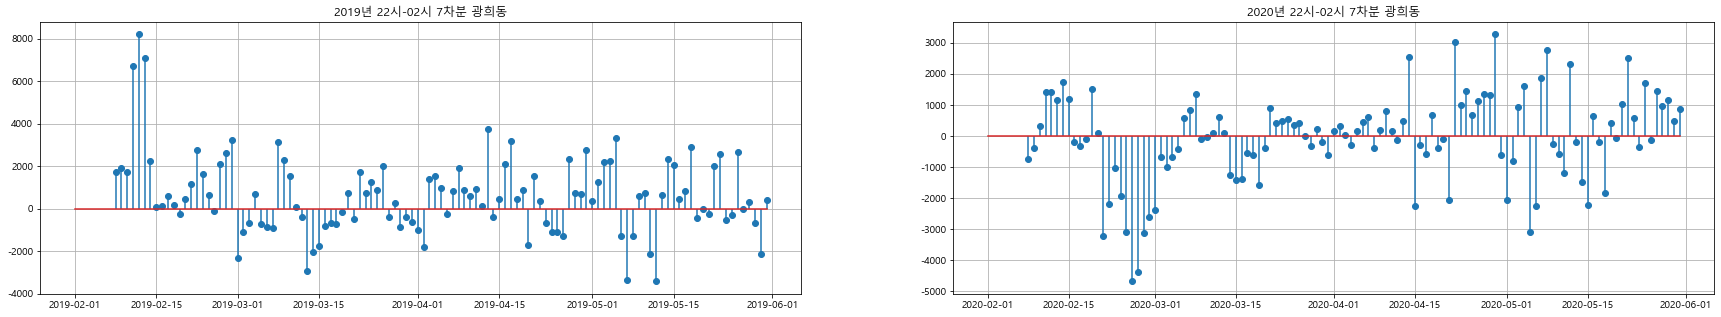

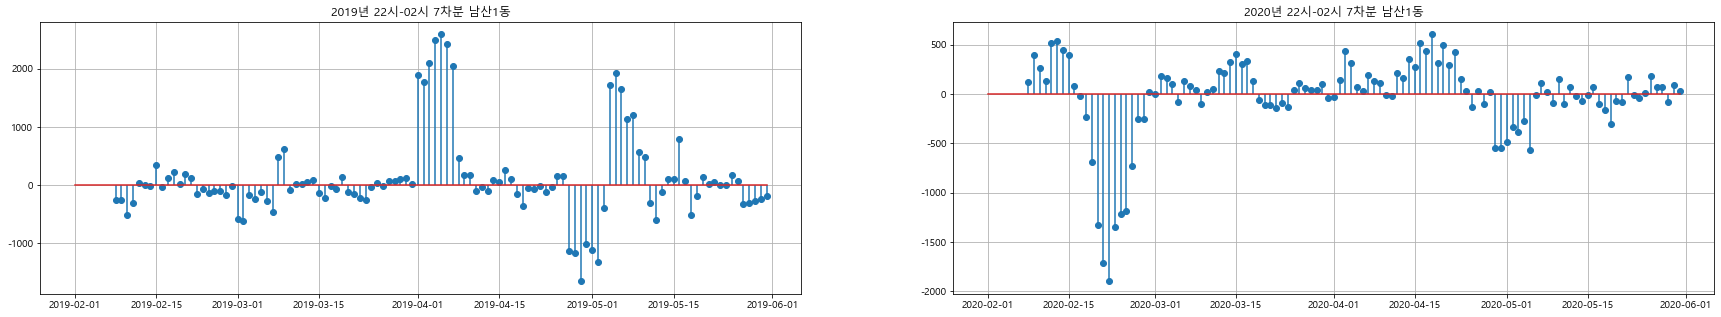

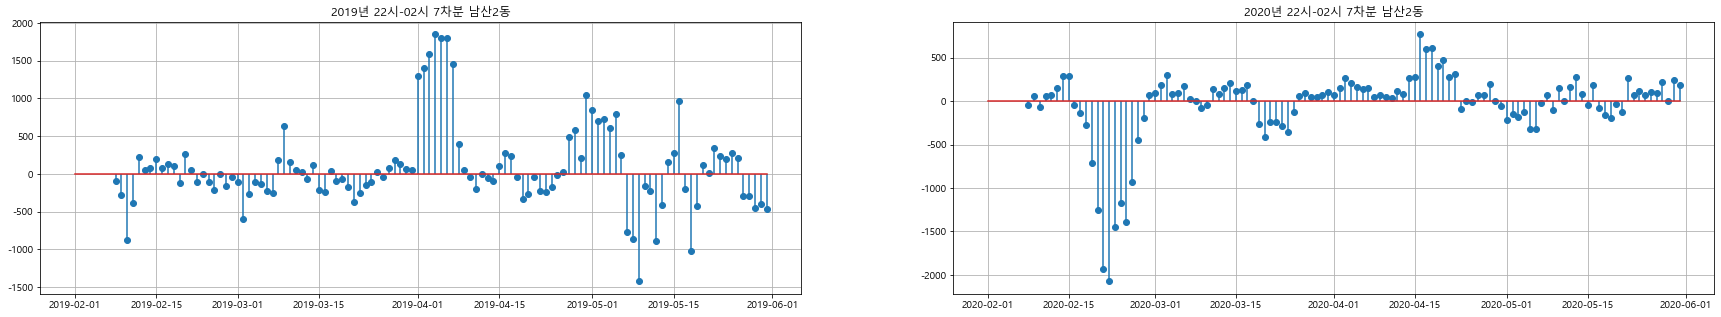

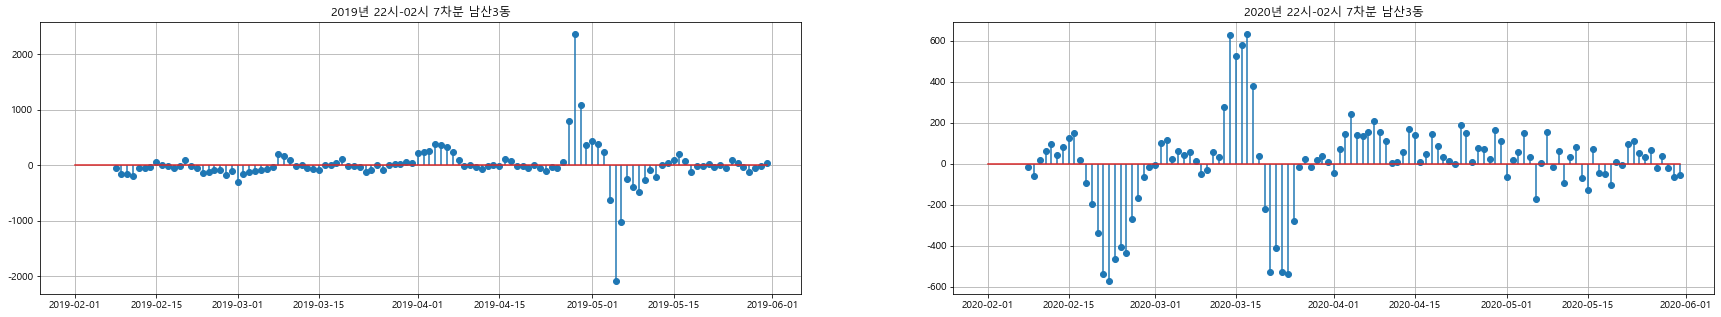

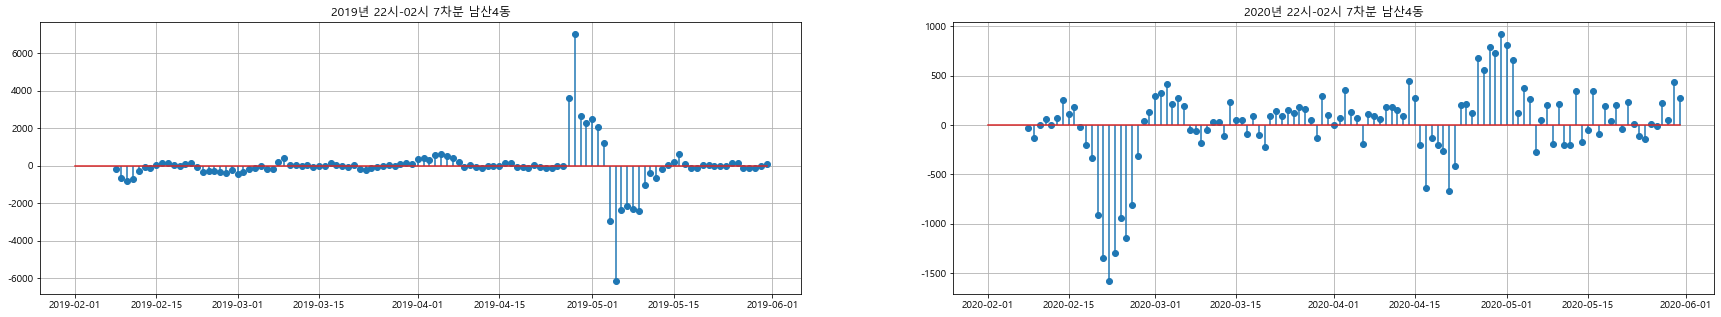

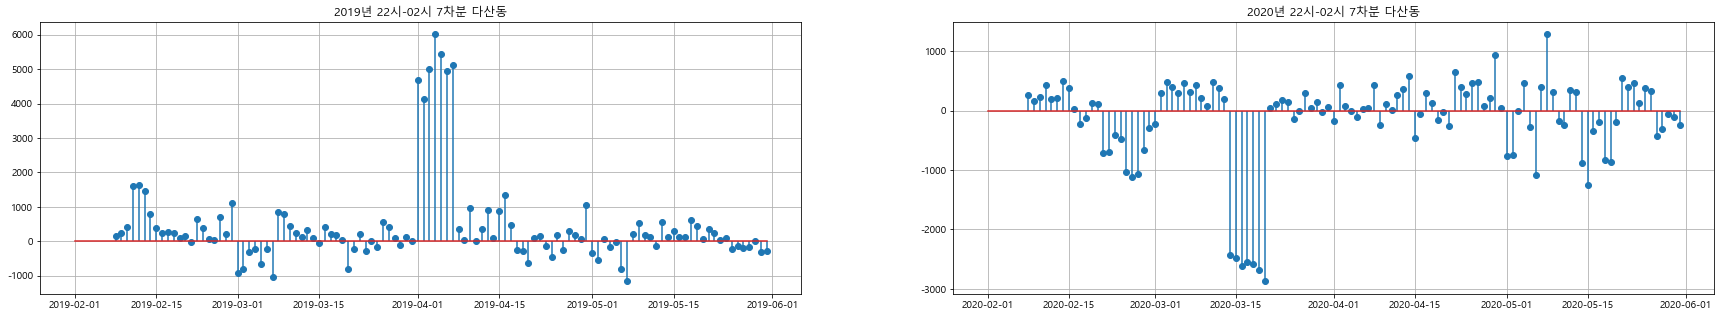

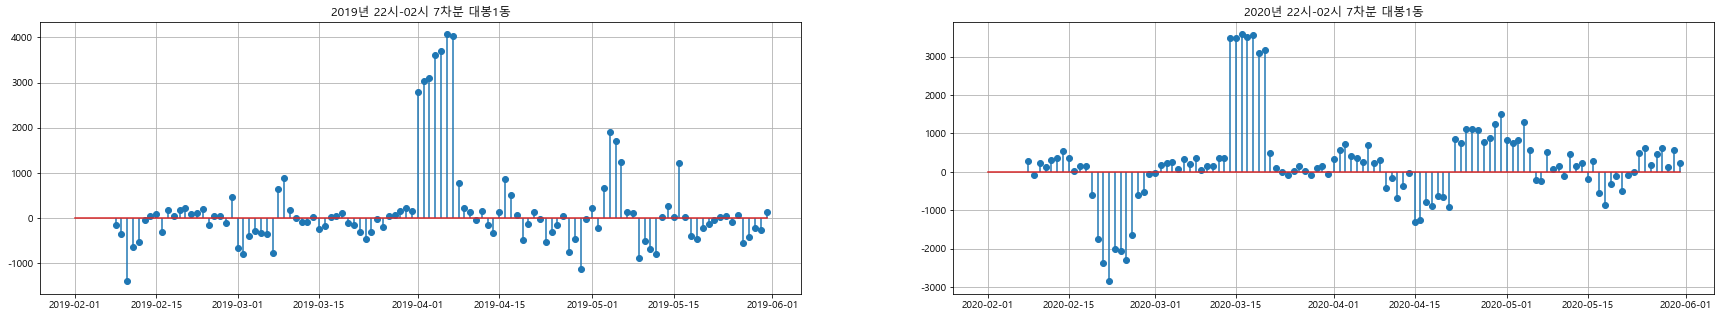

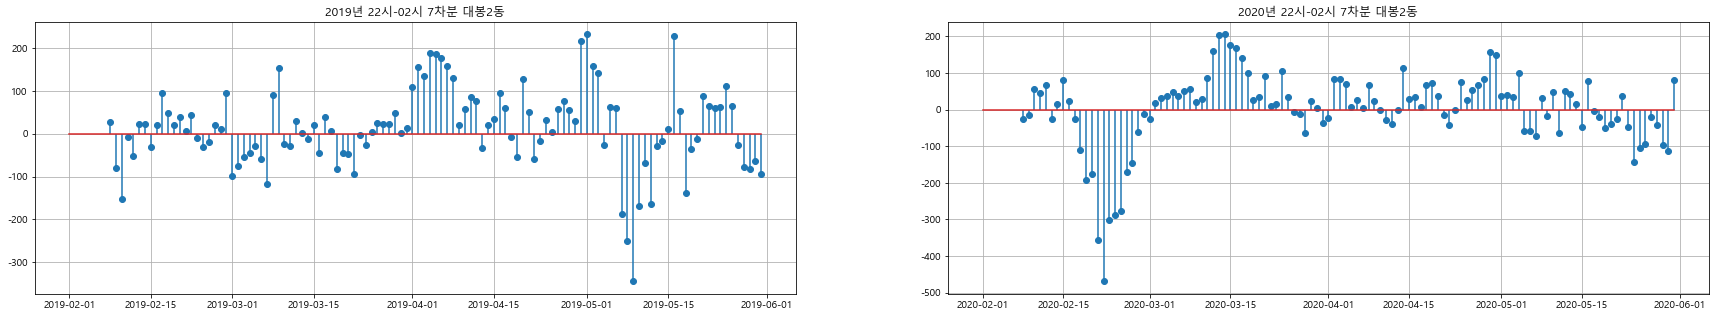

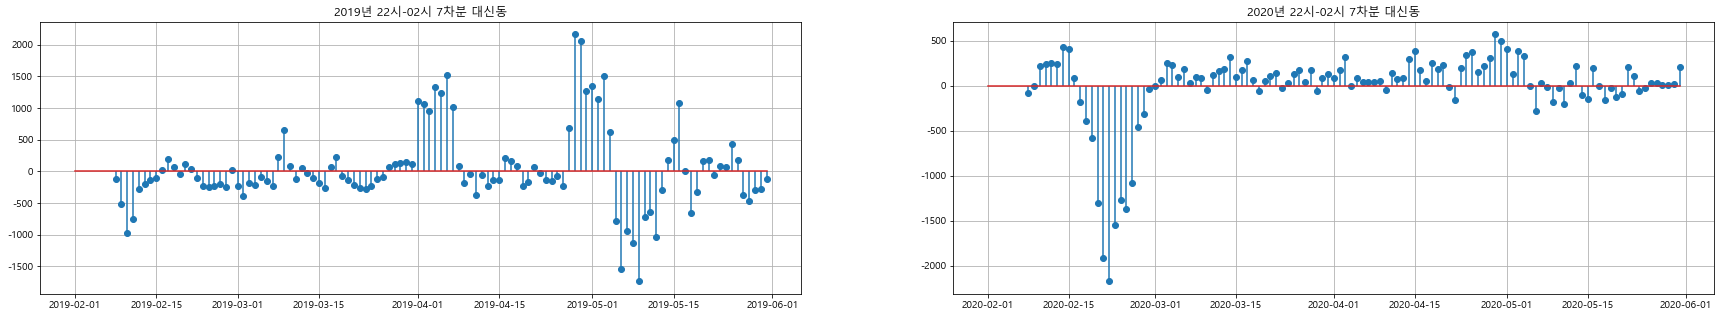

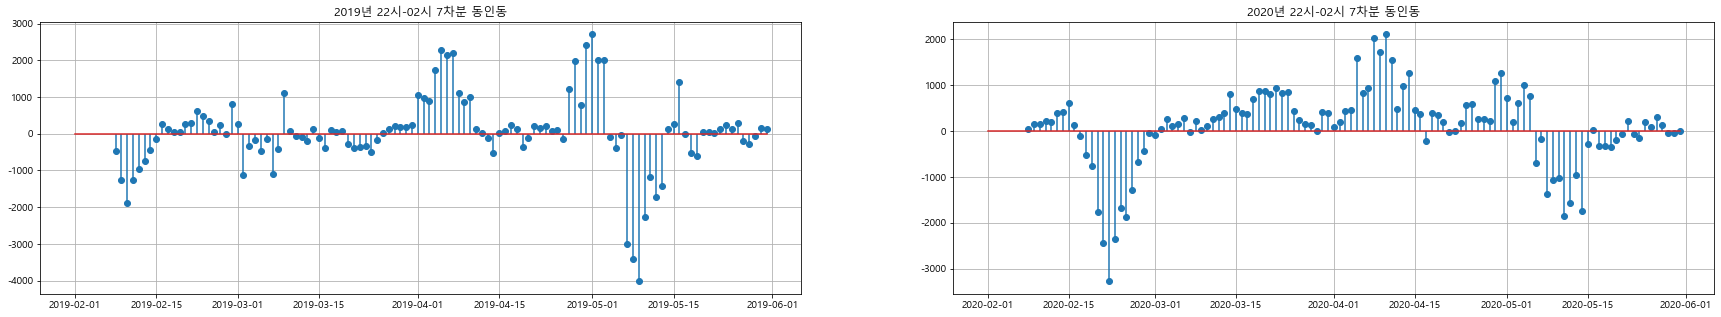

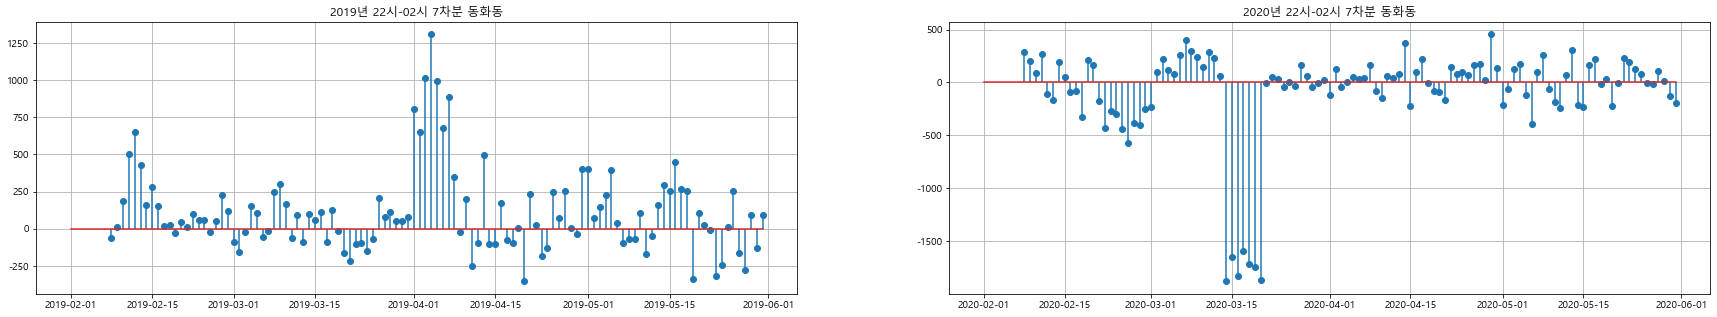

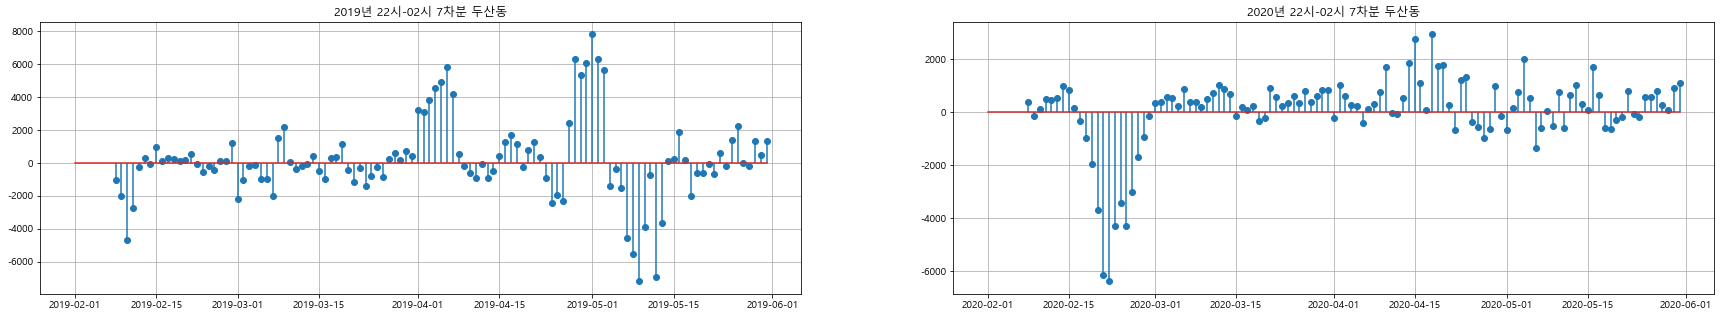

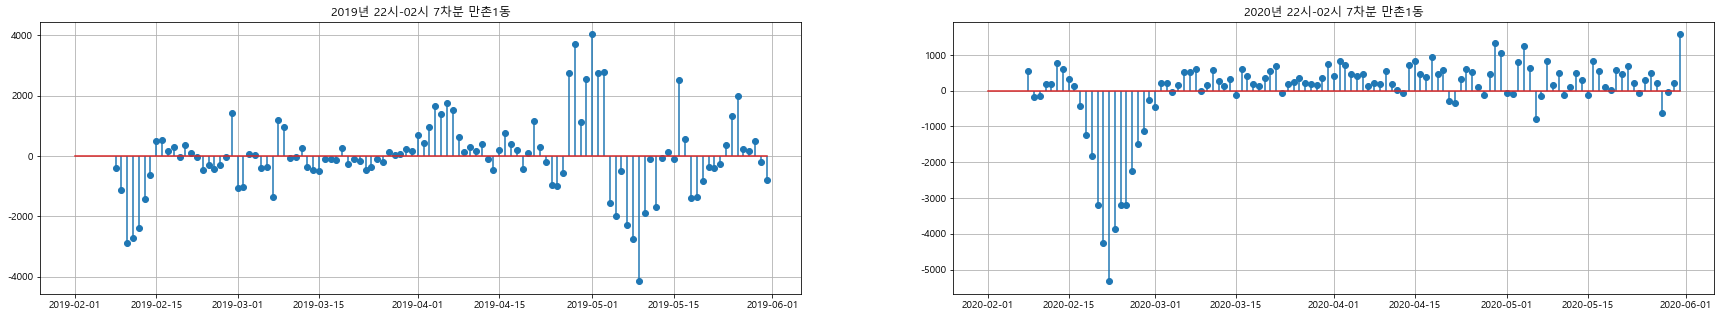

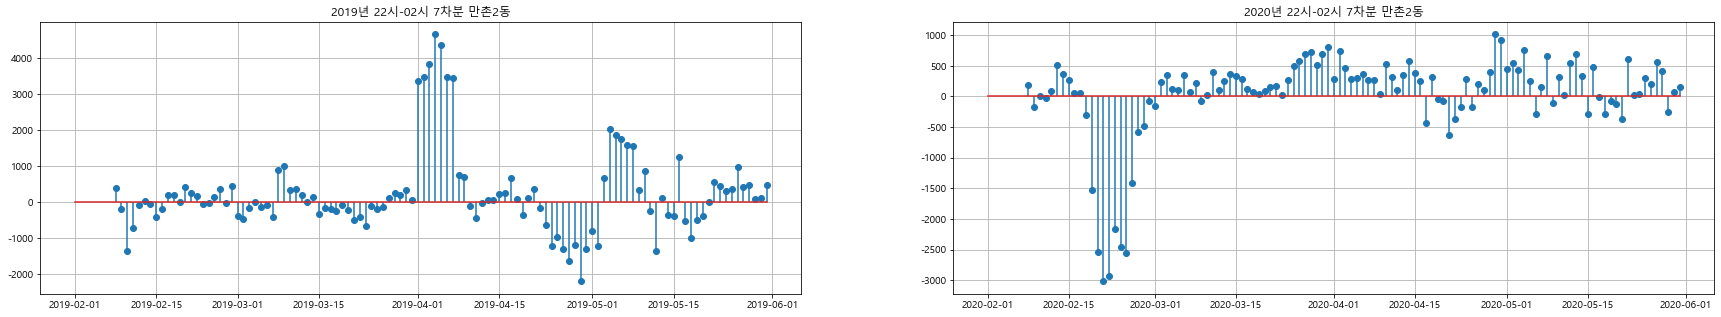

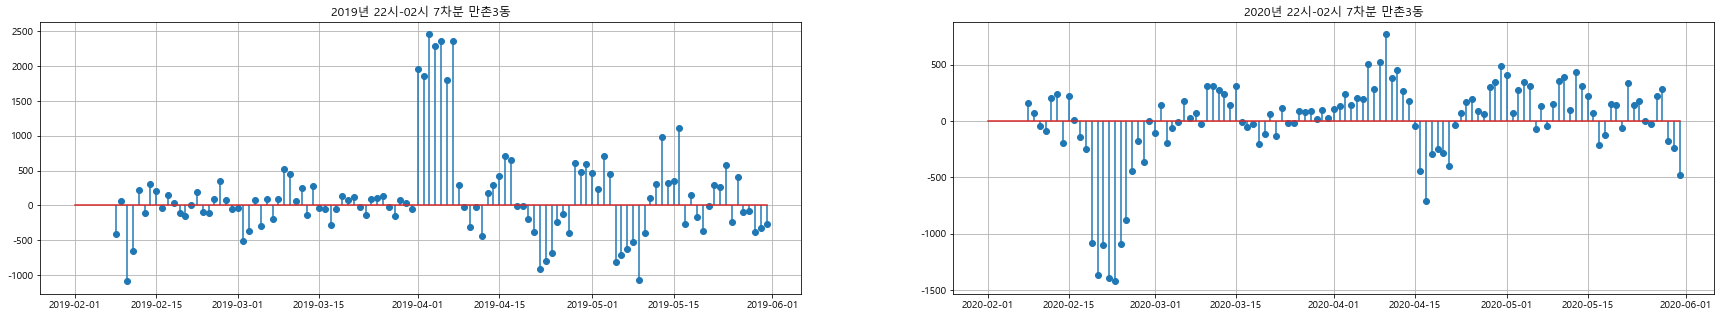

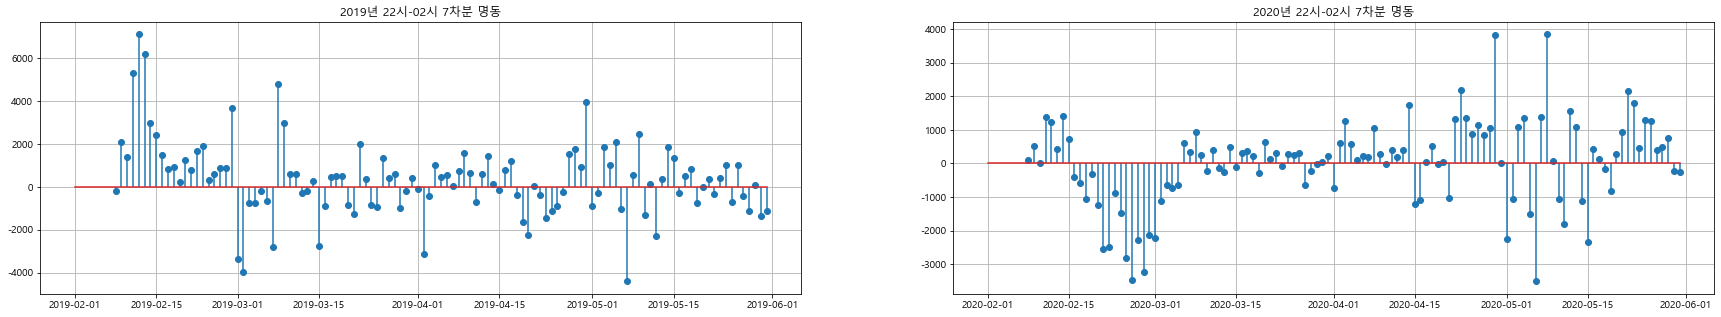

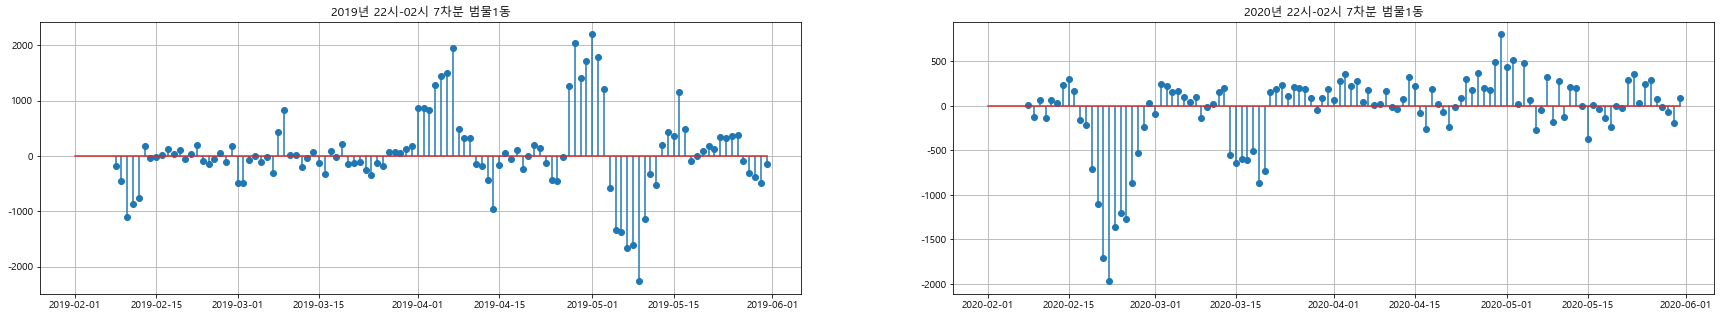

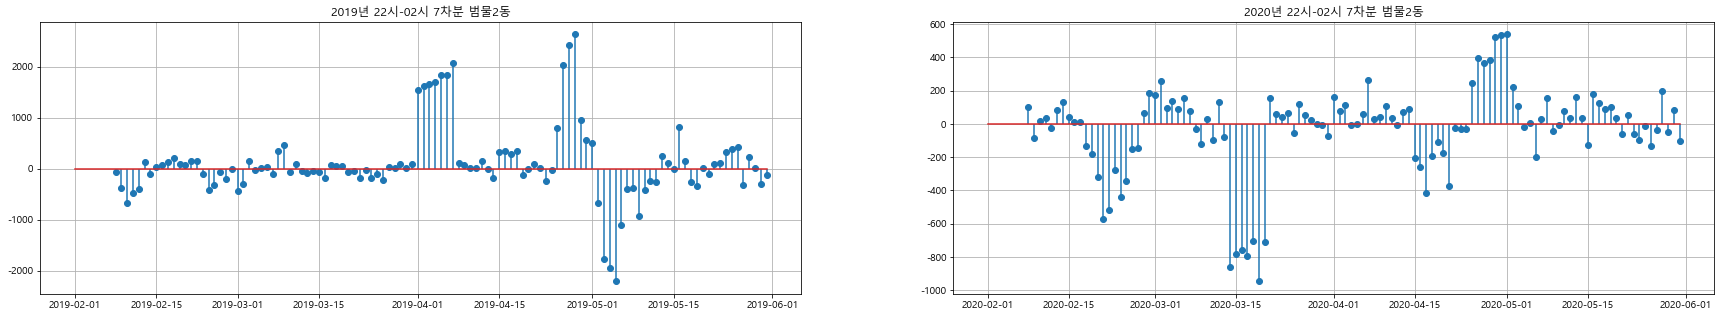

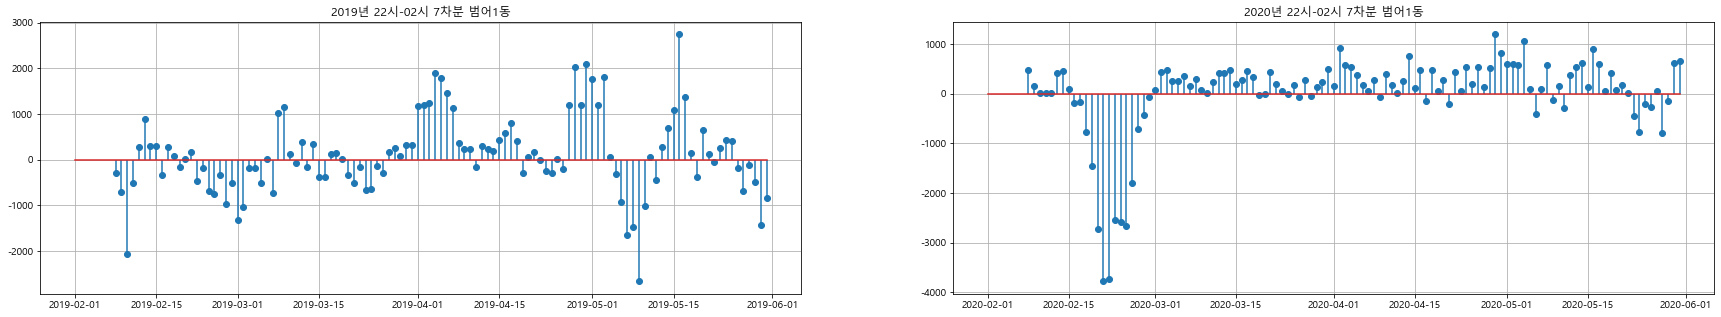

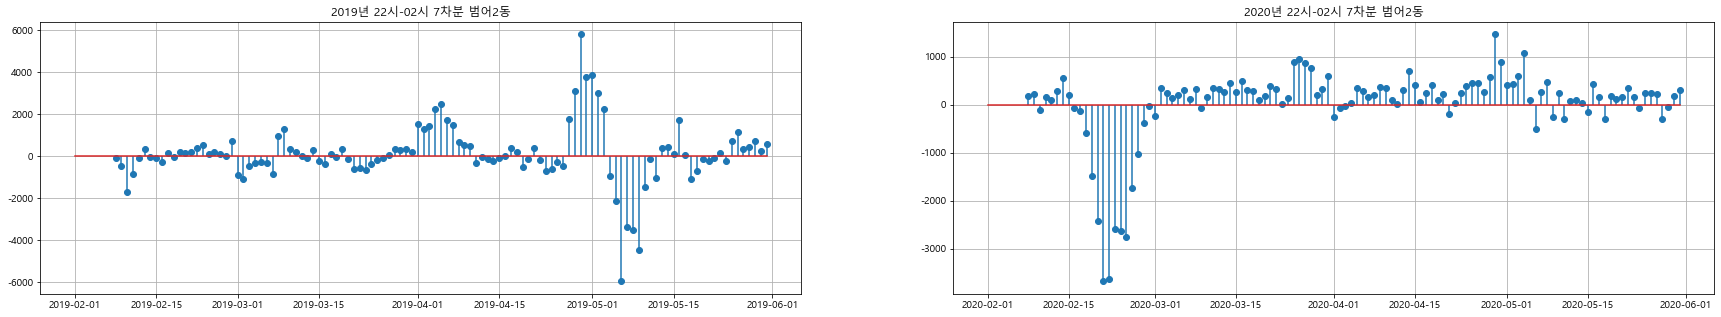

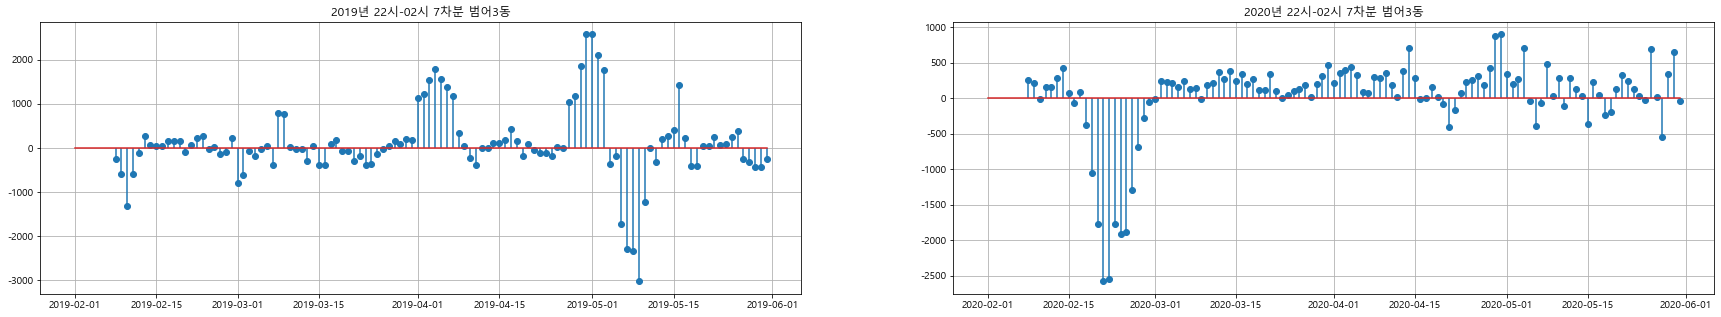

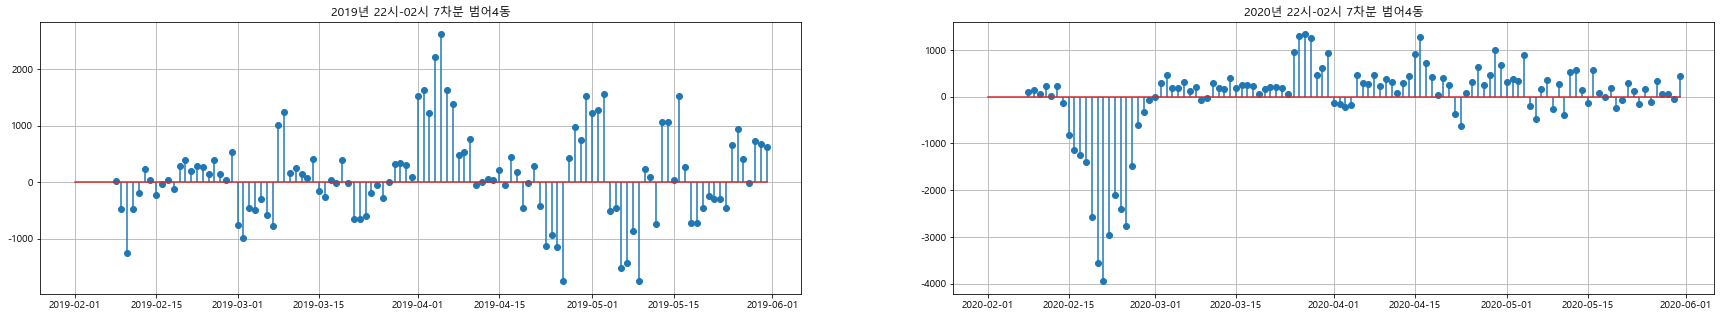

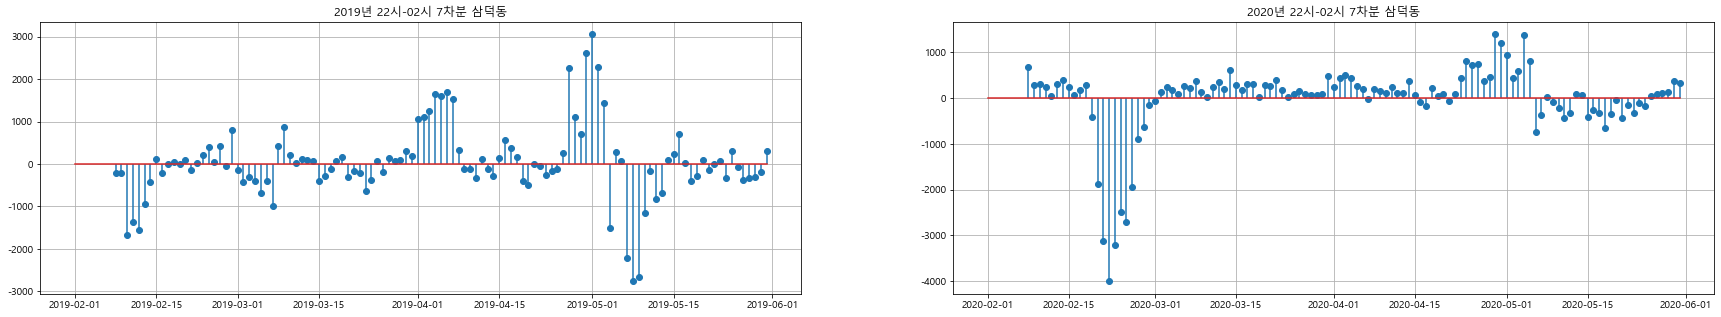

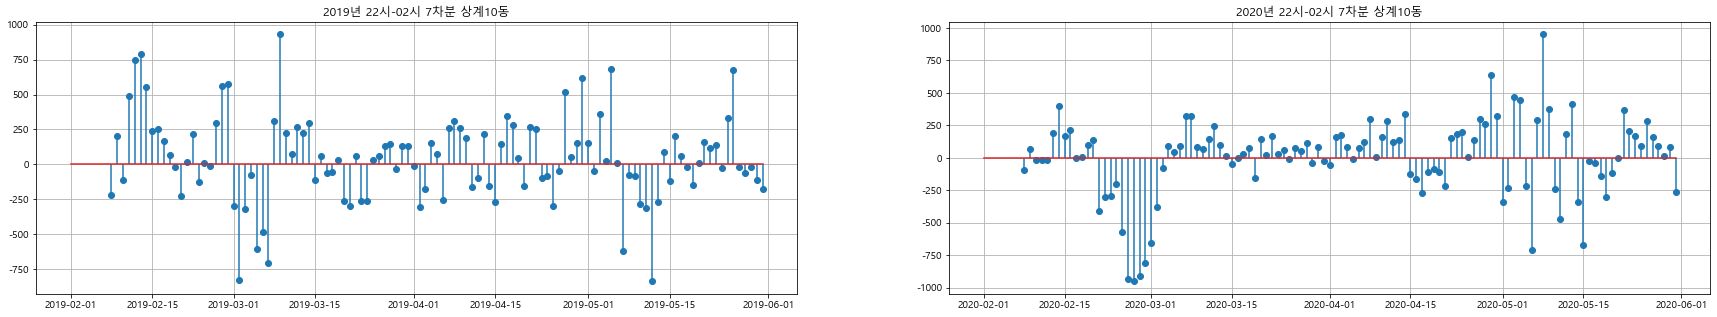

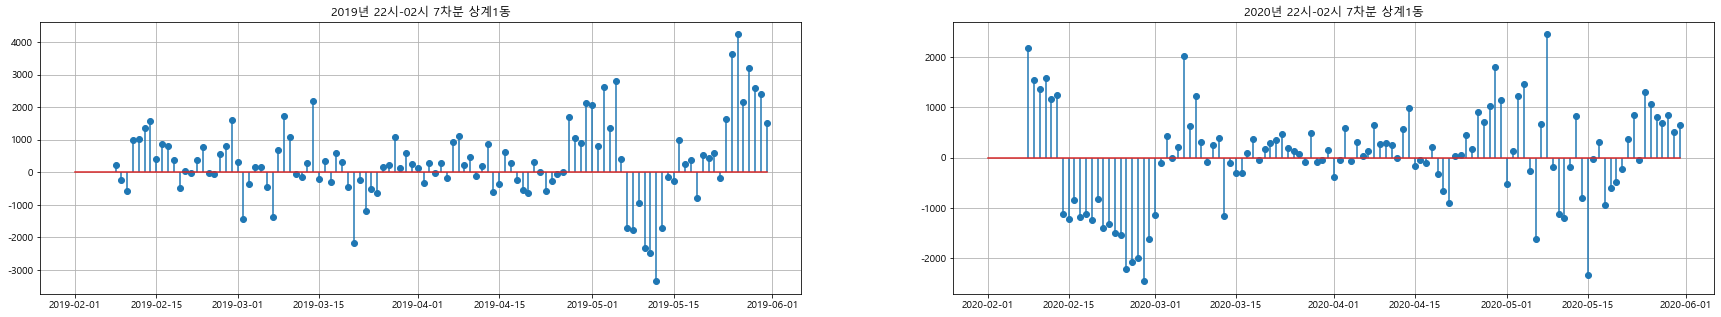

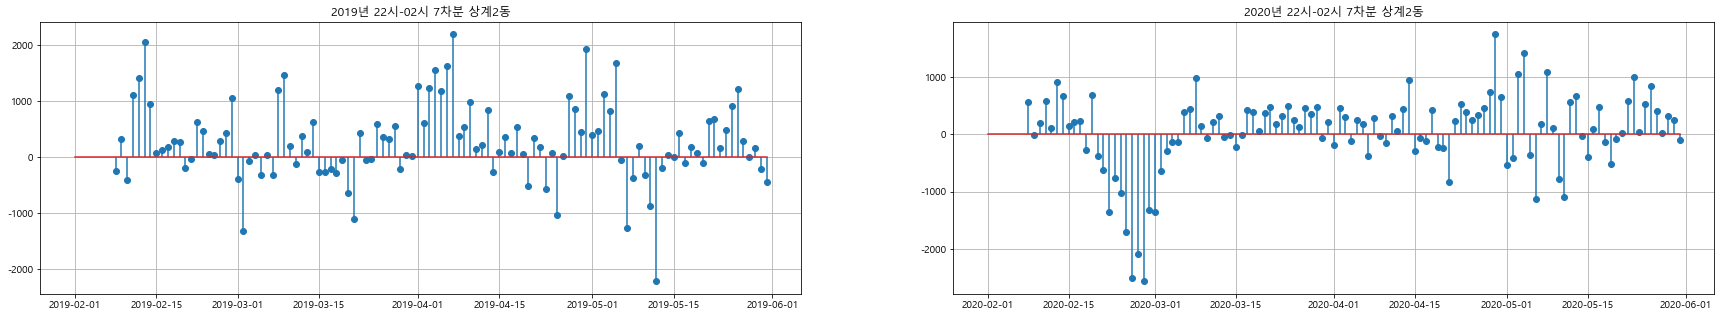

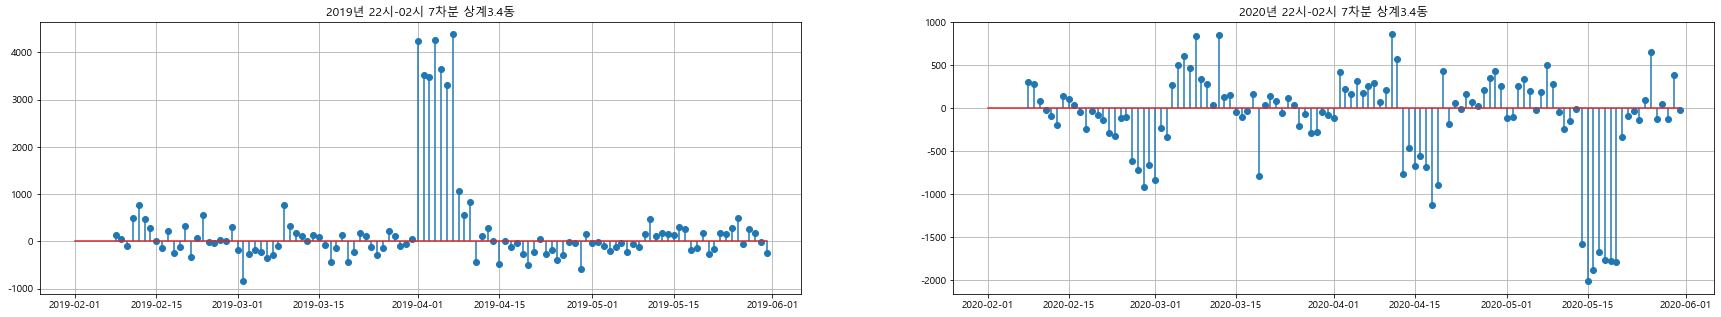

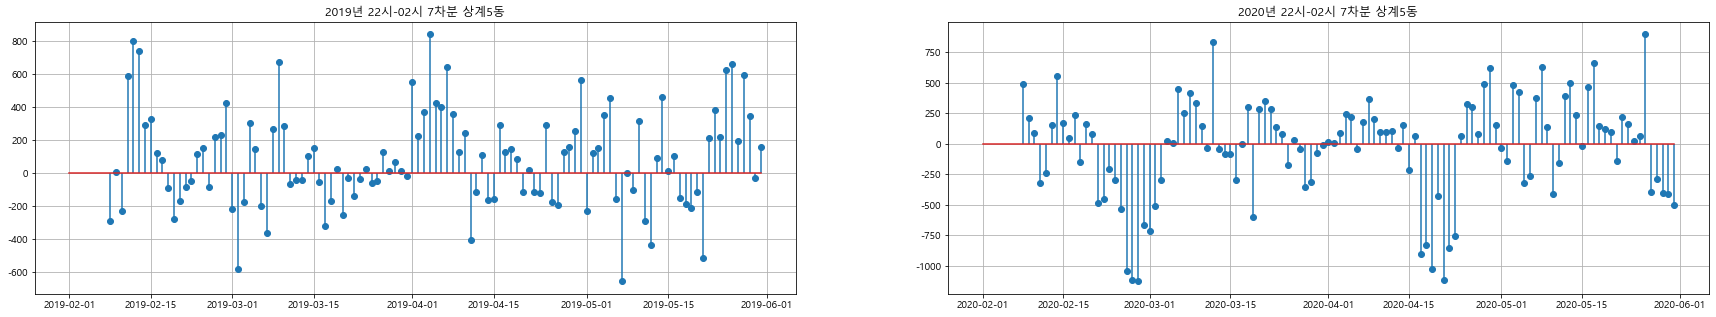

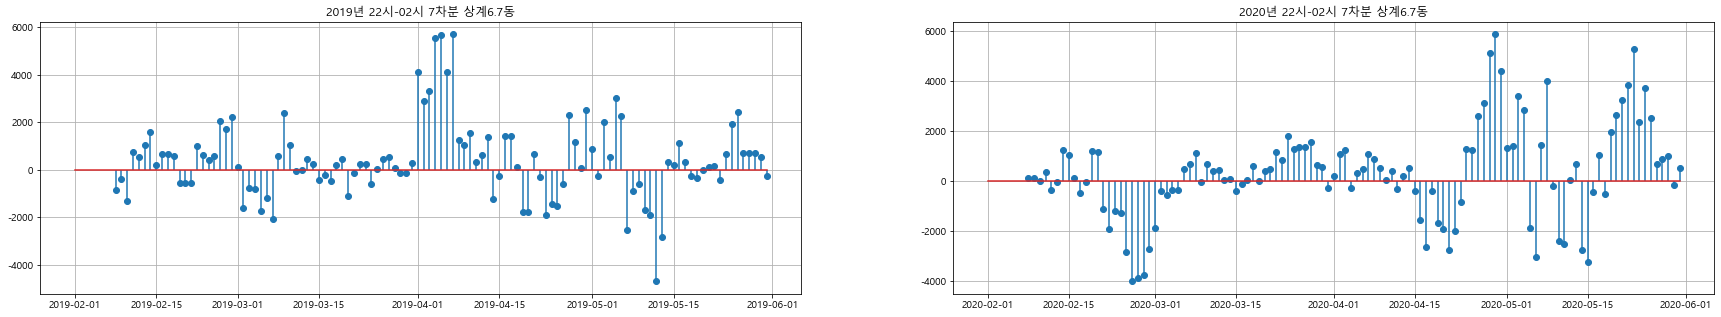

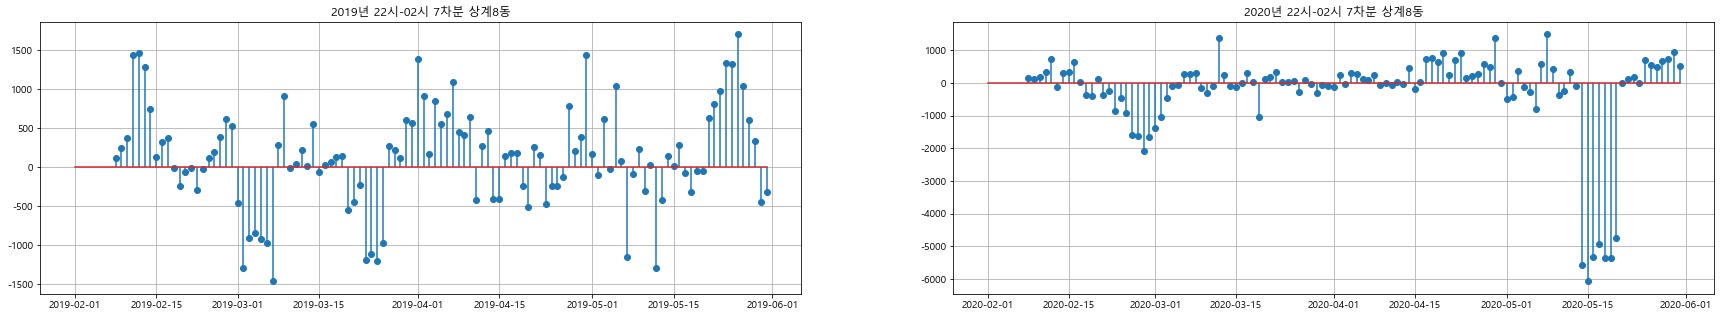

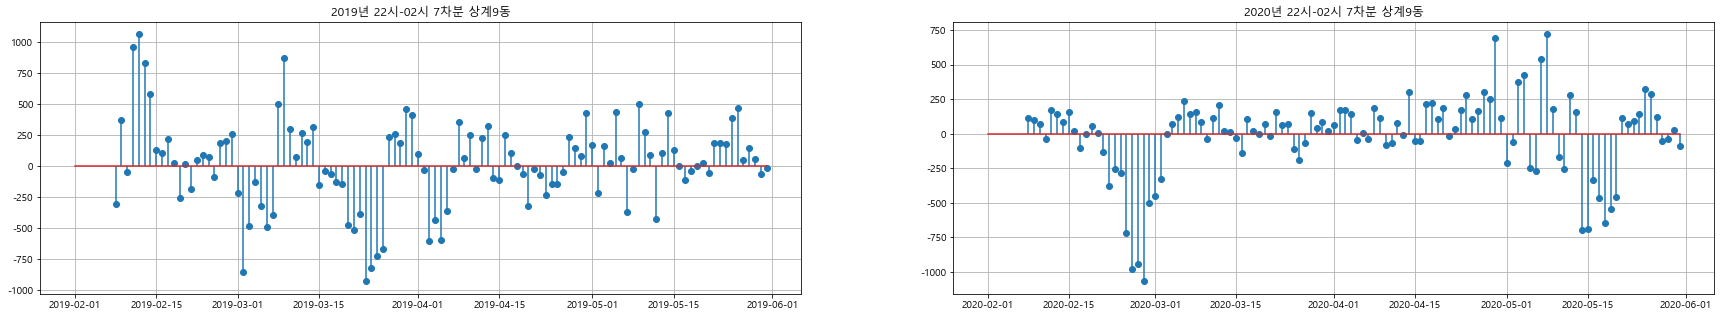

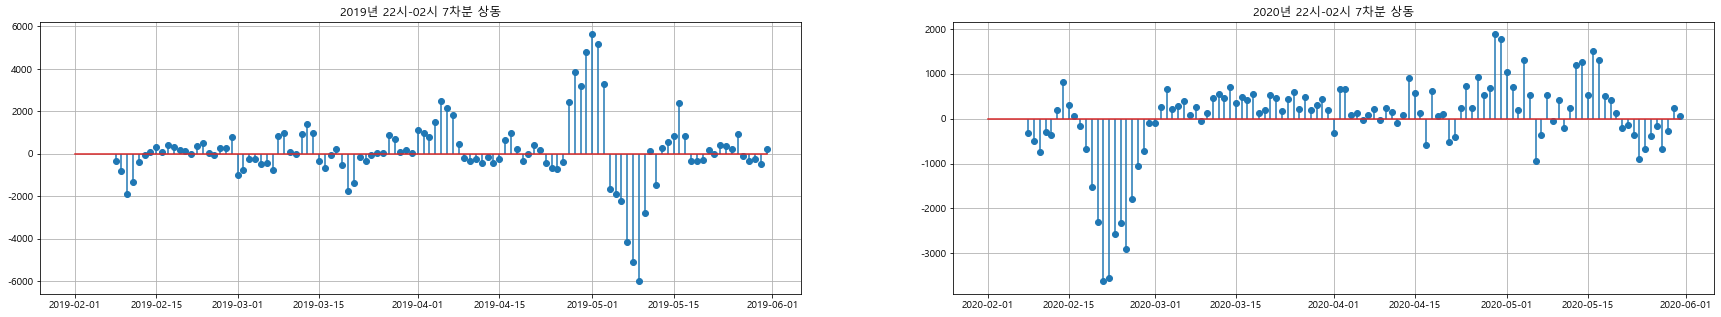

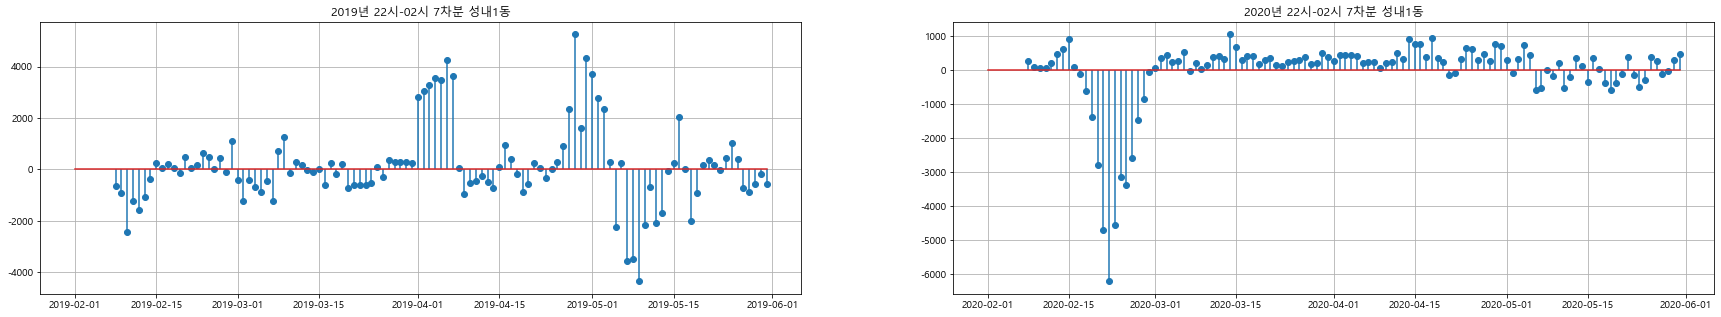

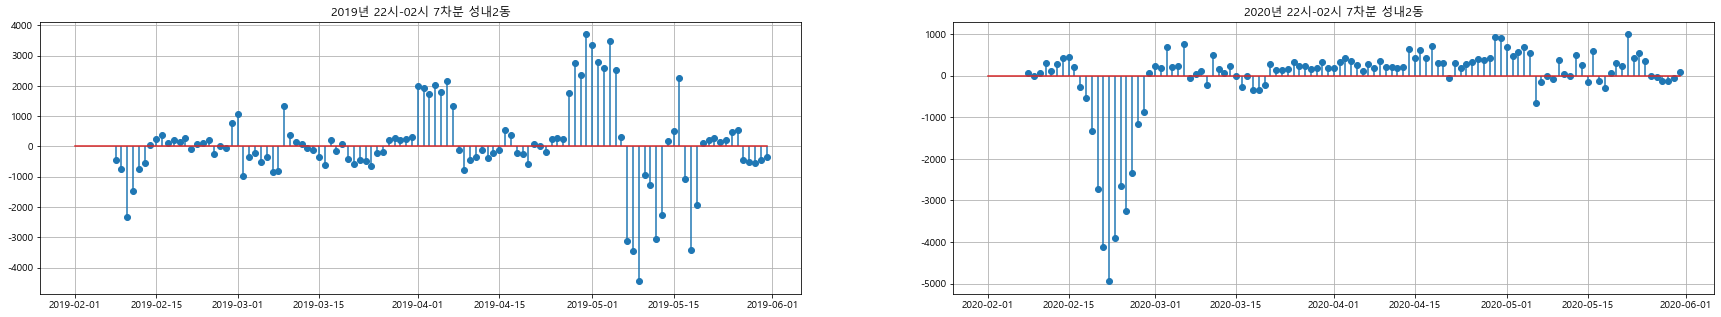

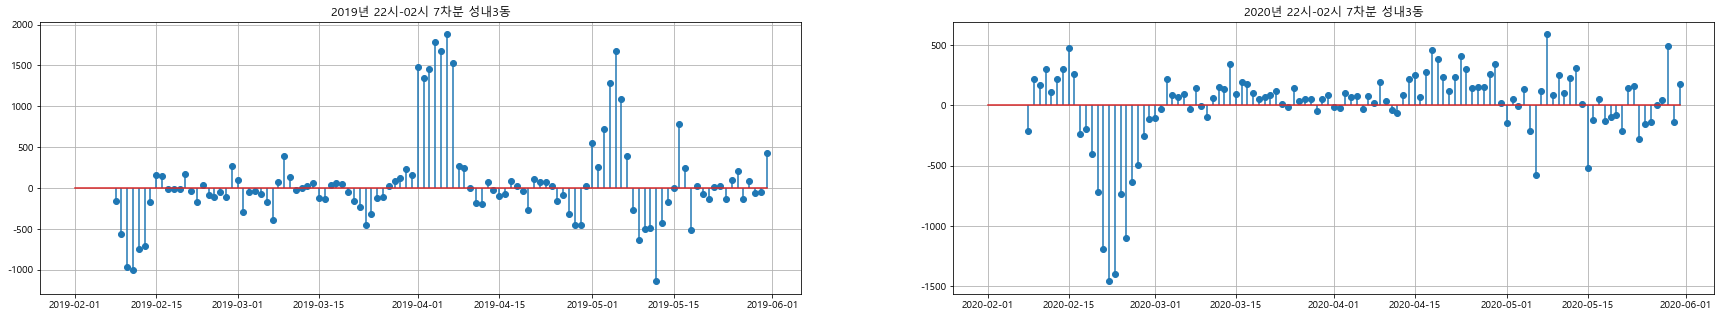

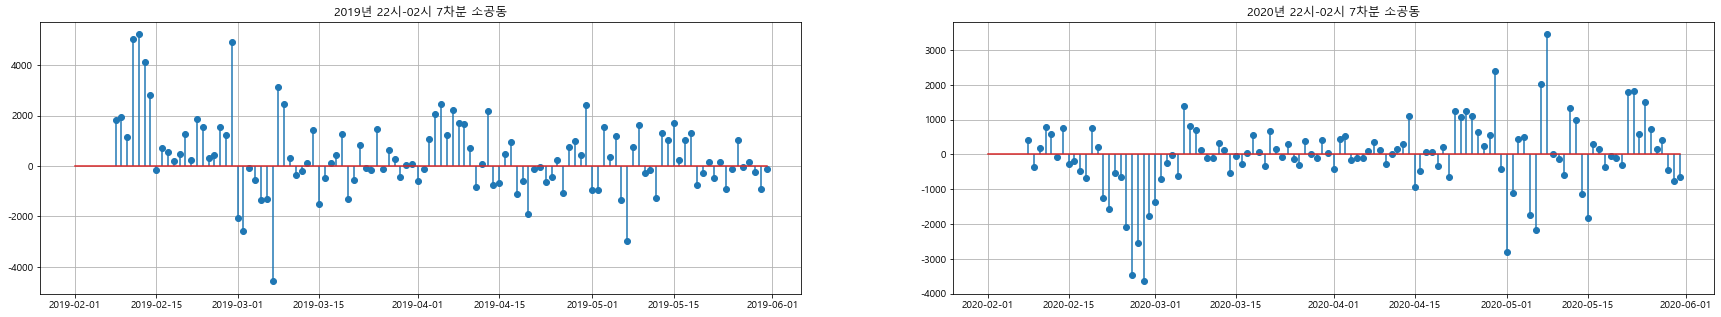

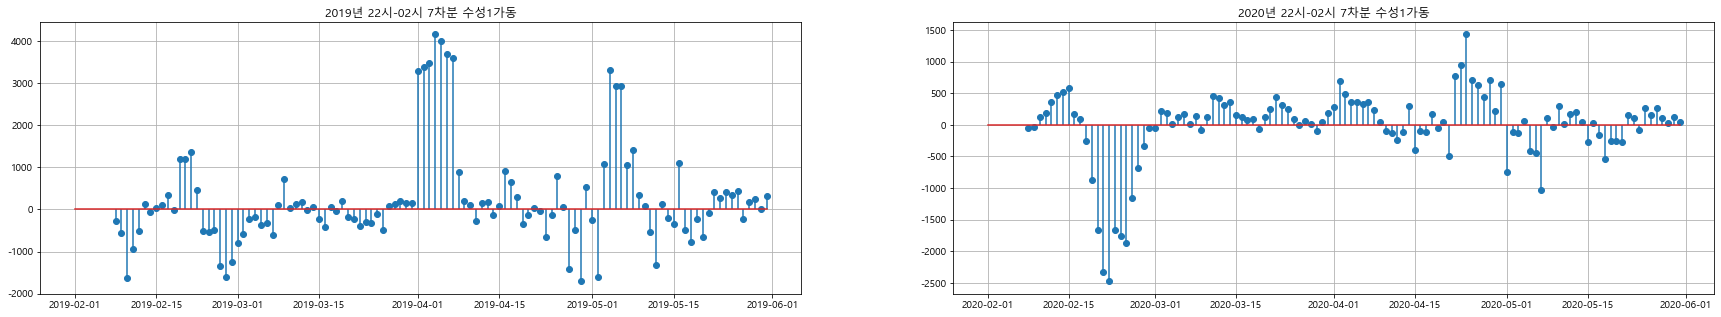

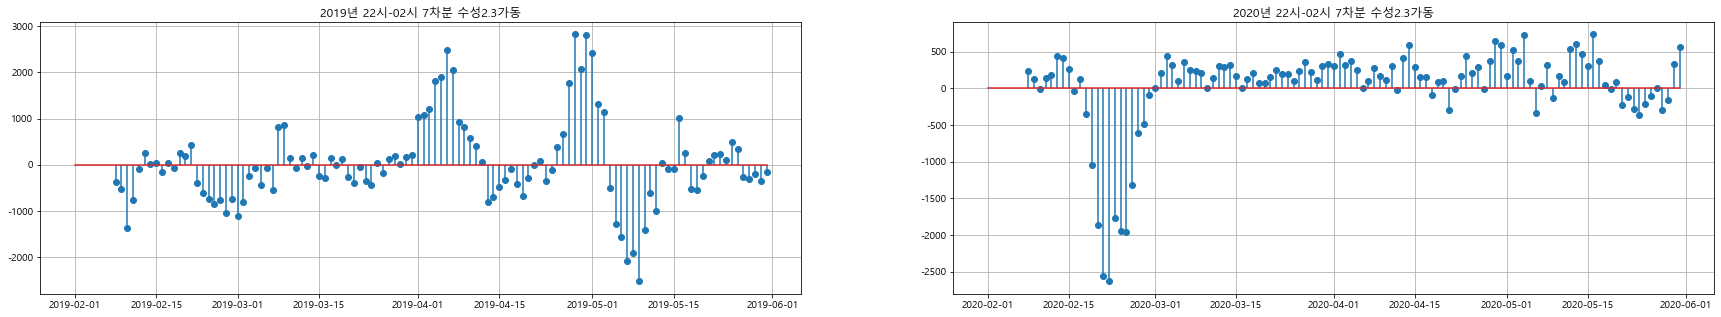

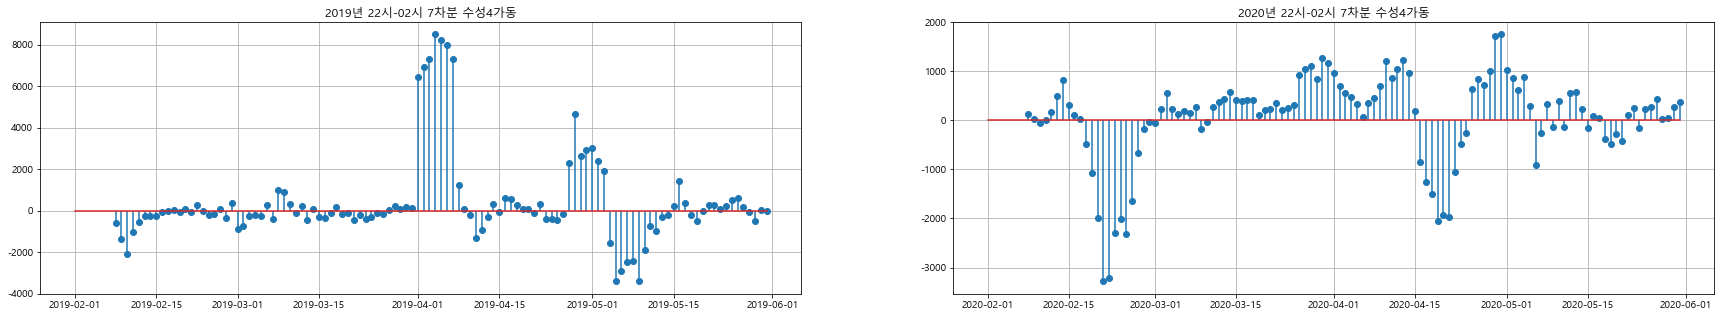

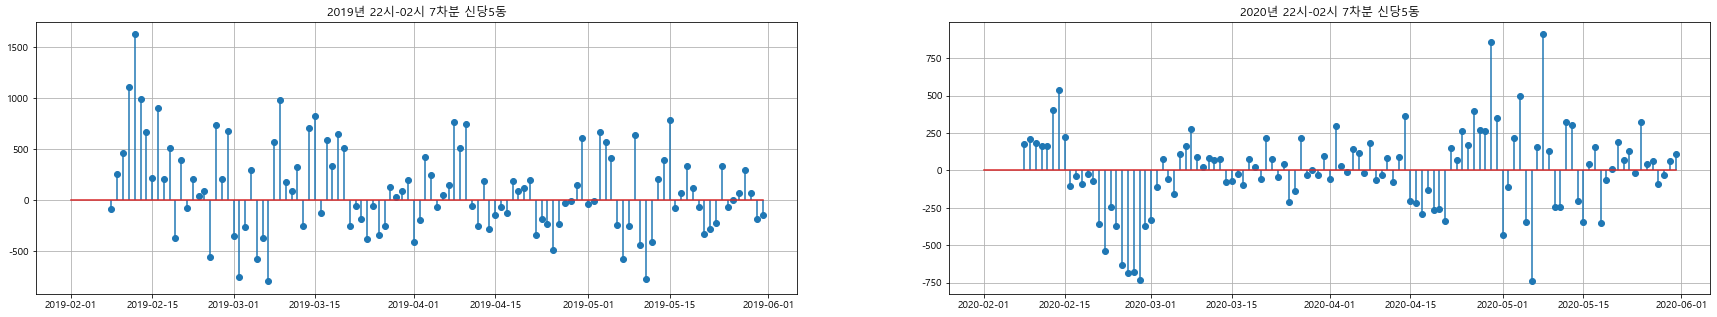

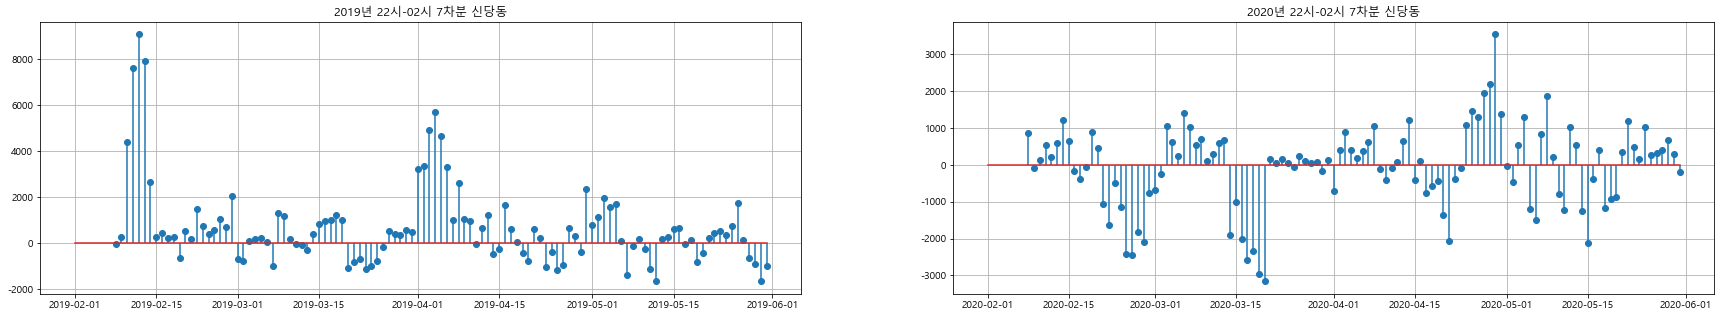

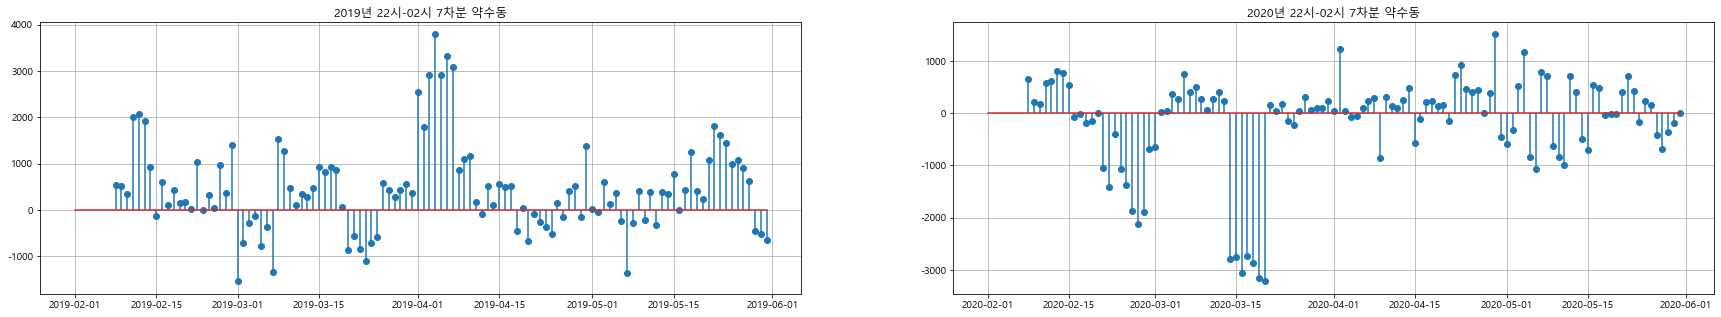

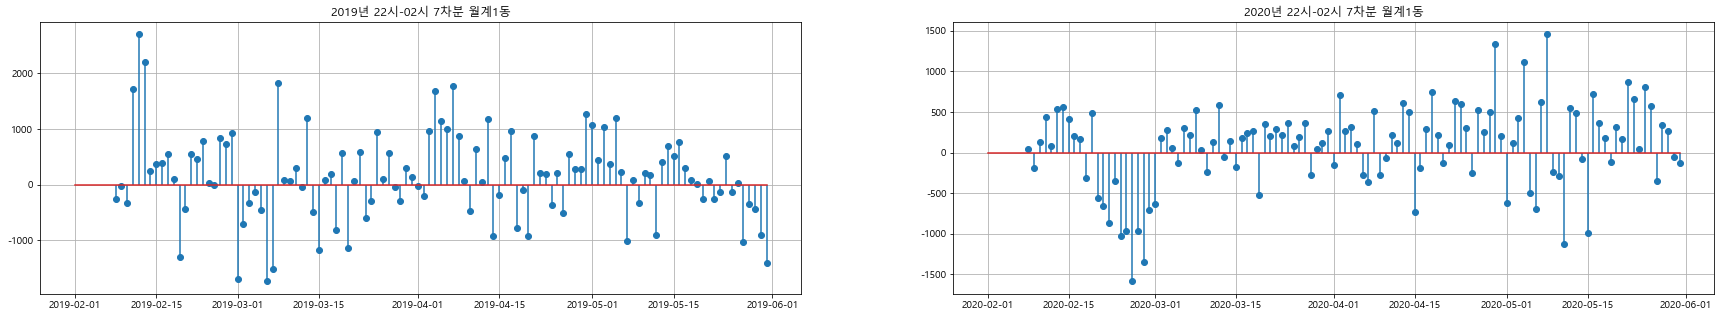

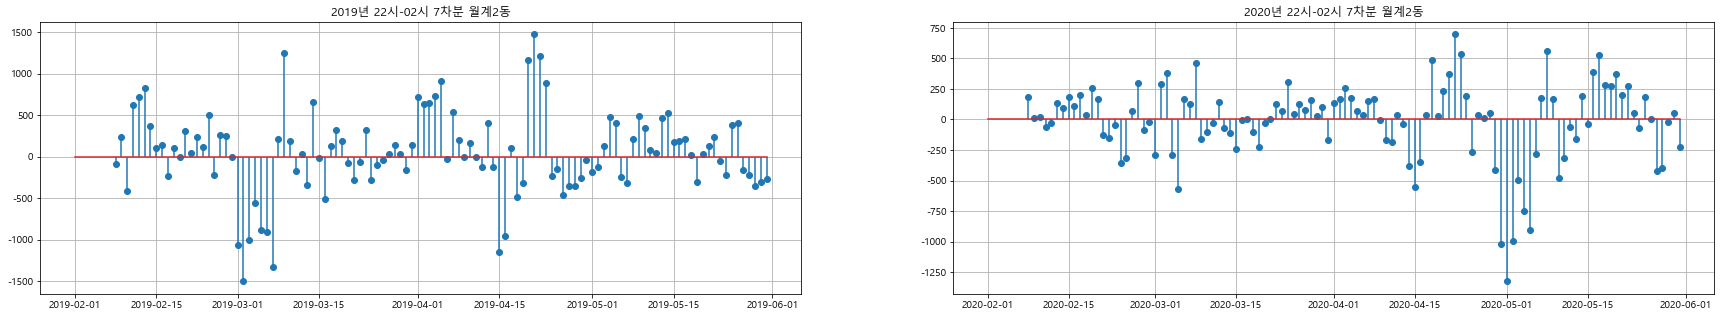

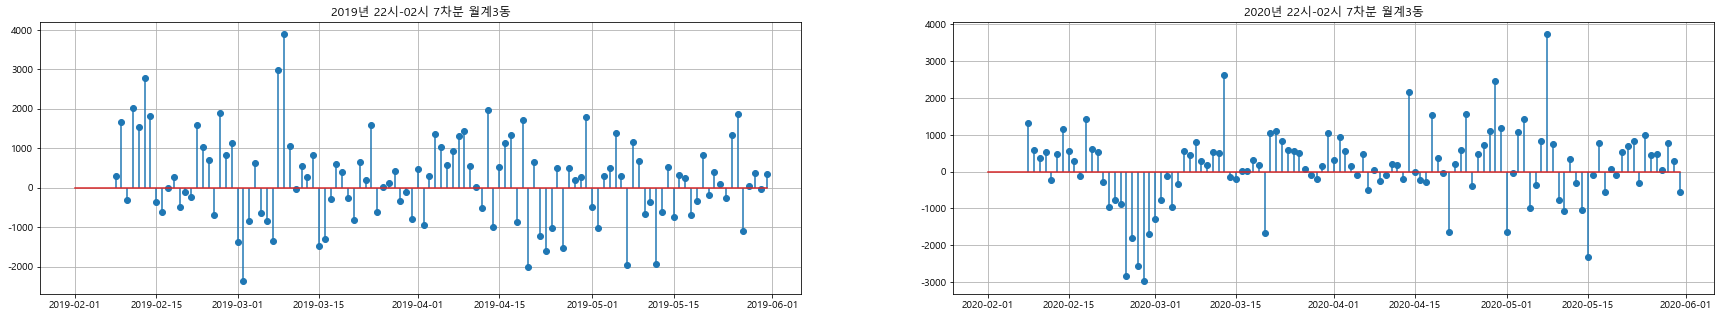

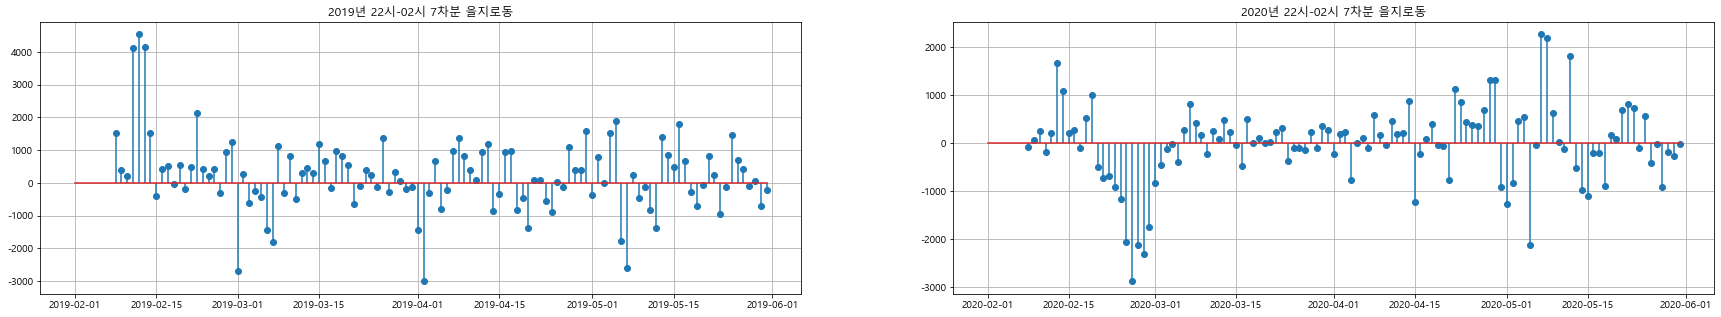

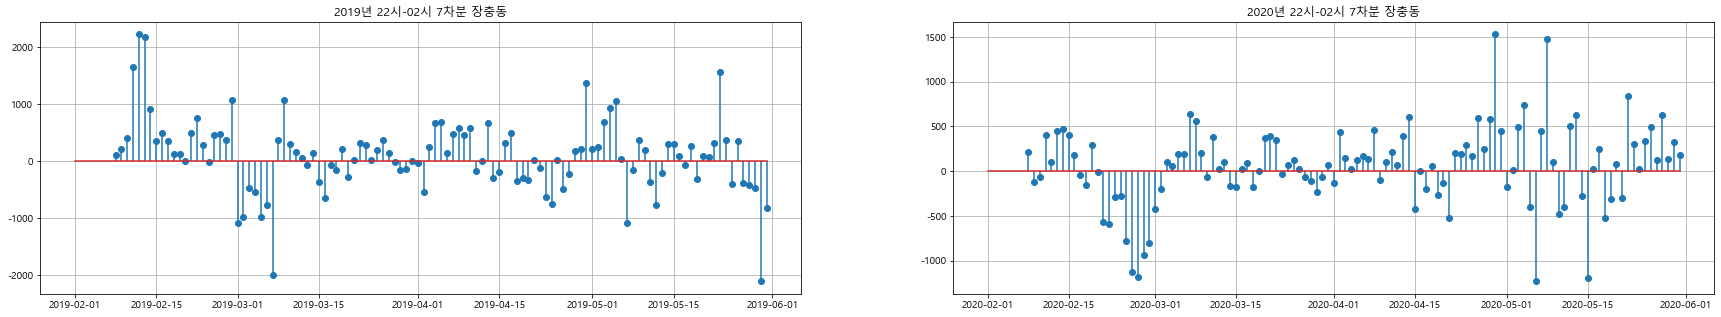

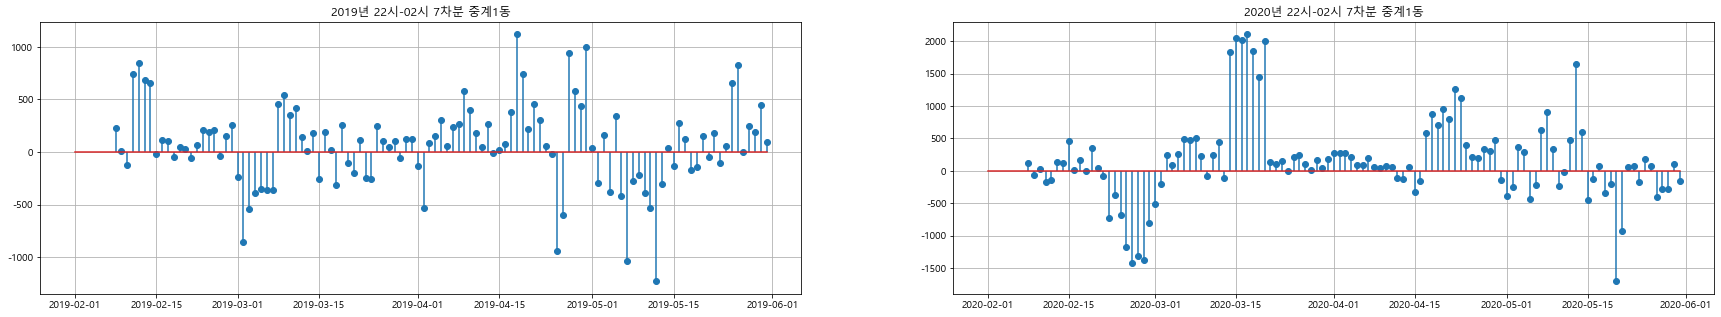

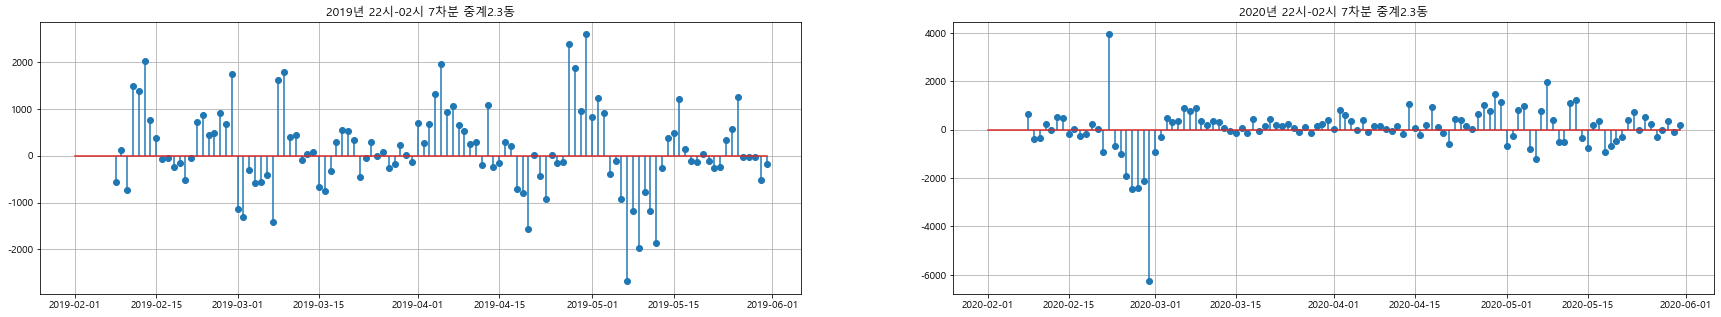

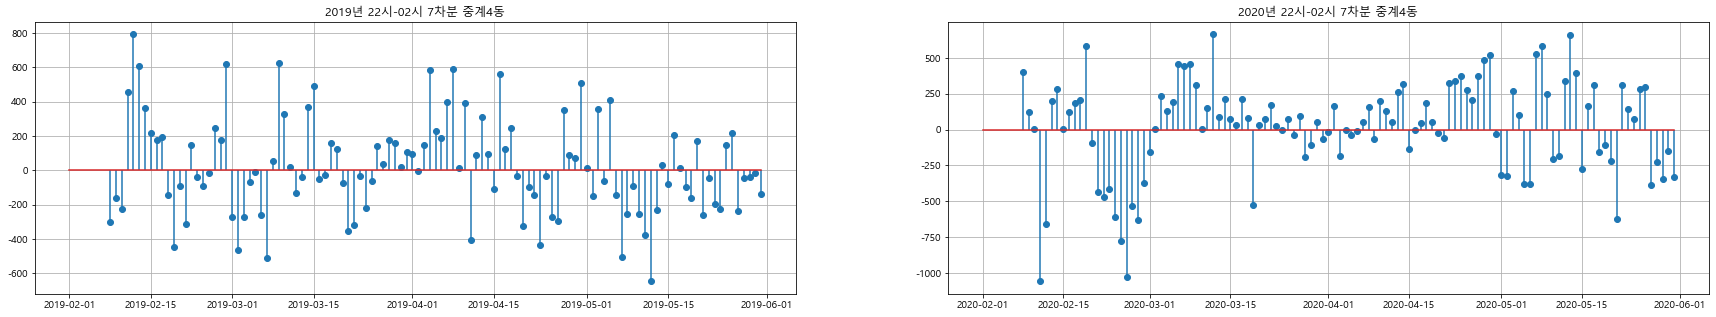

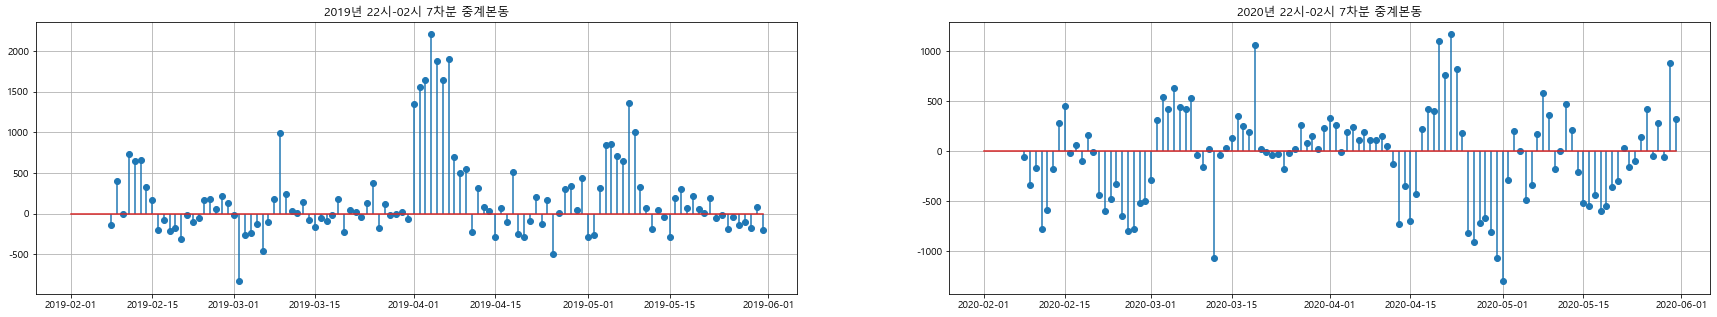

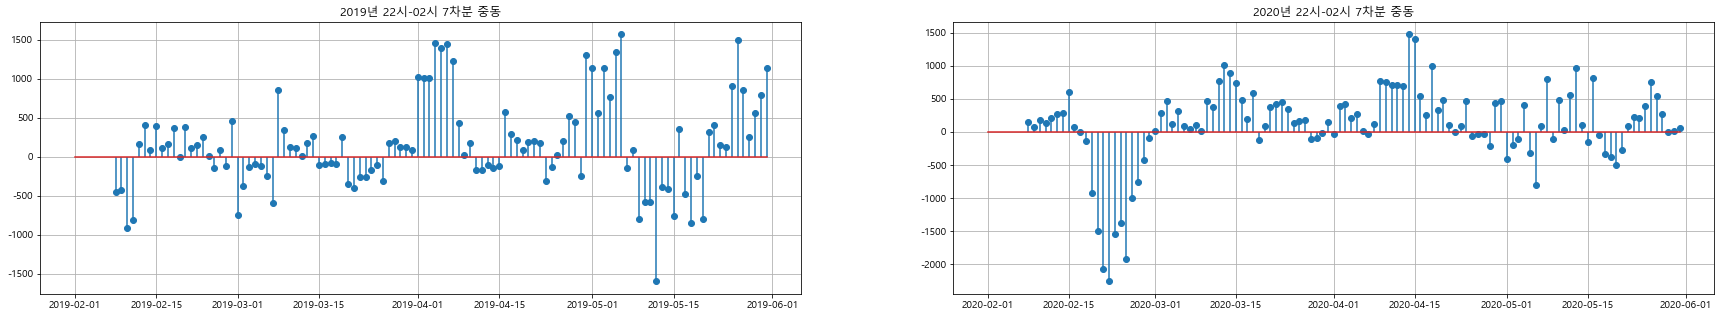

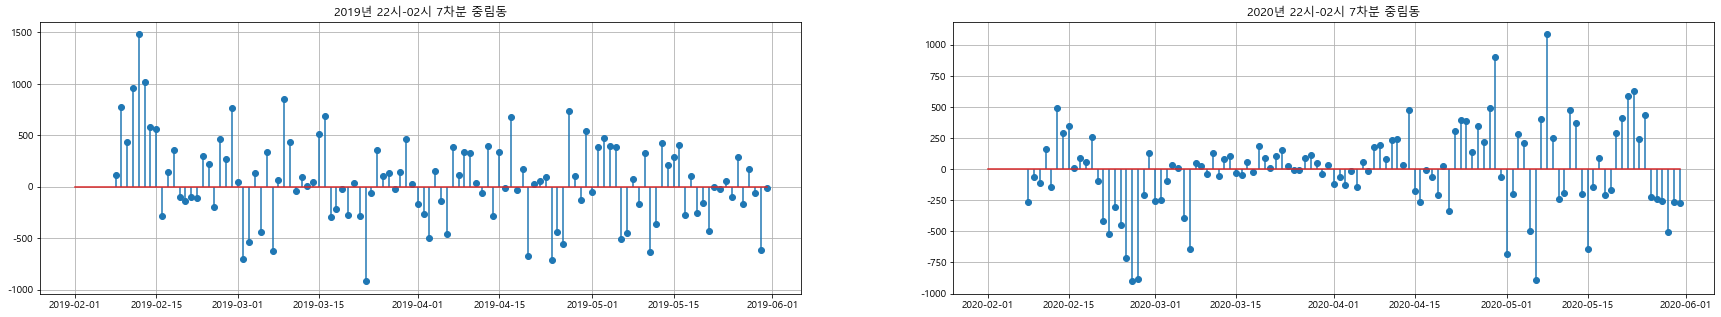

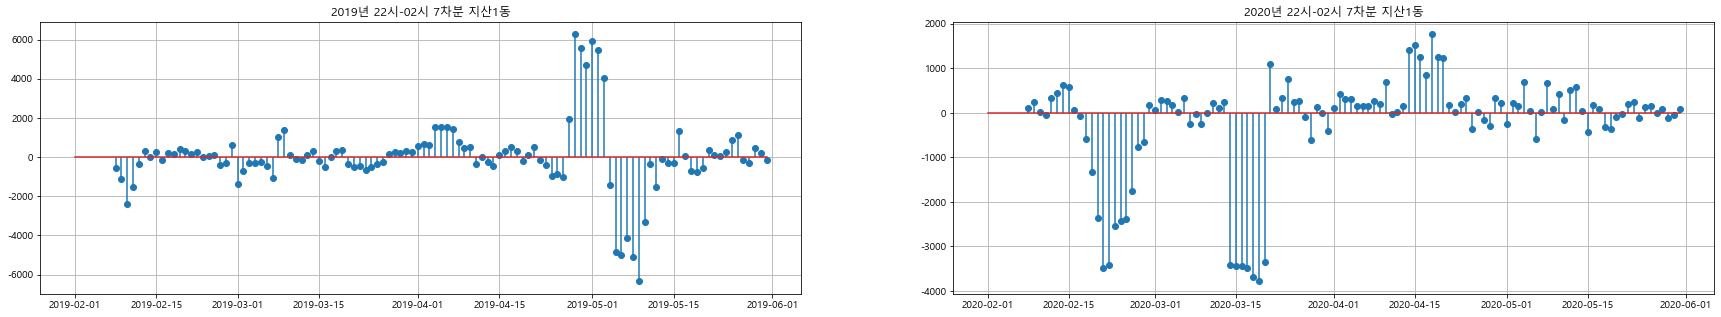

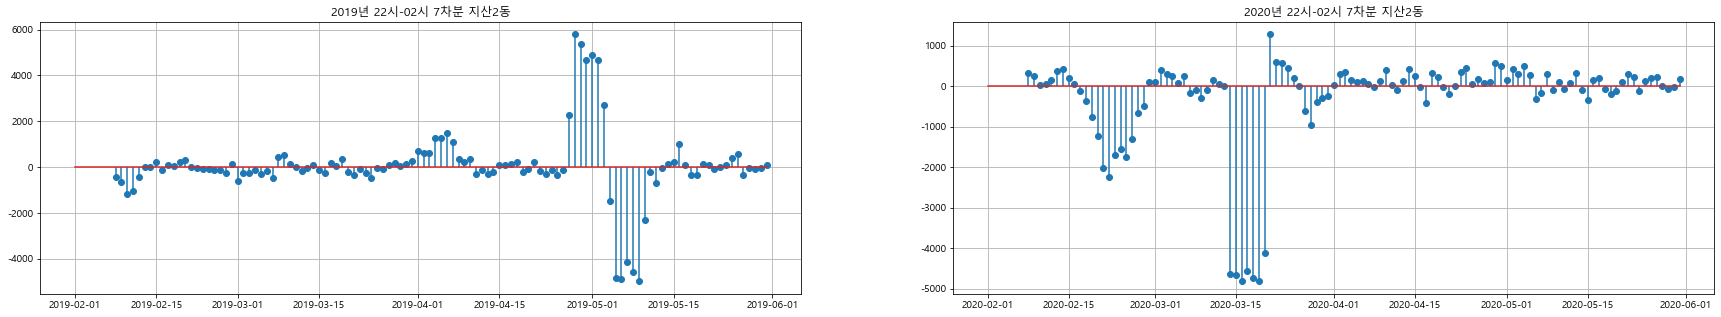

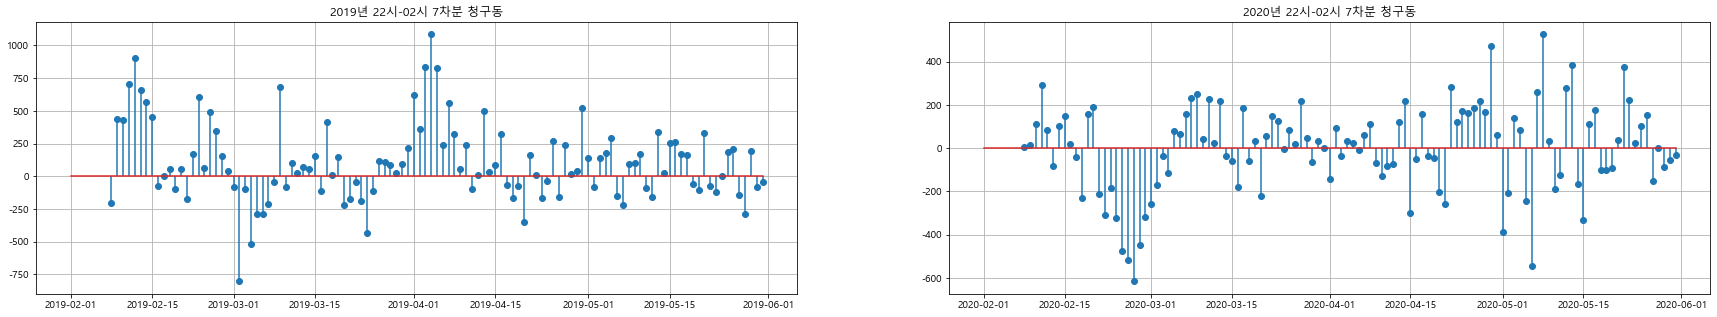

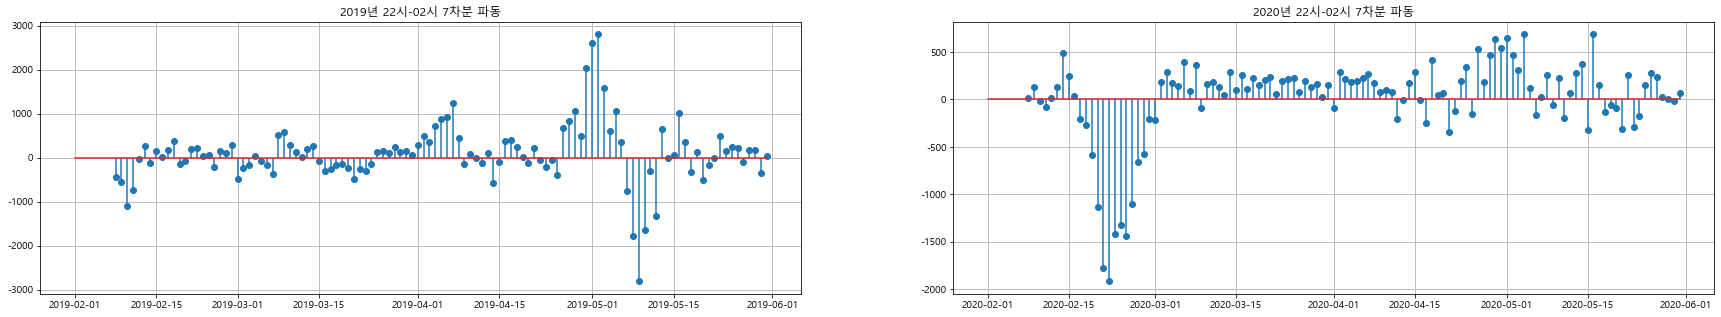

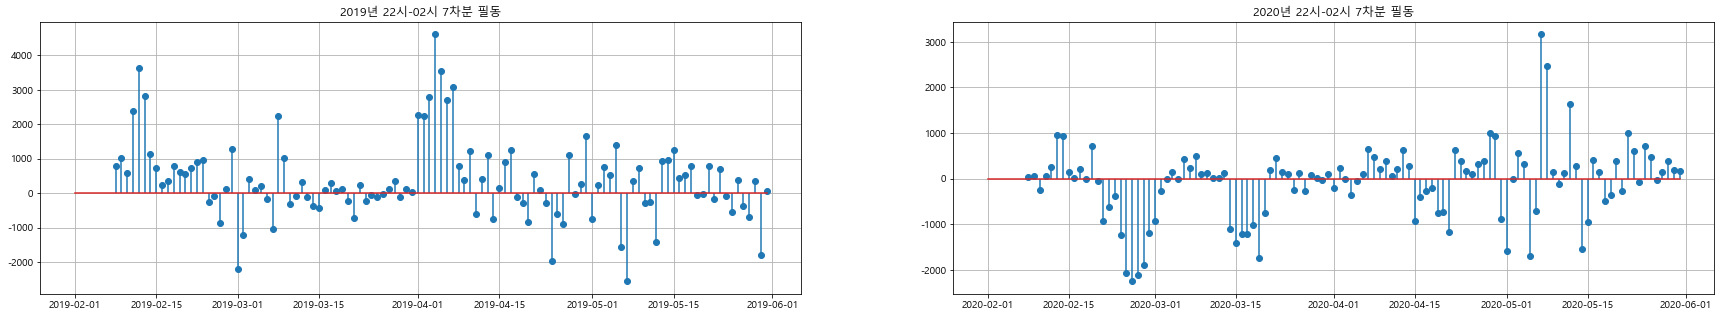

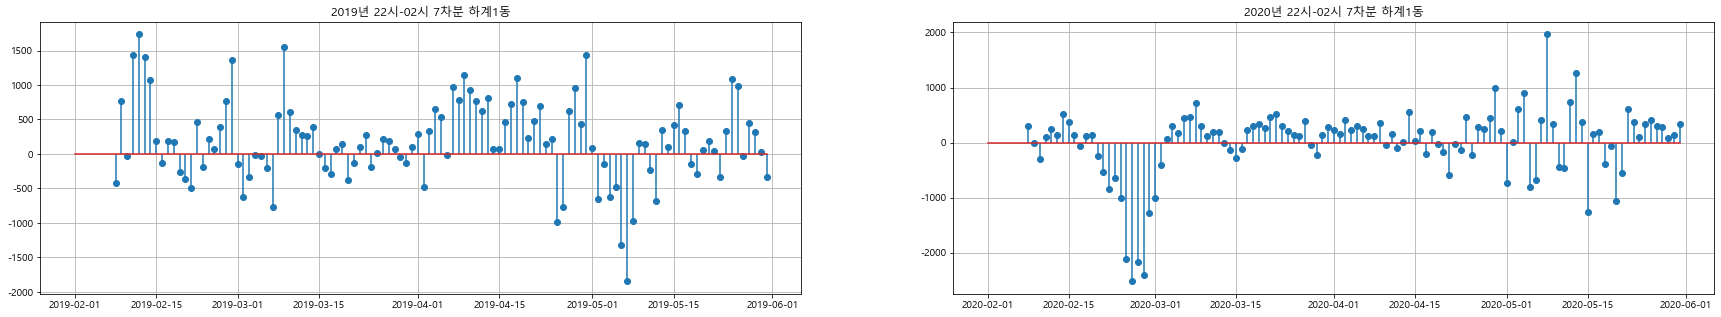

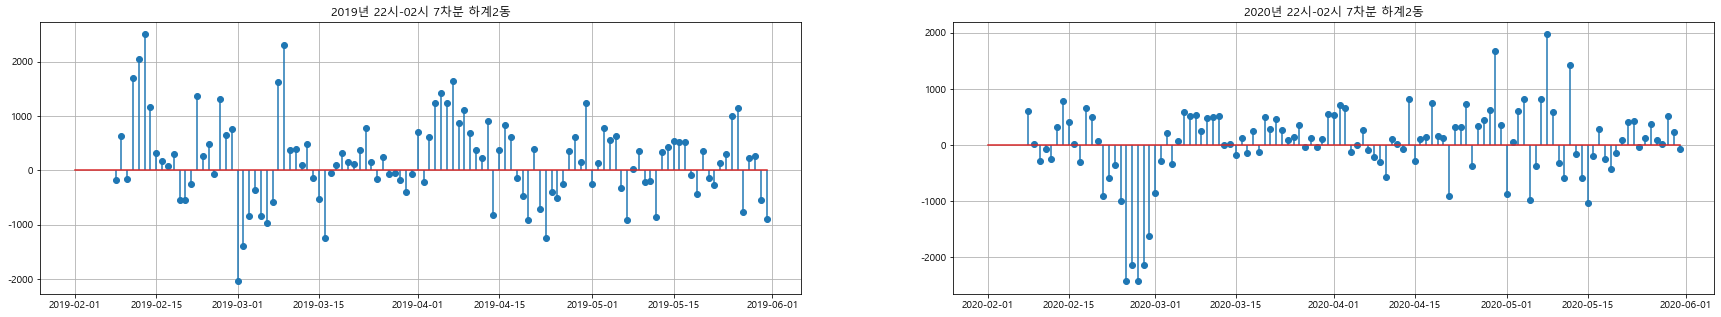

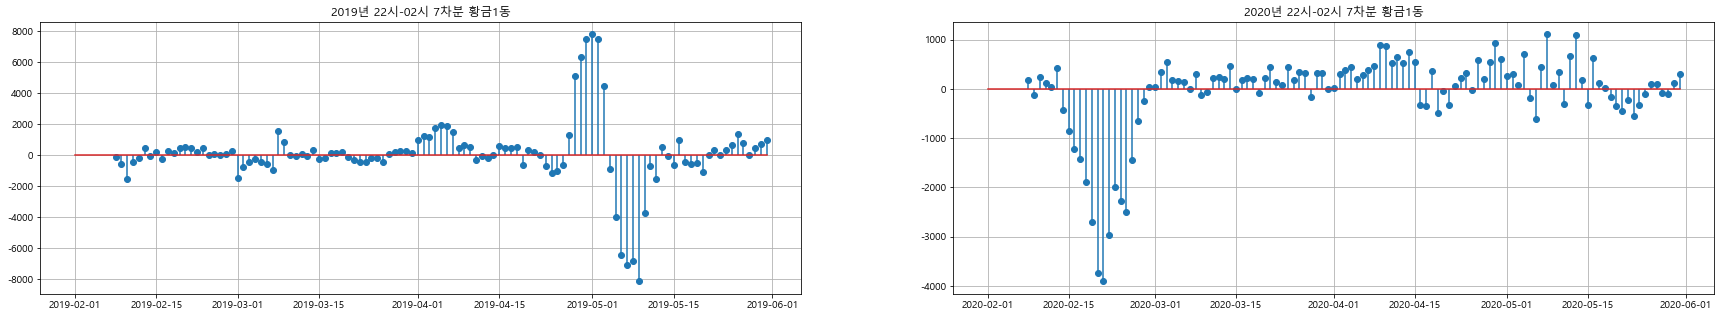

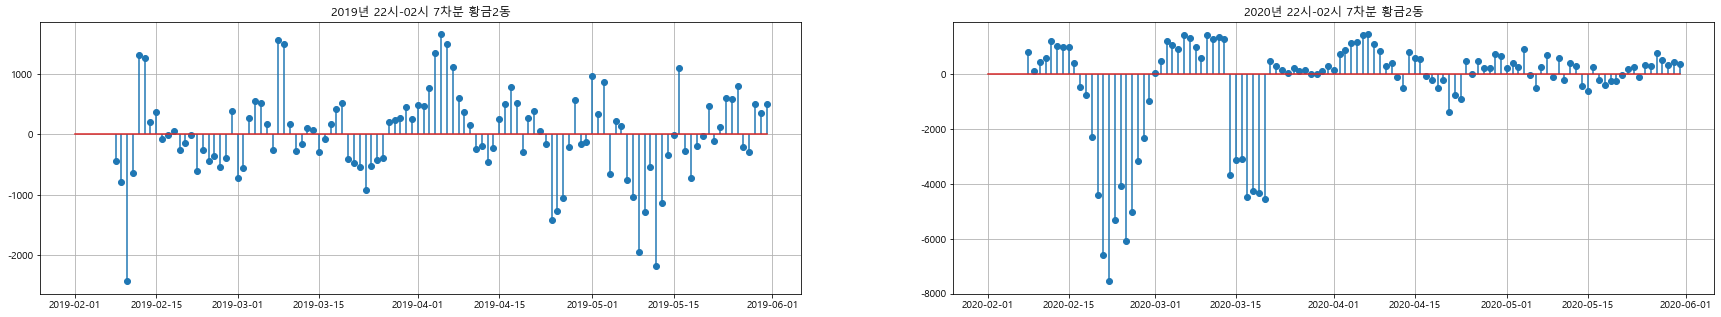

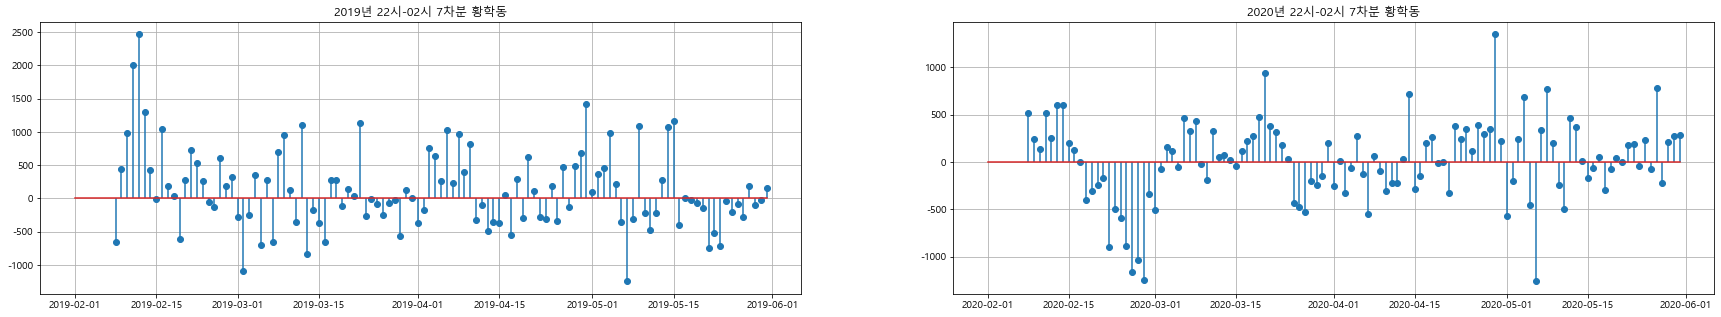

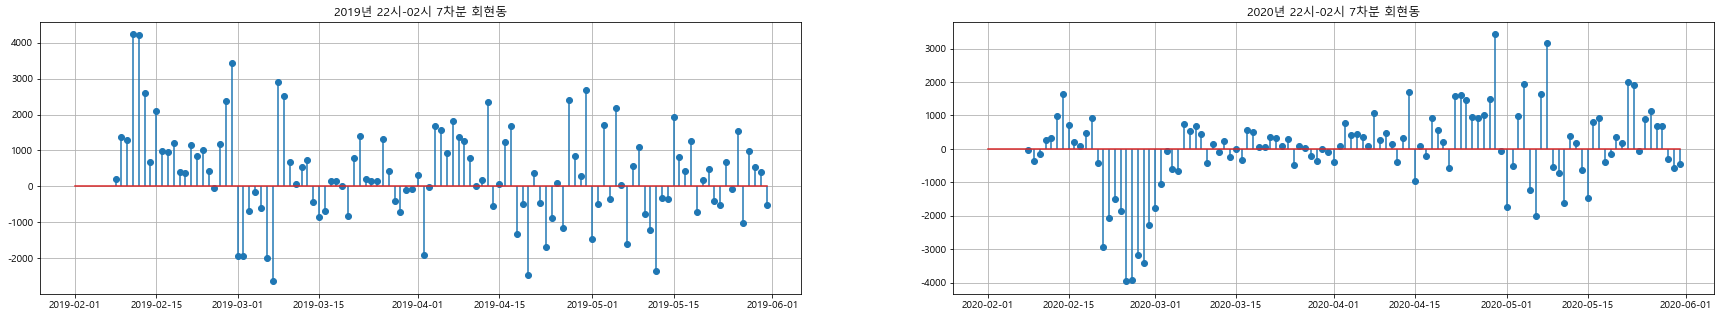

In [15]:
# 22시- 02시 동별 차분 조회하기( Case: diff 7 )
name_list= sk_time_2019_2202.DONG_NM.unique()
diff= 7

for i in range(69):
    name= name_list[i]
    sk_2019_diff_2202 = pd.DataFrame({'DATE': sk_time_2019_2202.query("DONG_NM == @name").DATE ,'DIFF1': sk_time_2019_2202.query("DONG_NM == @name").iloc[:,2] - sk_time_2019_2202.query("DONG_NM == @name").iloc[:,2].shift(diff)})
    sk_2020_diff_2202 = pd.DataFrame({'DATE': sk_time_2020_2202.query("DONG_NM == @name").DATE ,'DIFF1': sk_time_2020_2202.query("DONG_NM == @name").iloc[:,2] - sk_time_2020_2202.query("DONG_NM == @name").iloc[:,2].shift(diff)})
    try:       
        plt.figure(figsize= (30,5))
        plt.subplot(1,2,1)
        plt.stem(sk_2019_diff_2202.iloc[:,0], sk_2019_diff_2202.iloc[:,1], use_line_collection= True)
        plt.title("2019년 22시-02시 7차분 "+name)
        plt.grid('sns')
        
        plt.subplot(1,2,2)
        plt.stem(sk_2020_diff_2202.iloc[:,0], sk_2020_diff_2202.iloc[:,1], use_line_collection= True)
        plt.title("2020년 22시-02시 7차분 "+name)
        plt.grid('sns')
        plt.show()
    except:
        continue

## 03시 - 08시

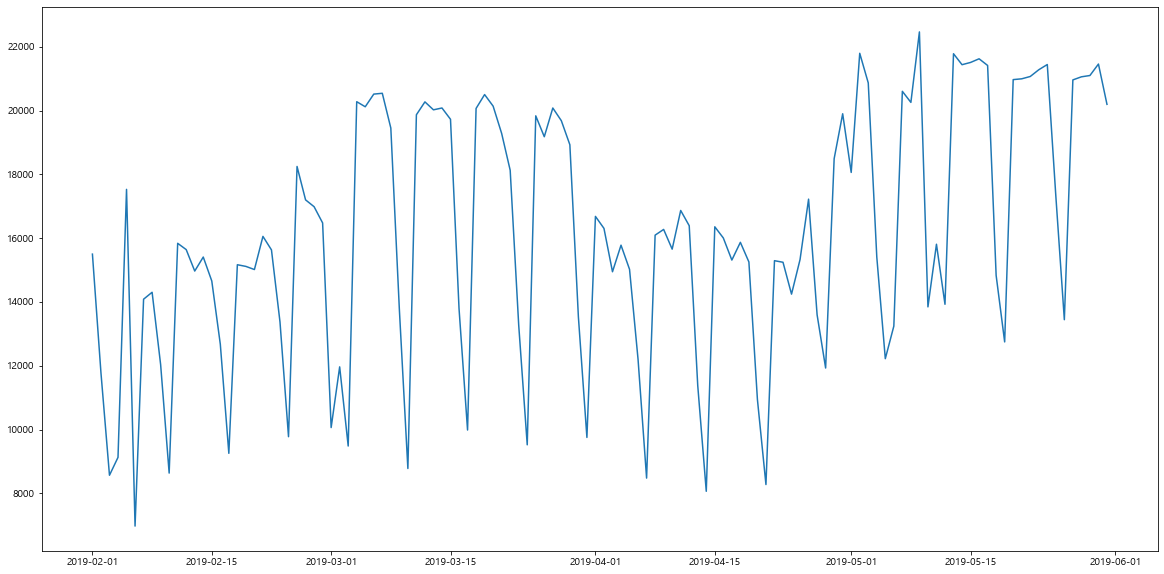

In [14]:
# 동 plot 조회하기
name_search= '고산1동'

plt.figure(figsize= (20,10))
plt.plot(sk_time_2019_0308[sk_time_2019_0308.DONG_NM == name_search].iloc[:,0], sk_time_2019_0308[sk_time_2019_0308.DONG_NM == name_search].iloc[:,2])
plt.show()

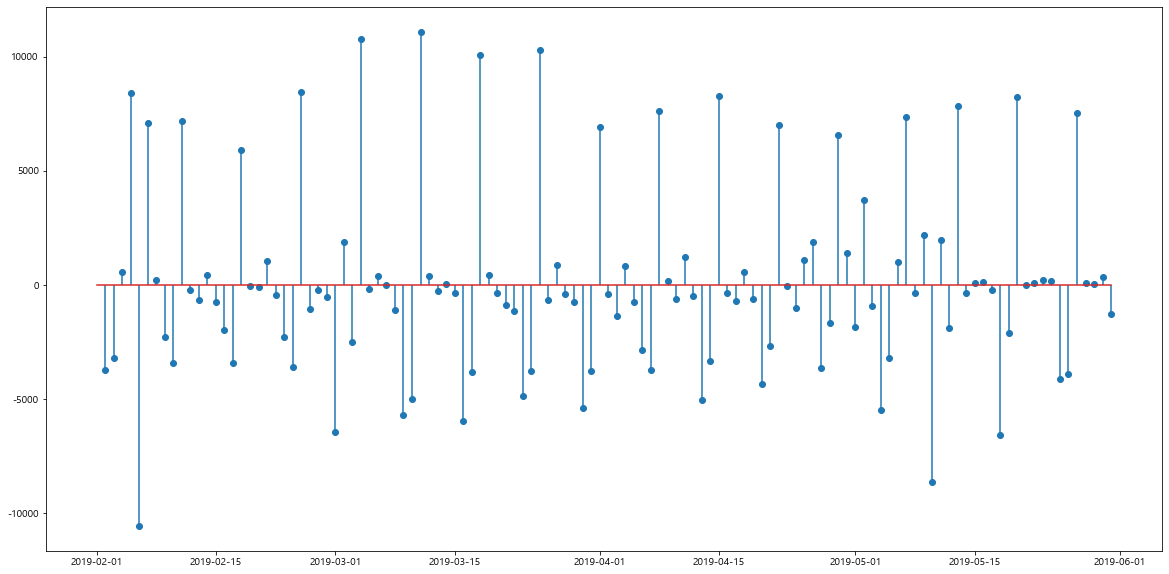

In [65]:
# 2019년 동 diff 조회하기
name_search = '고산1동'
diff= 1
diff_pd_search= pd.DataFrame({'DATE': sk_time_2019_0308.query("DONG_NM == @name_search").DATE ,'DIFF1': sk_time_2019_0308.query("DONG_NM == @name_search").iloc[:,2] - sk_time_2019_0308.query("DONG_NM == @name_search").iloc[:,2].shift(diff)})

plt.figure(figsize= (20,10))
plt.stem(diff_pd_search.iloc[:,0],diff_pd_search.iloc[:,1], use_line_collection= True)
plt.show()

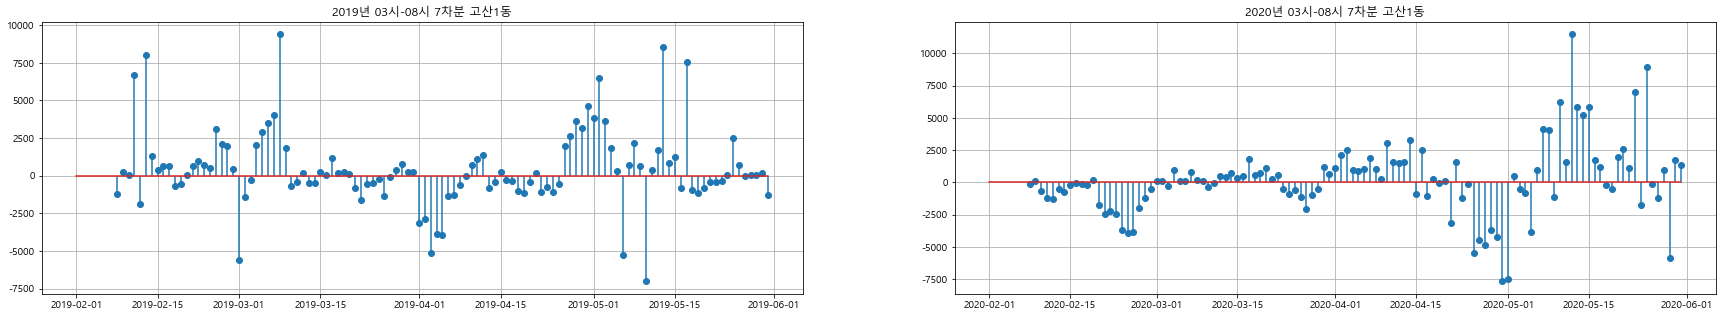

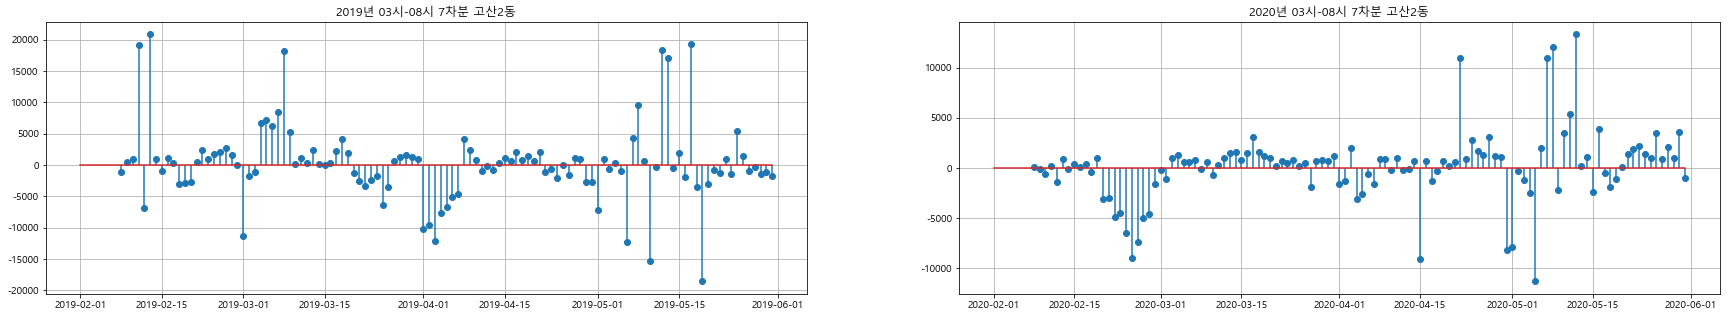

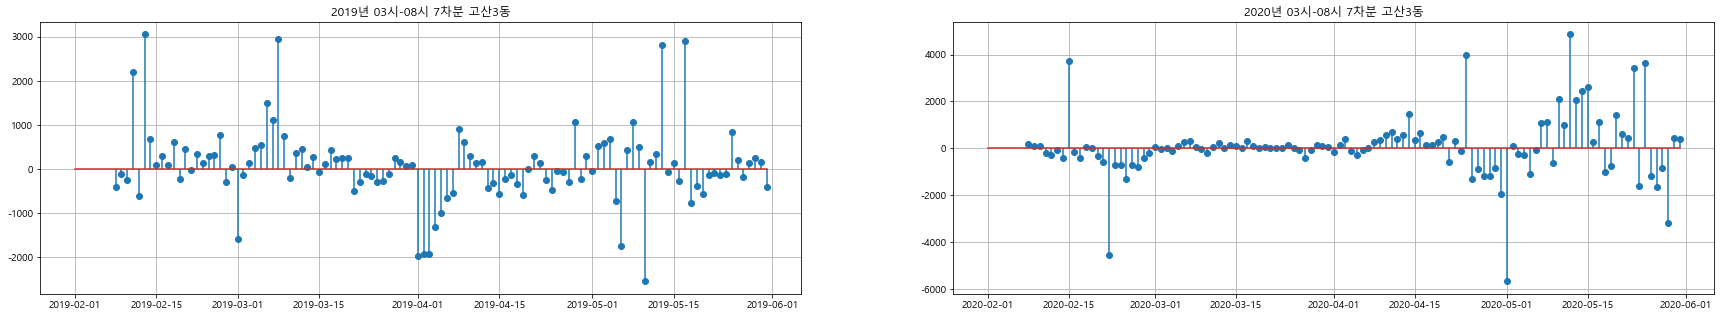

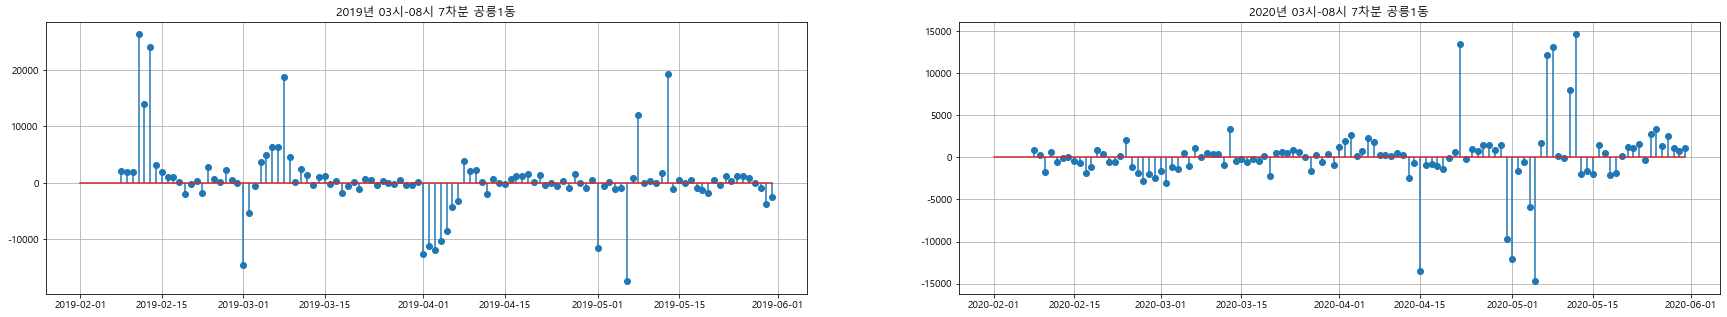

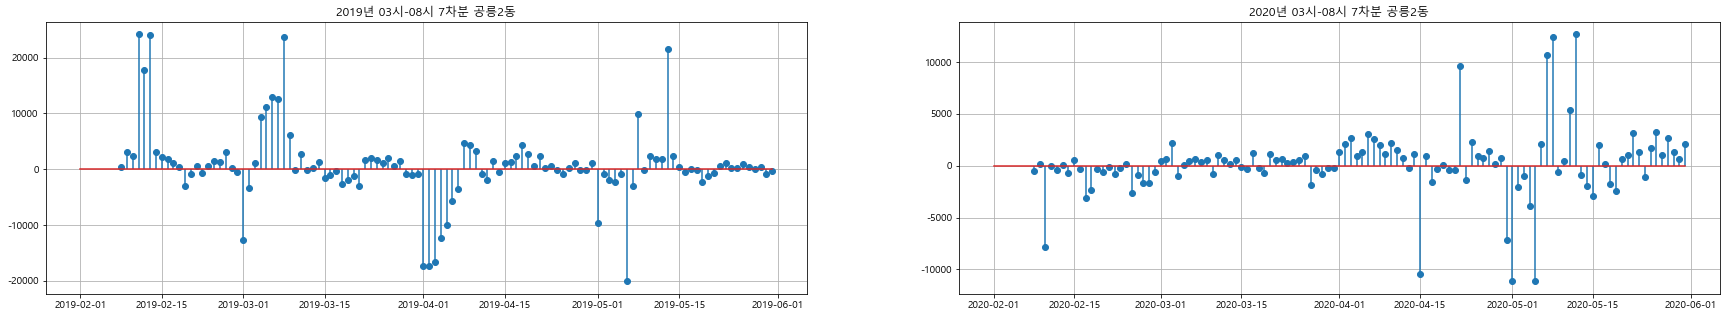

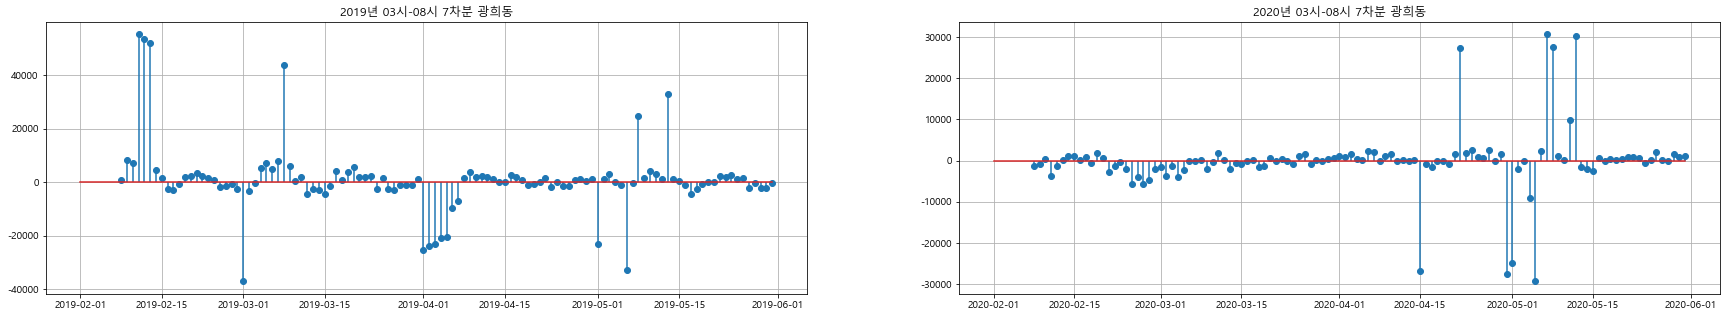

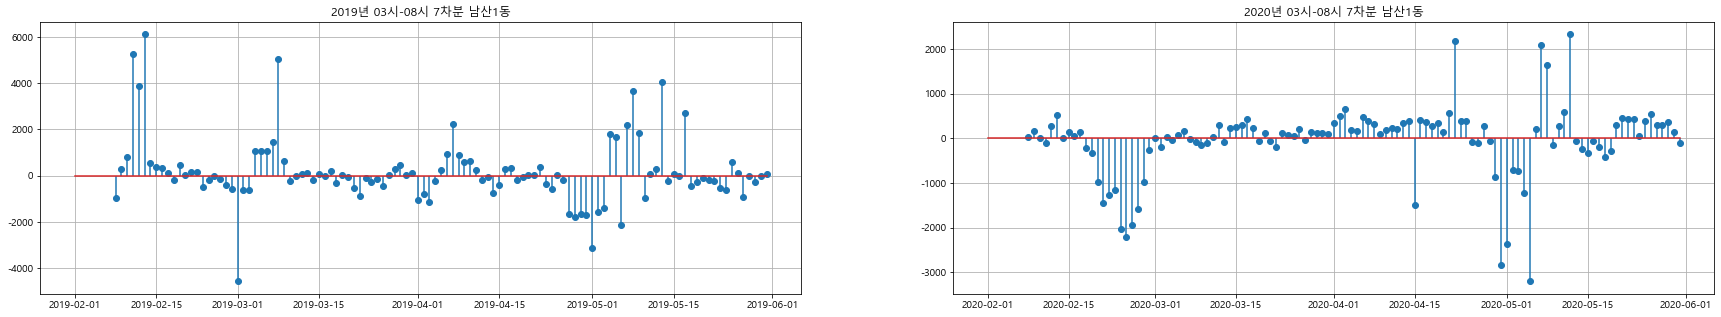

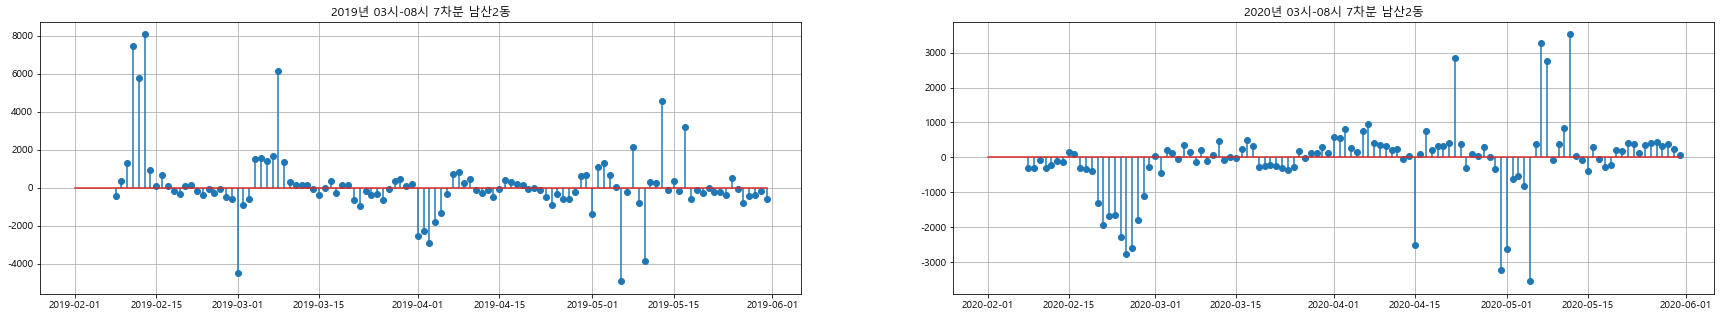

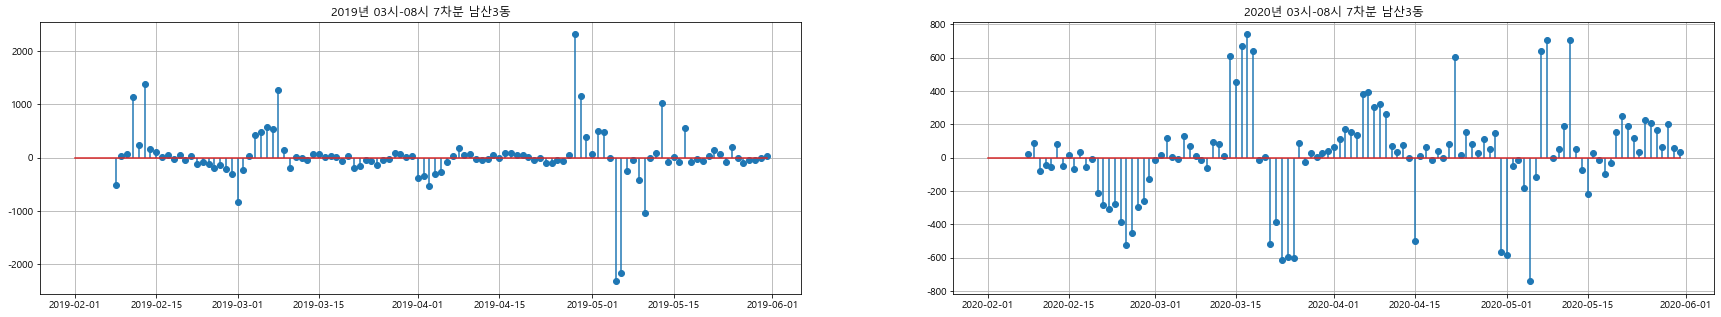

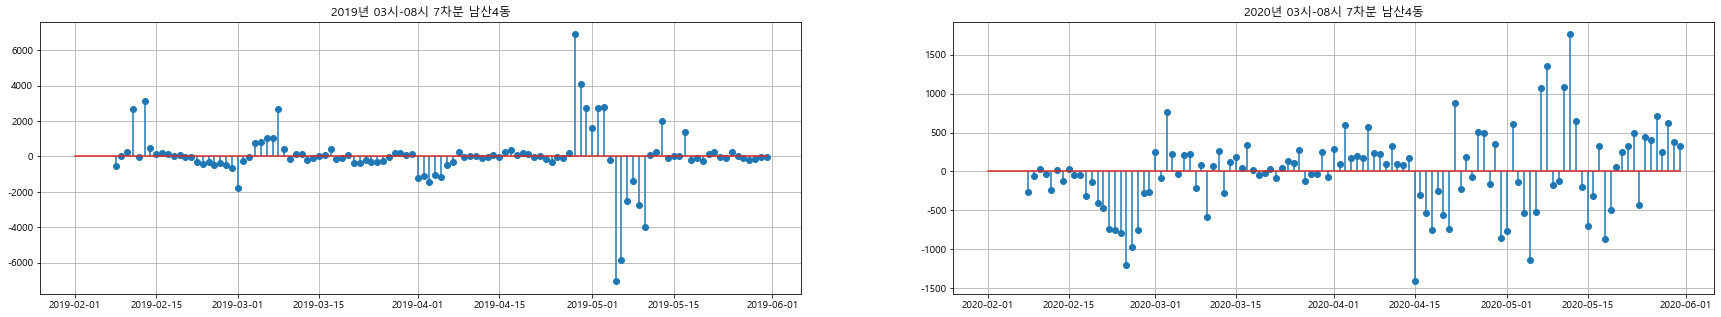

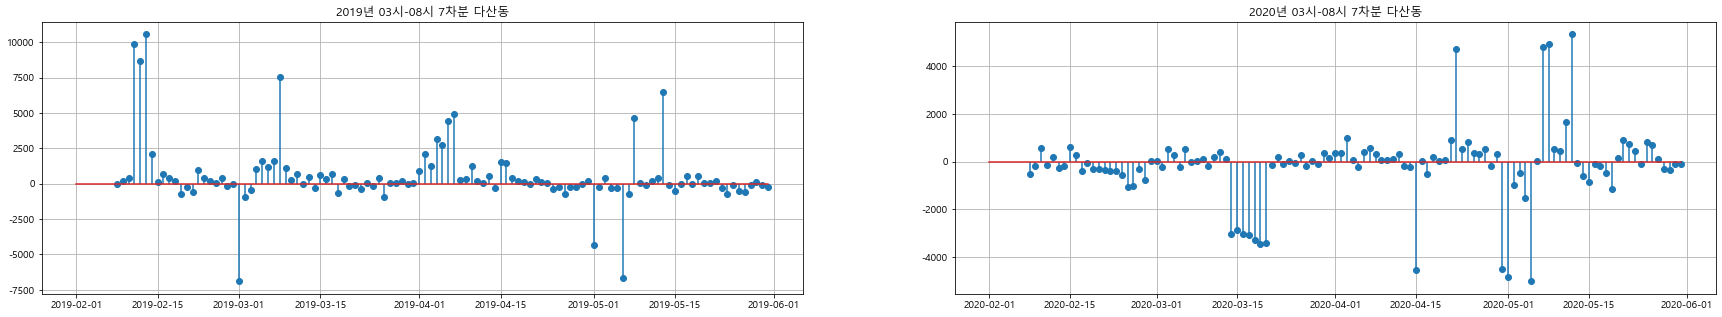

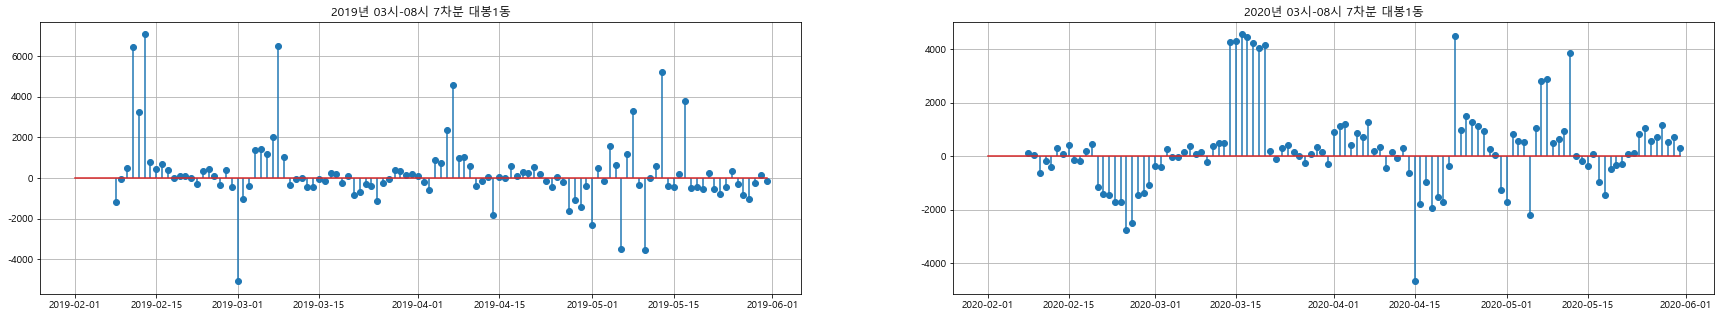

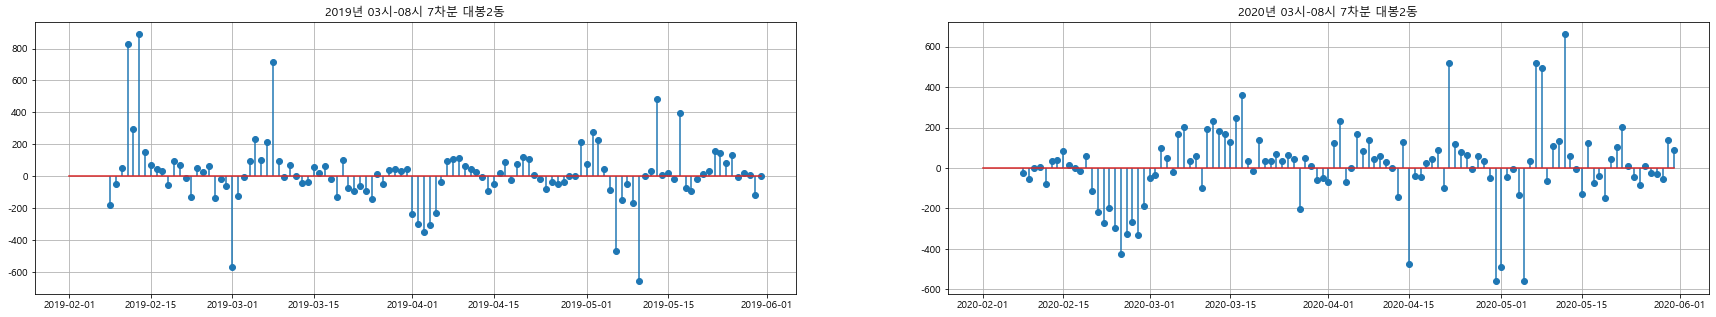

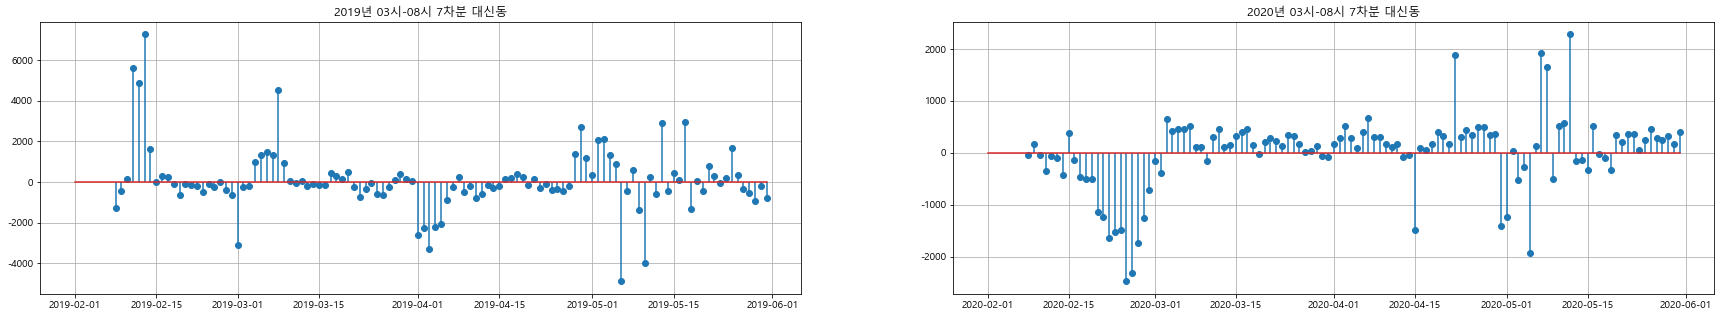

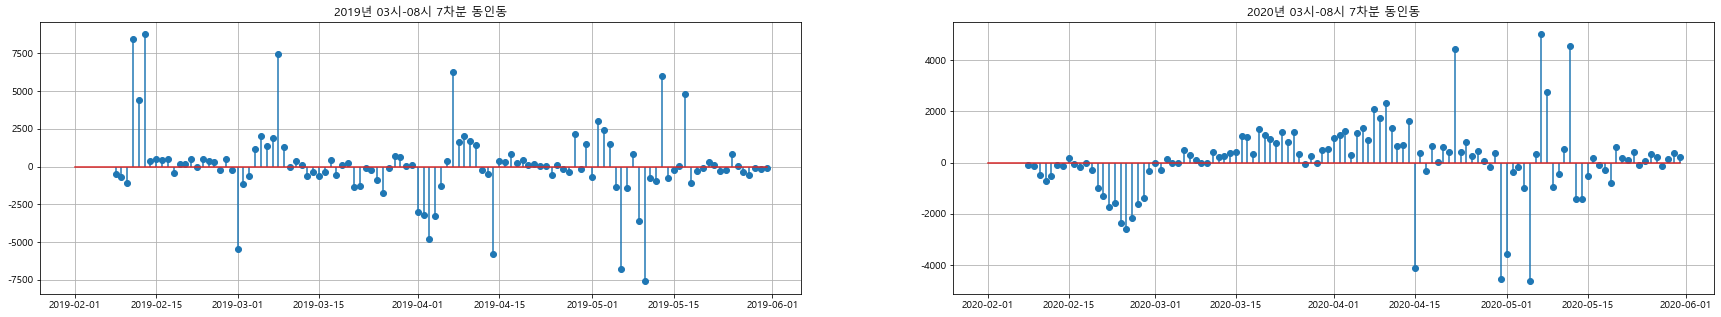

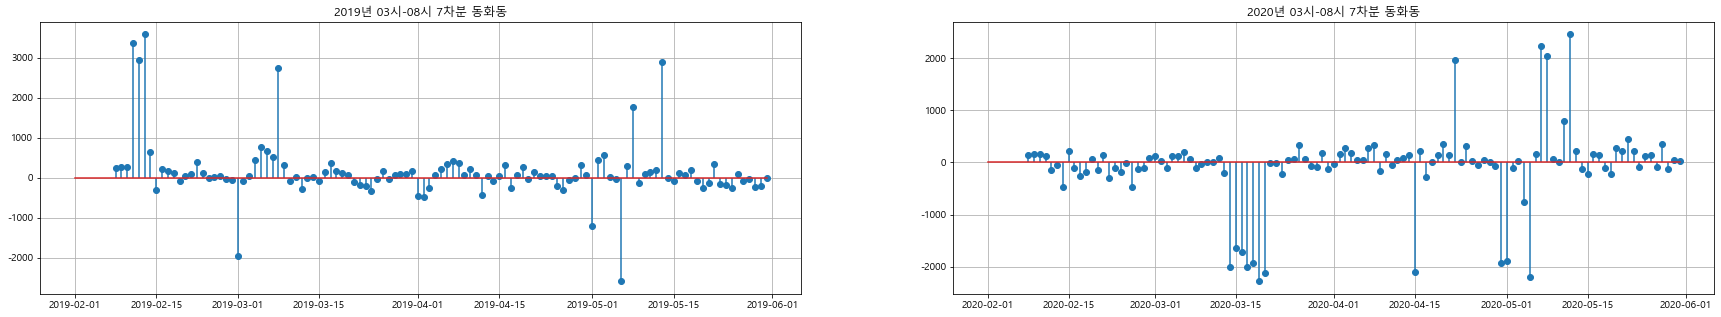

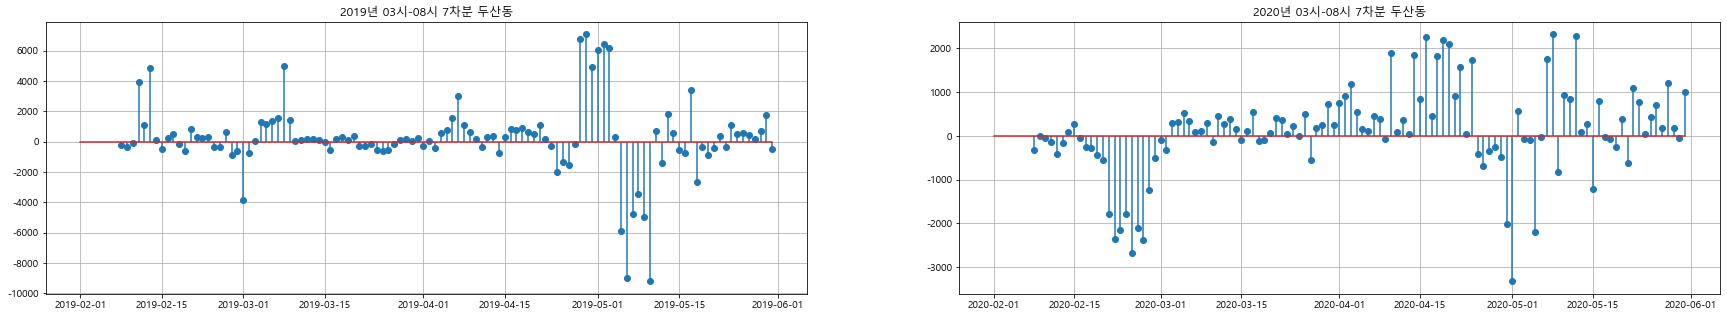

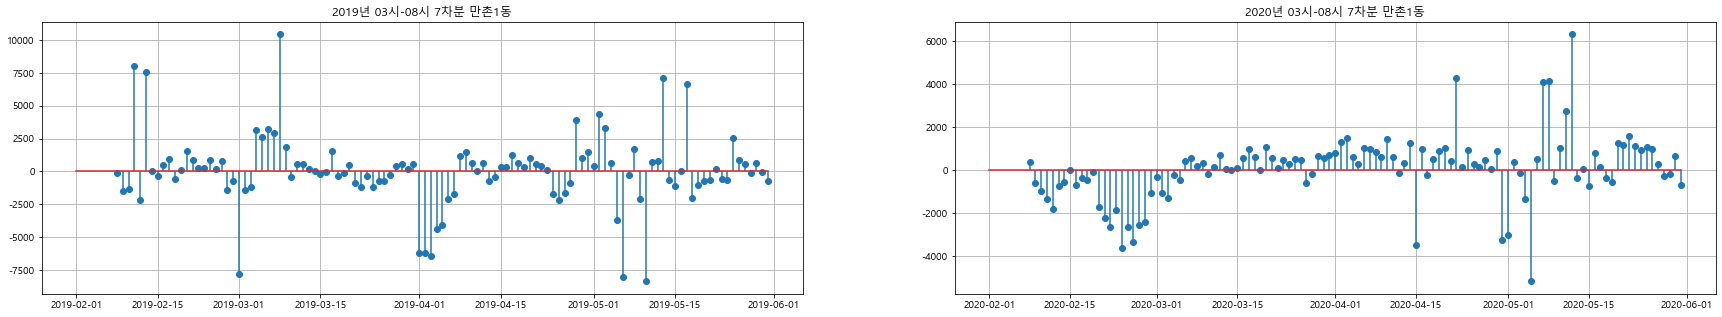

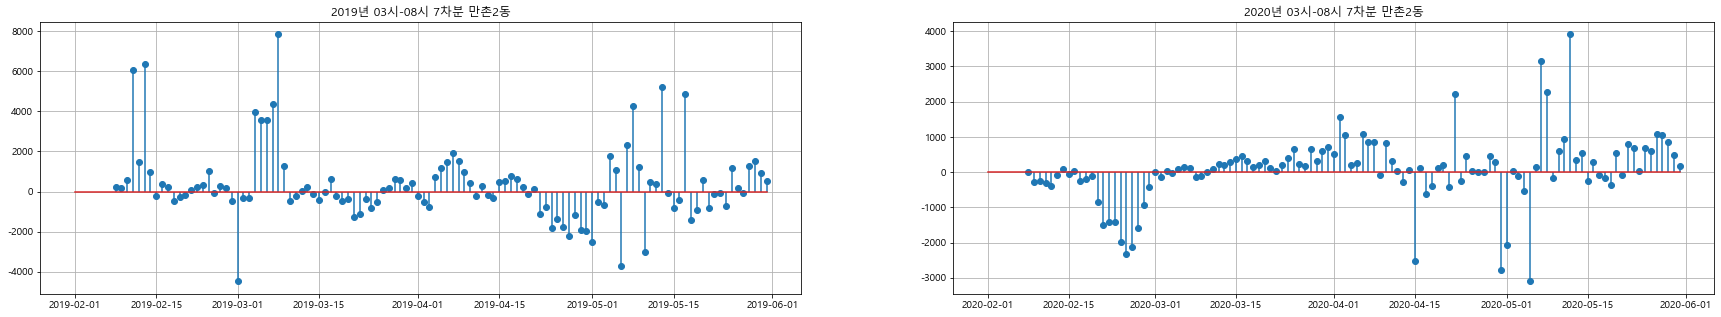

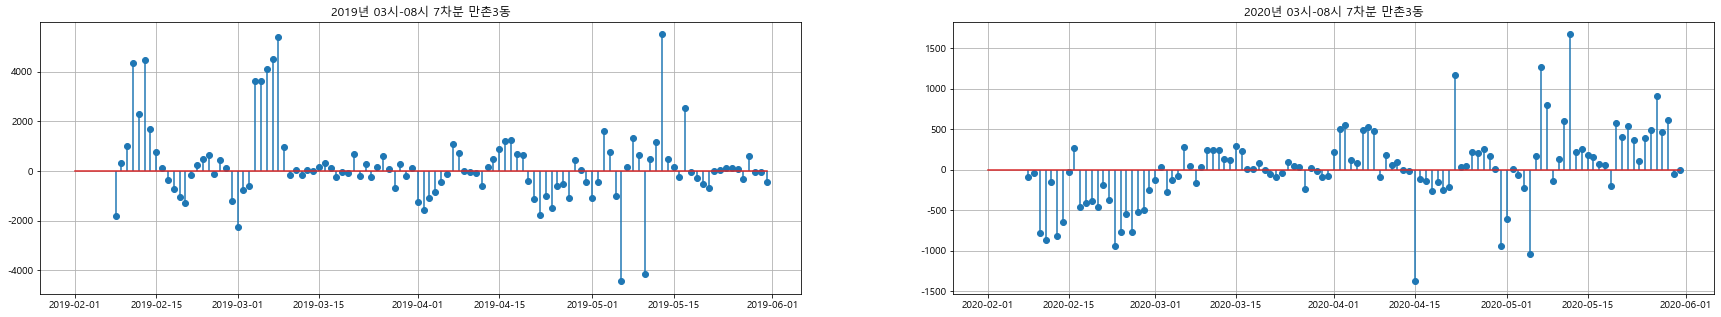

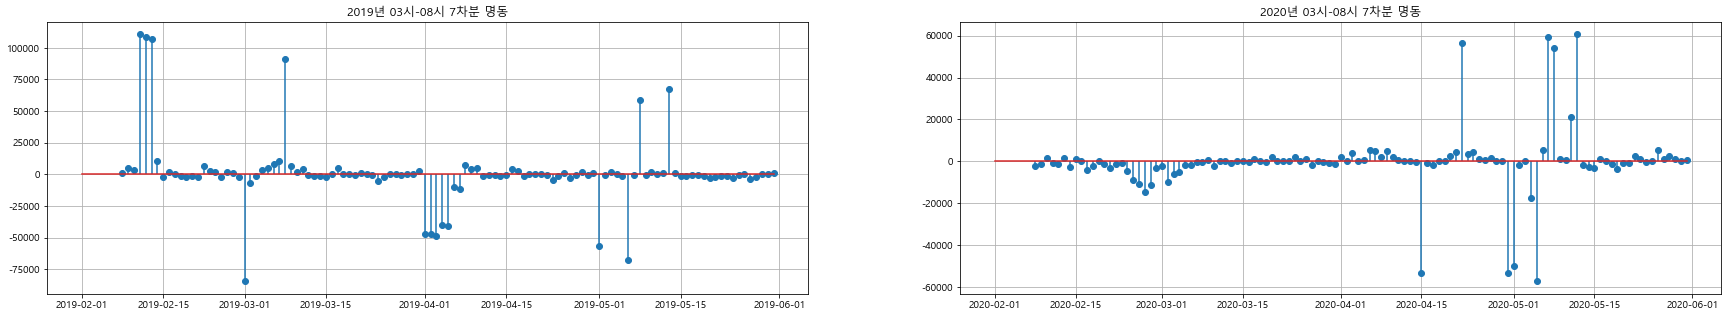

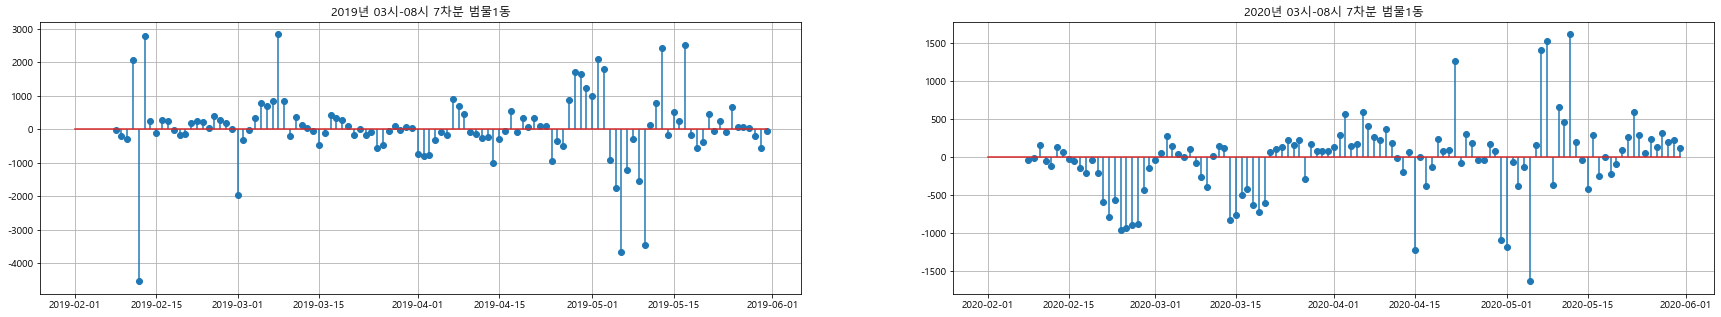

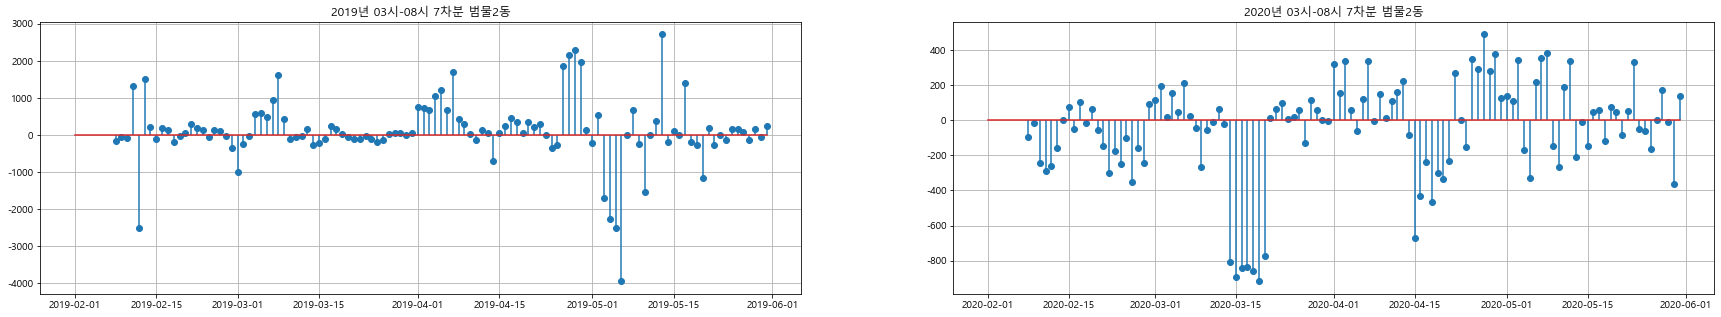

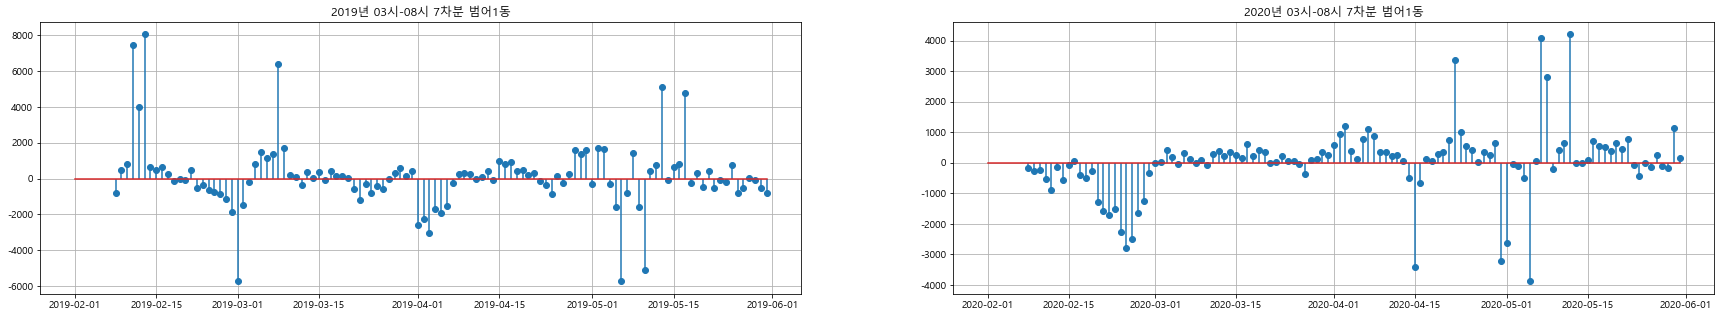

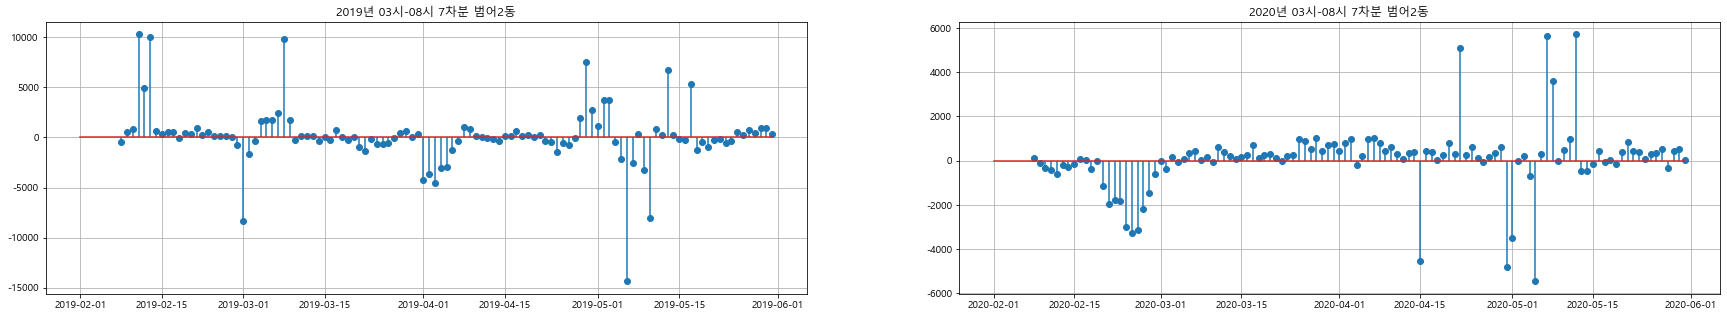

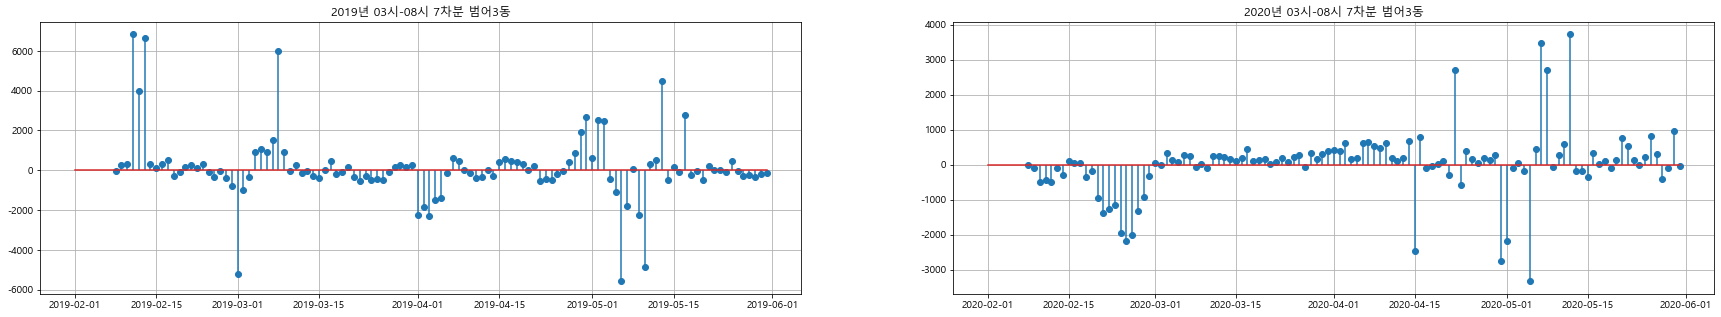

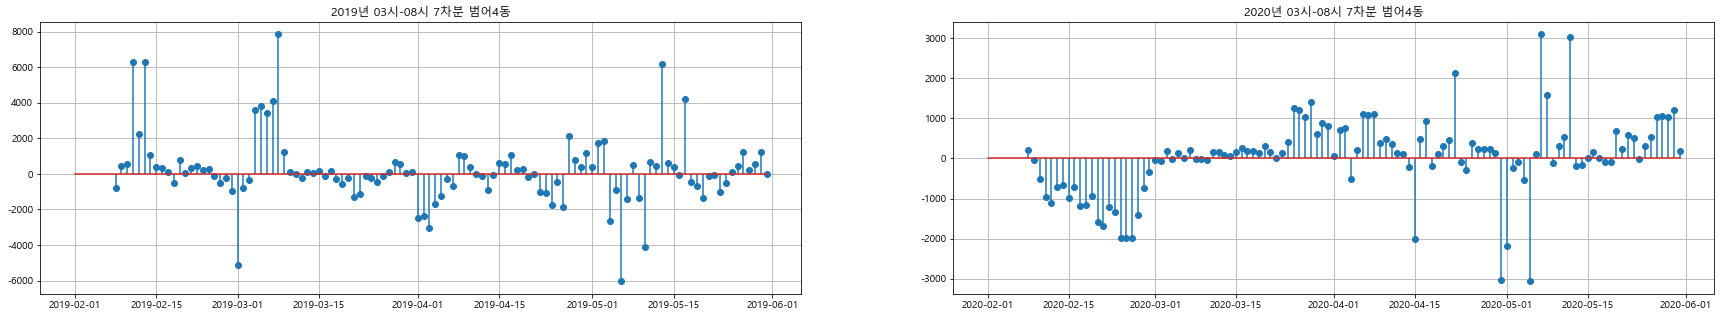

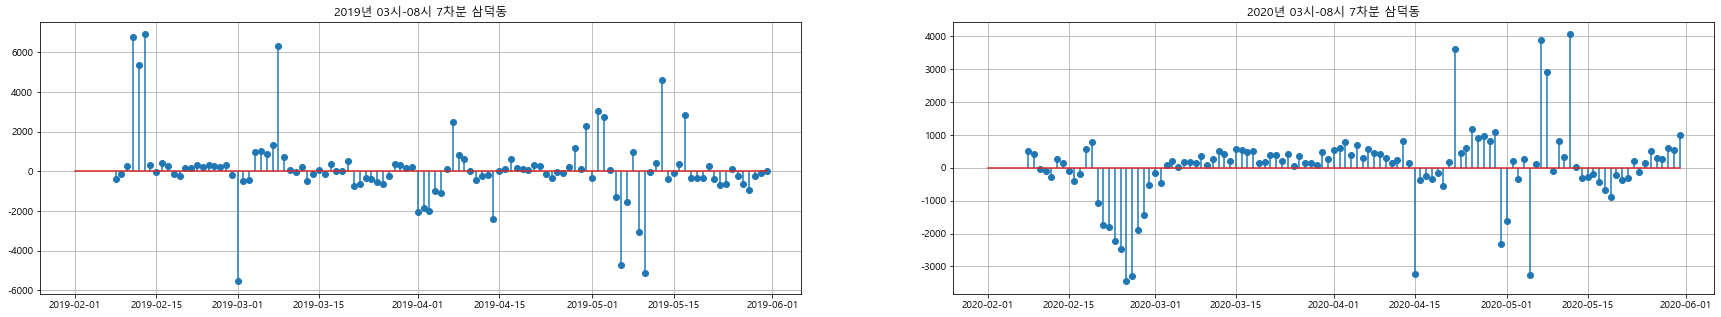

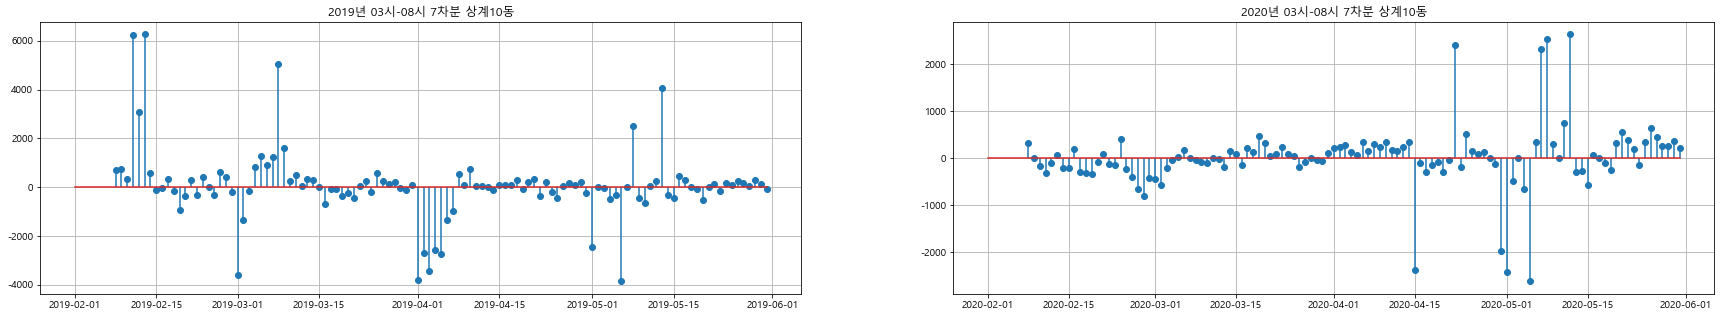

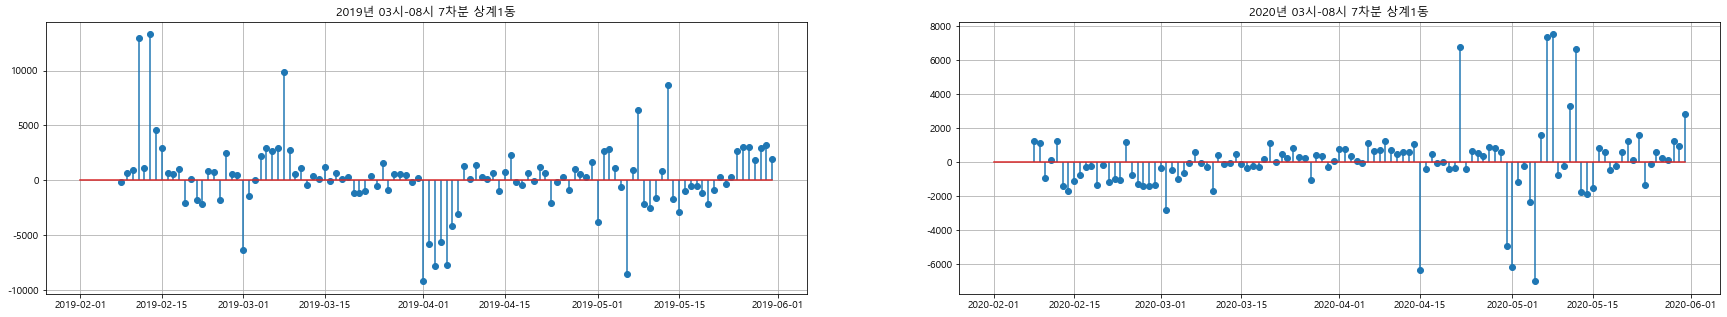

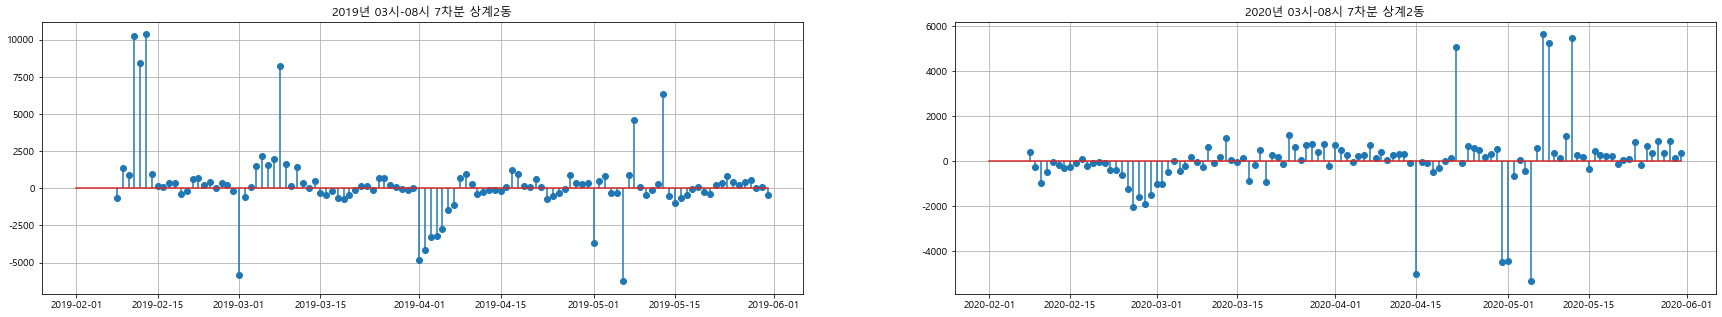

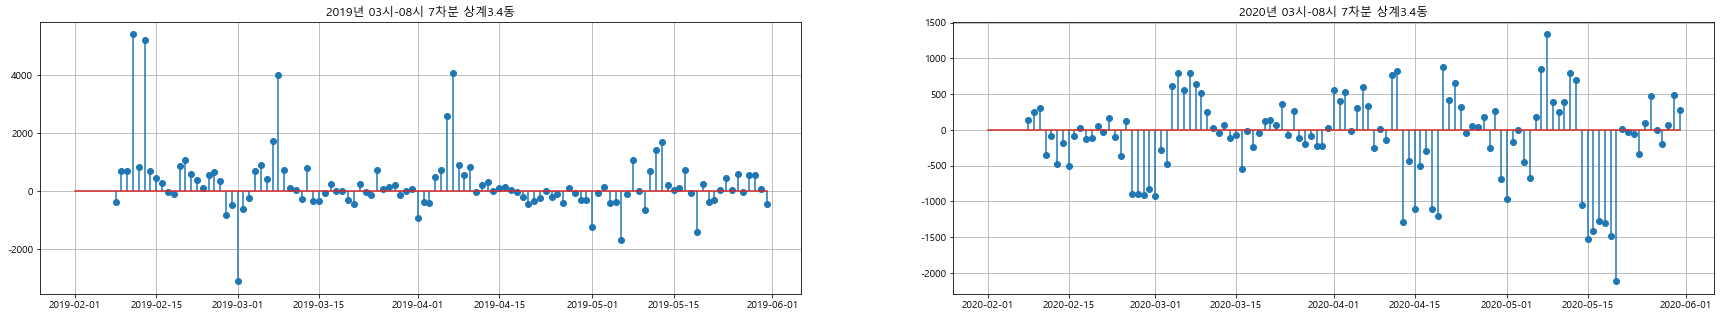

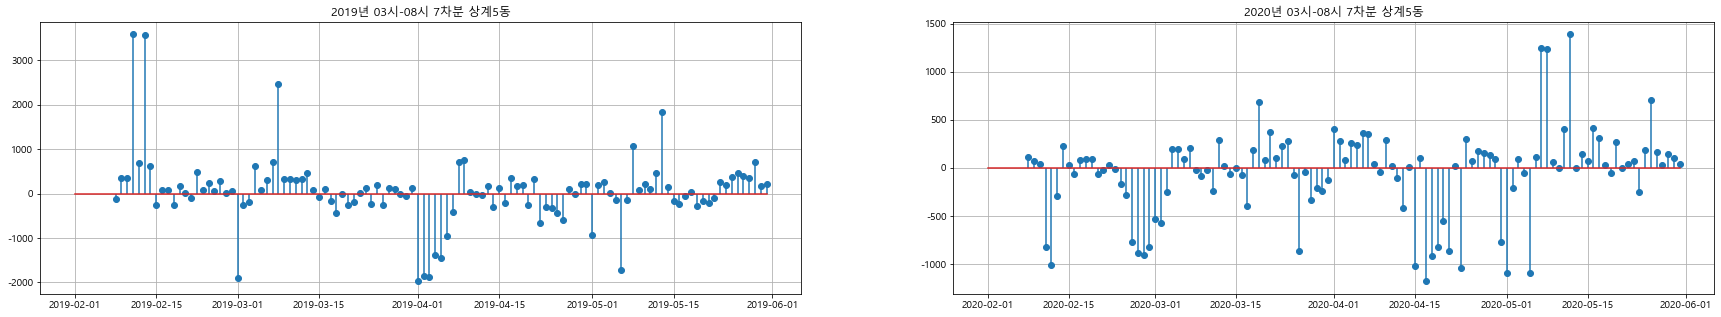

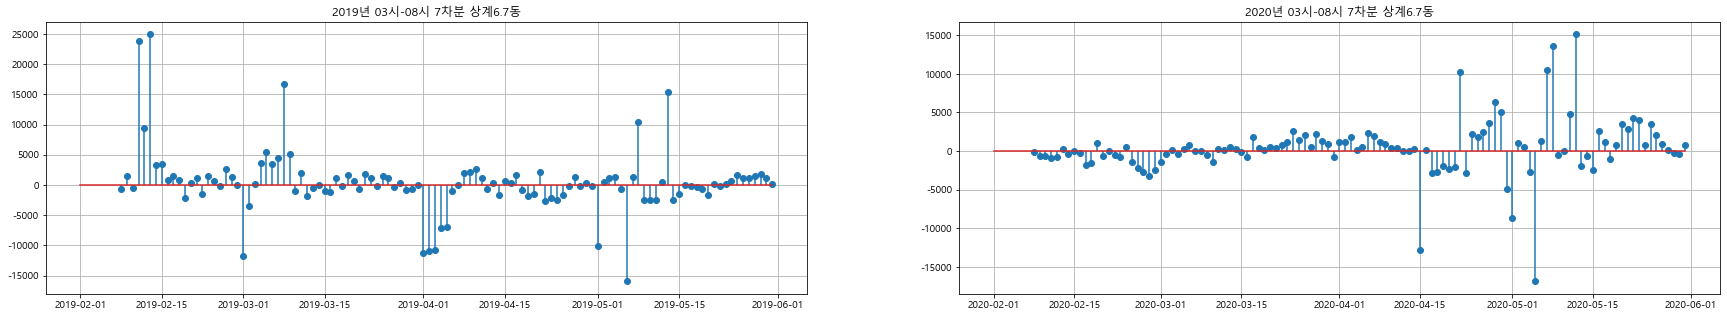

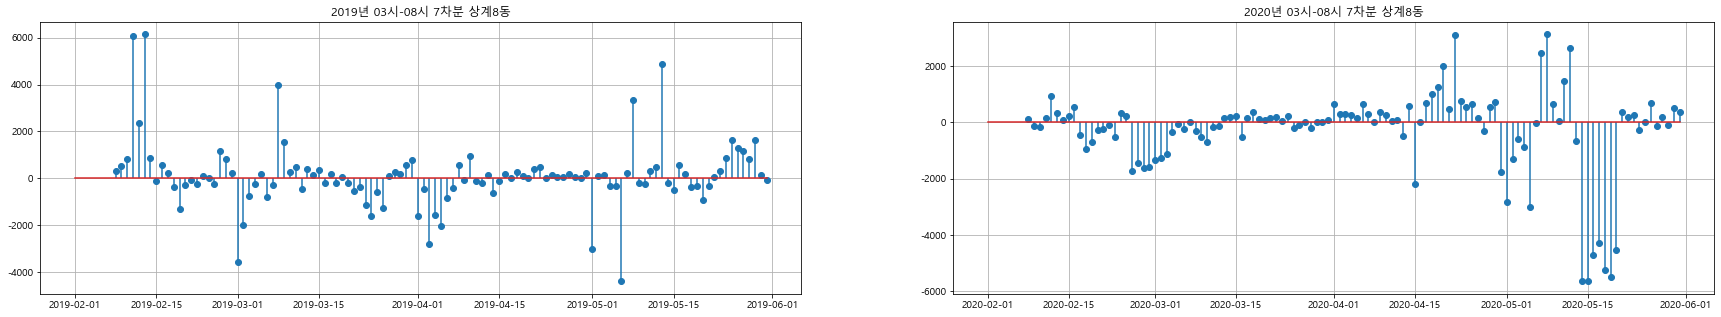

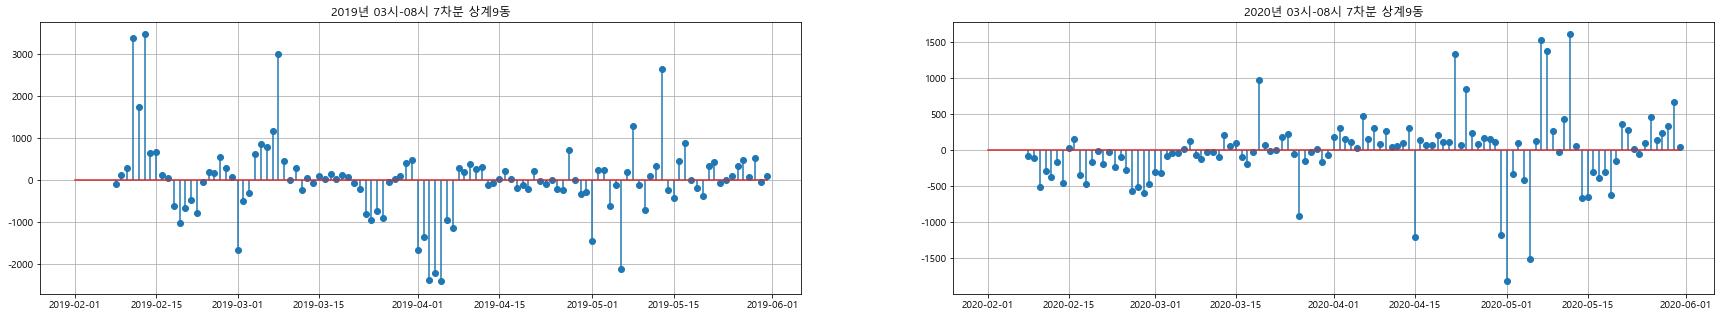

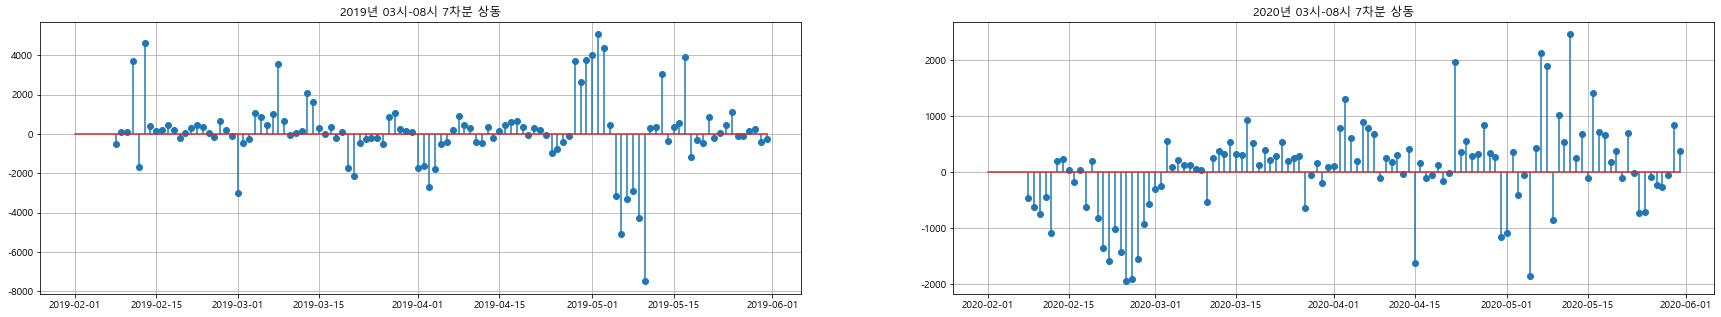

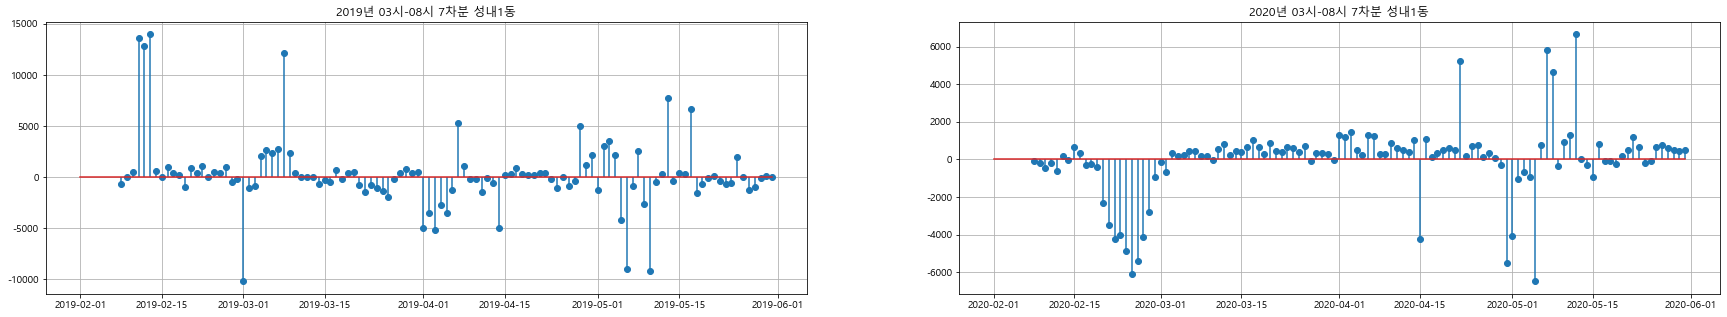

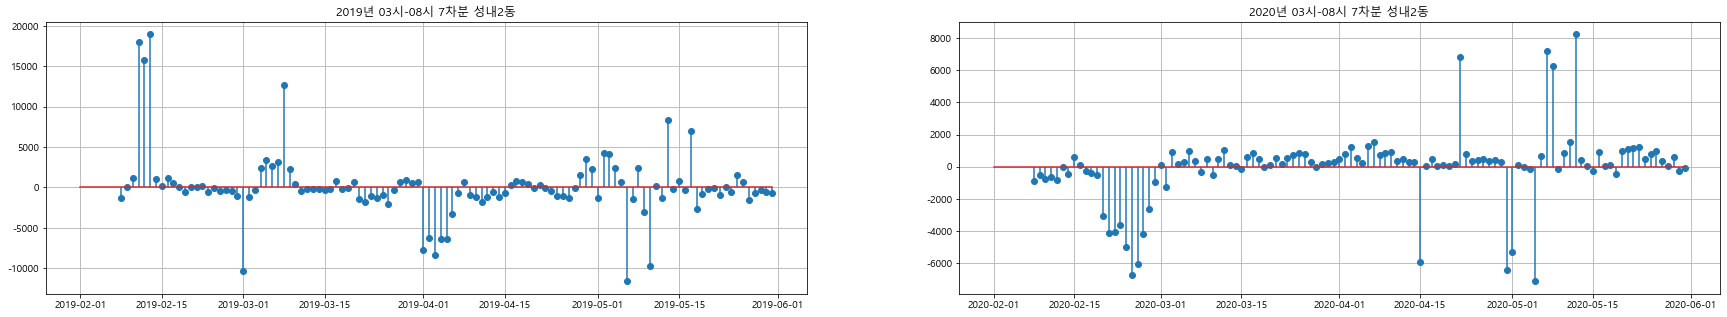

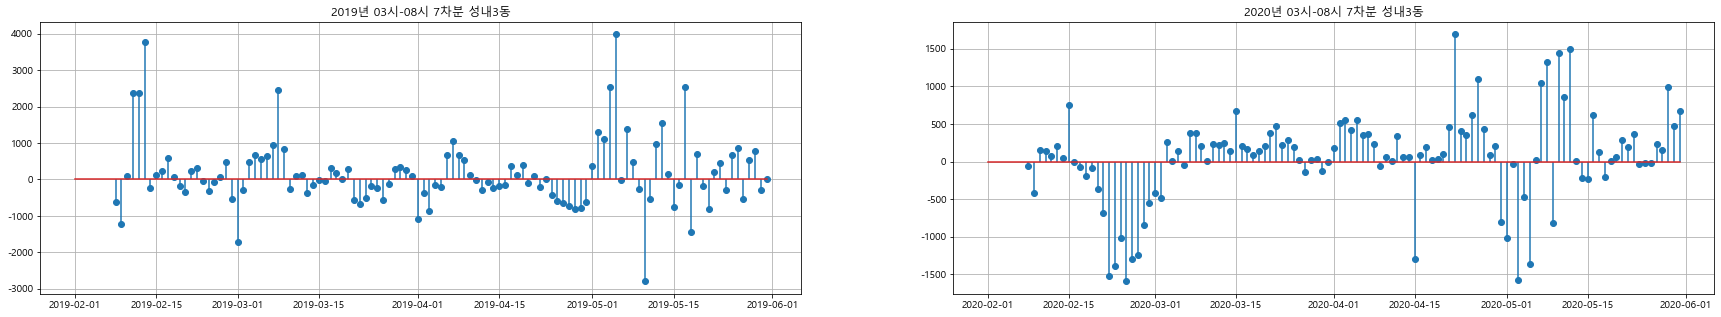

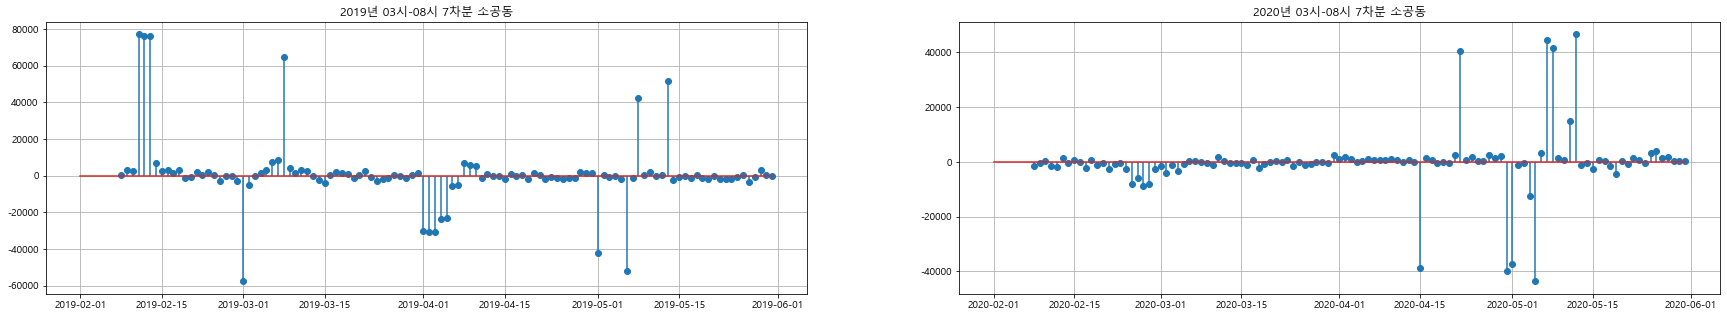

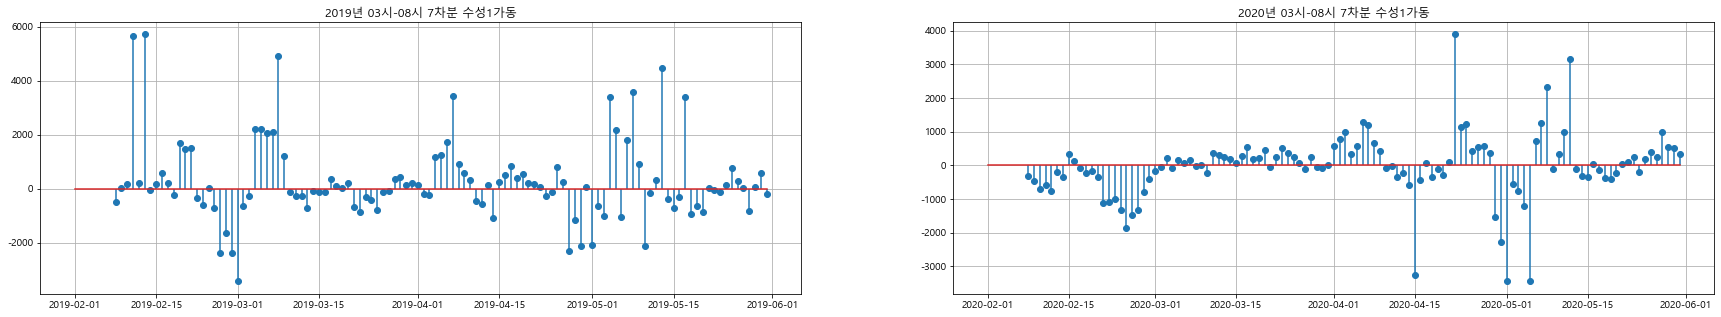

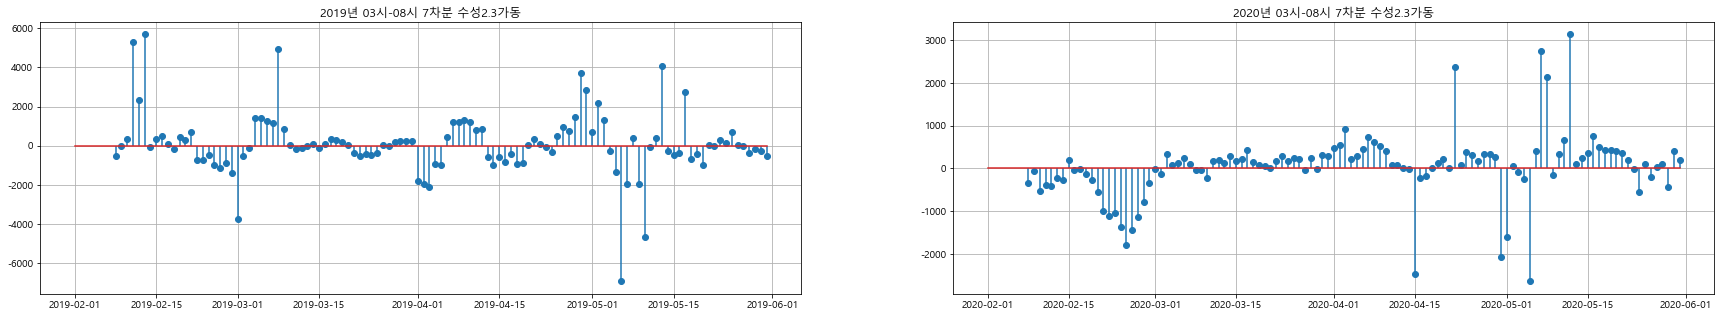

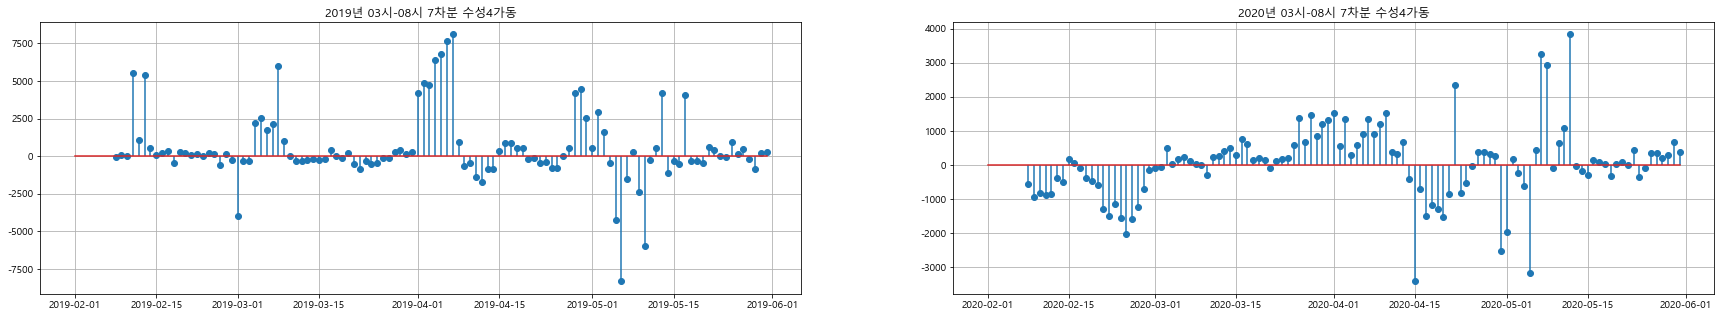

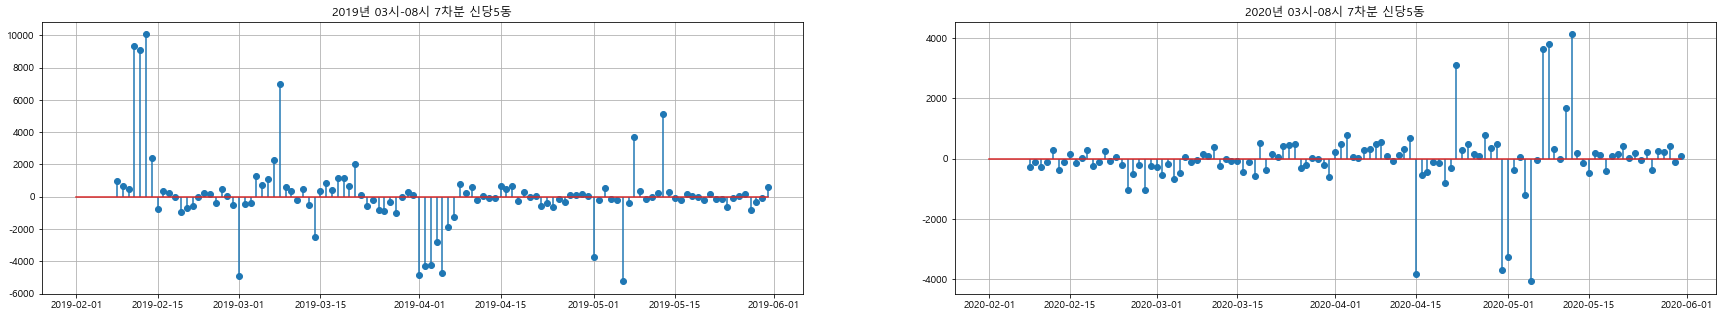

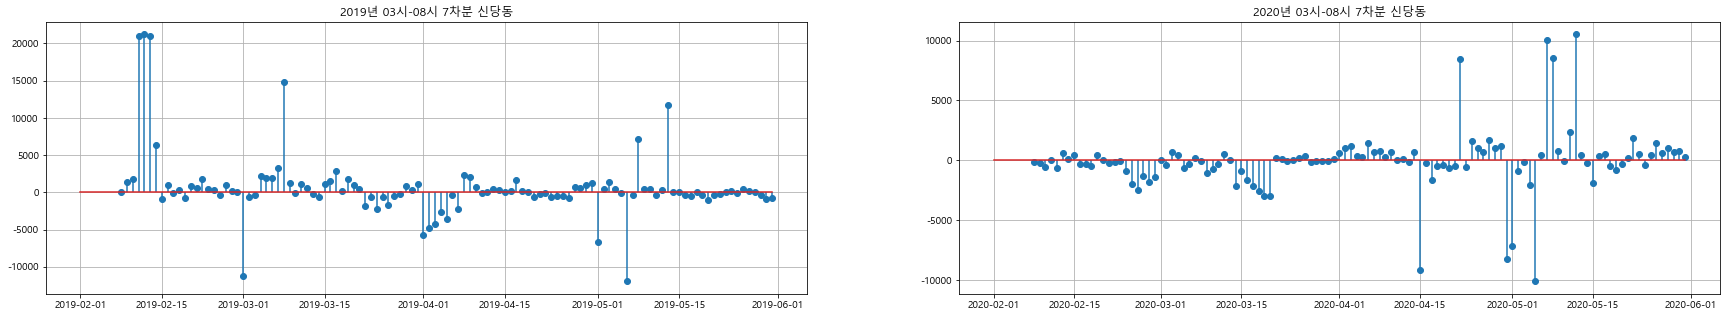

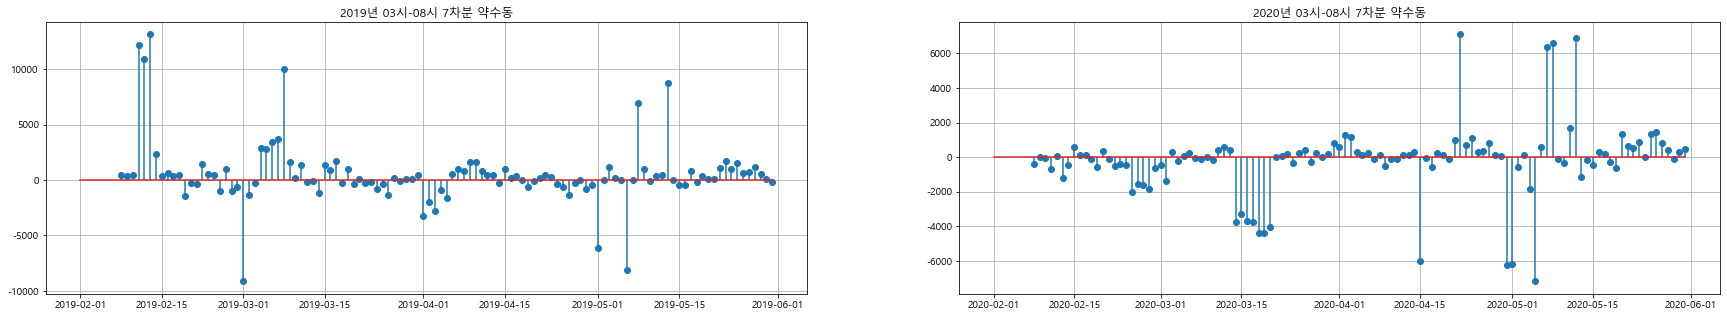

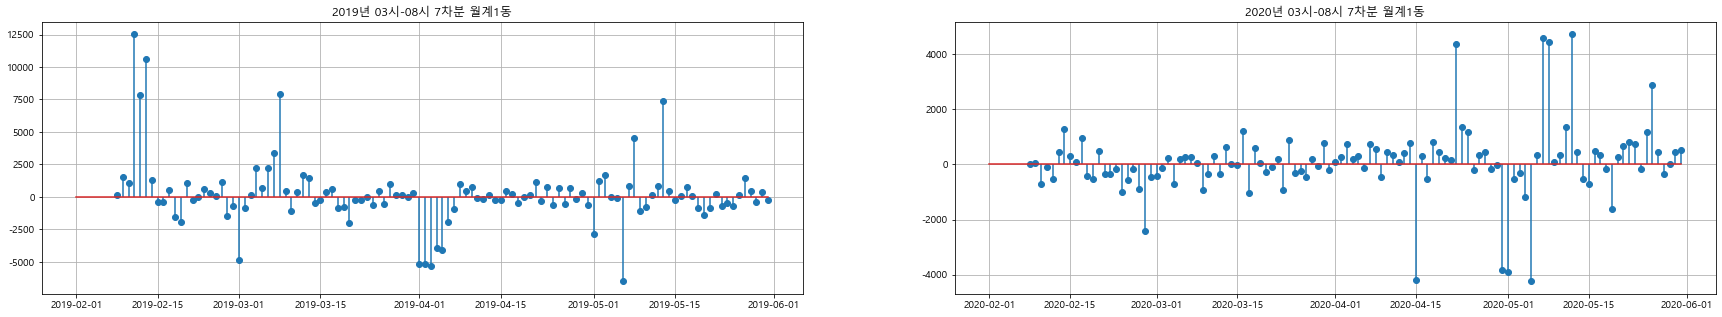

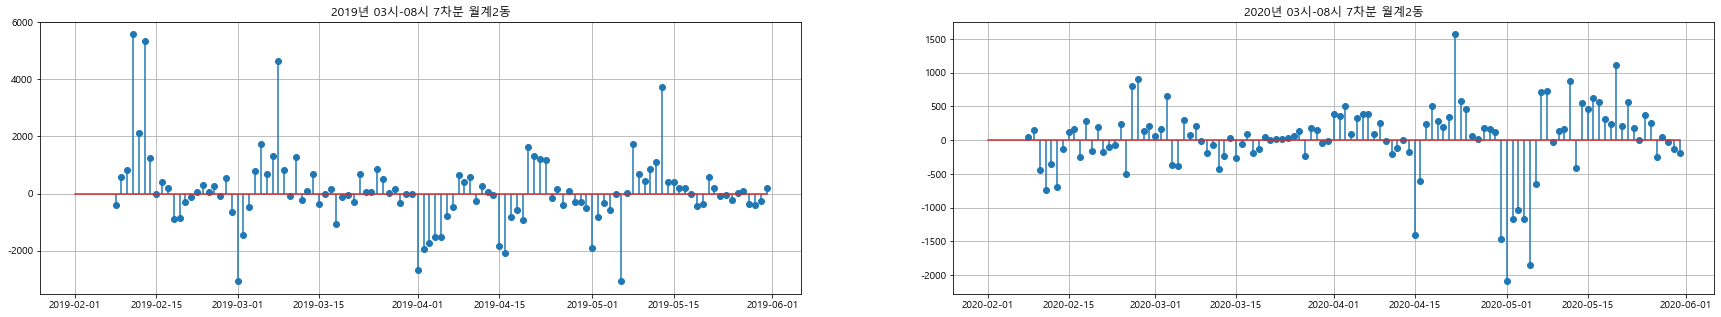

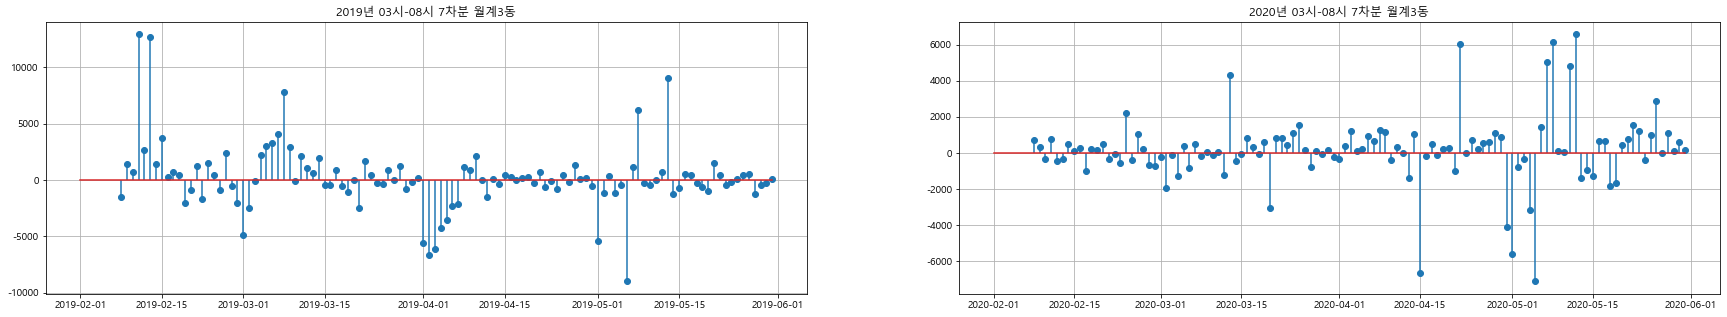

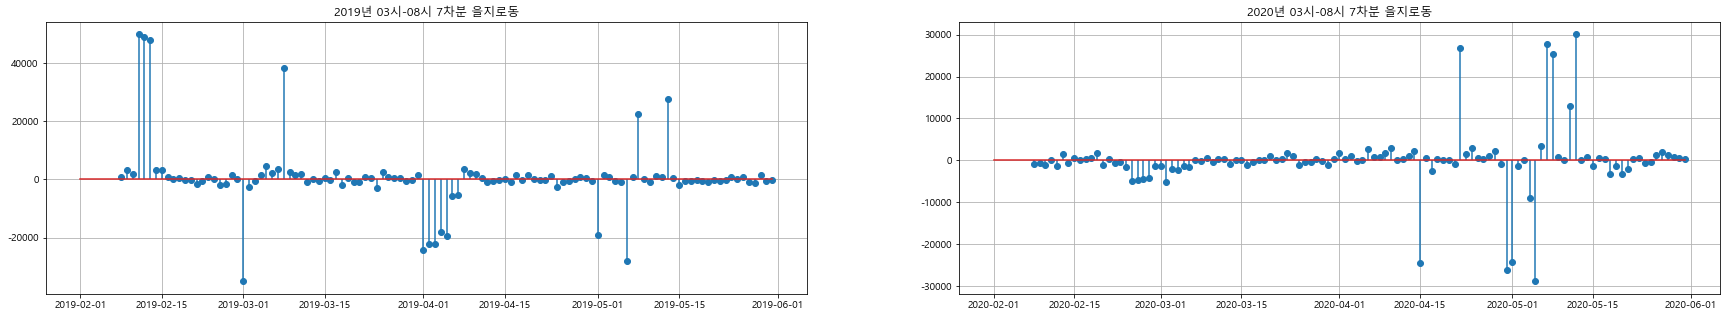

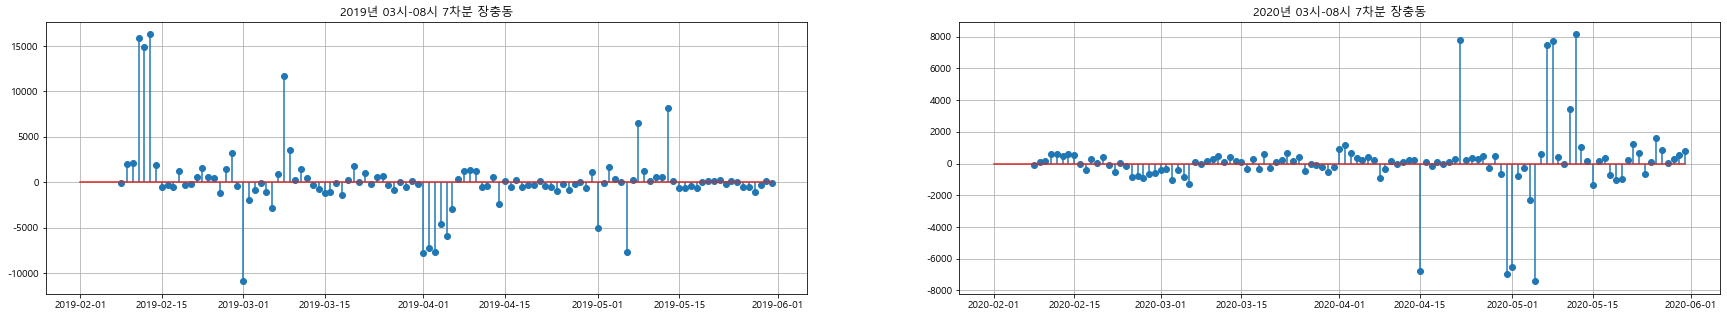

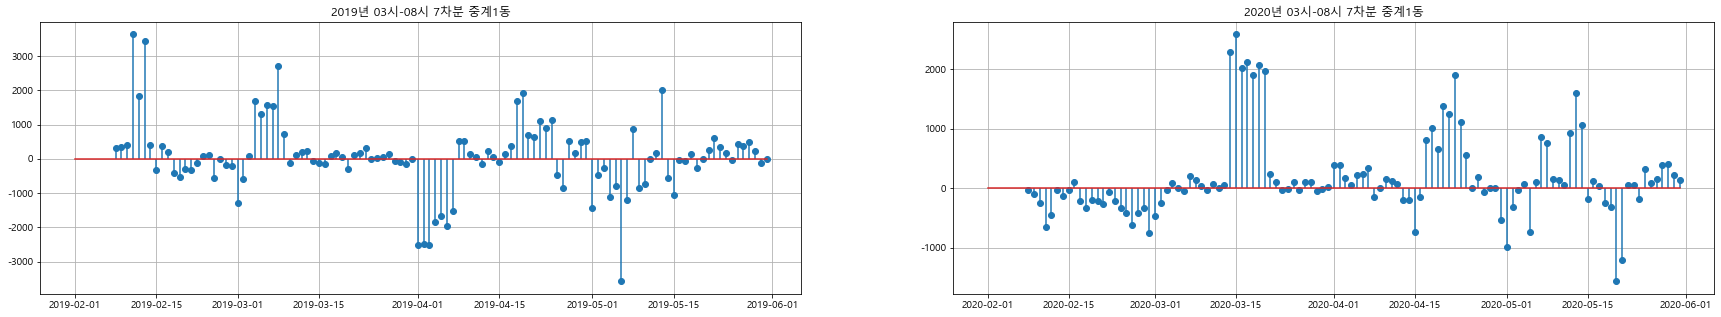

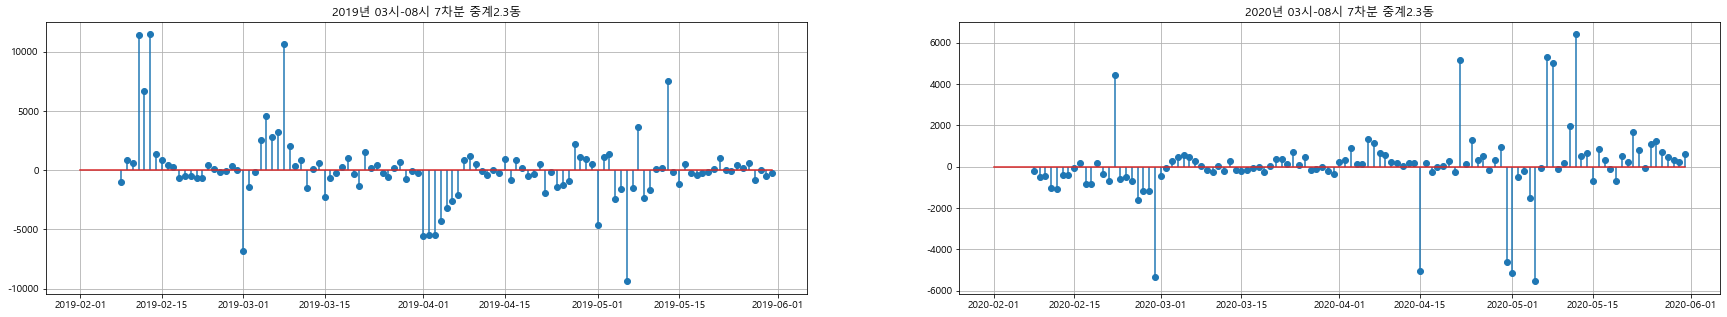

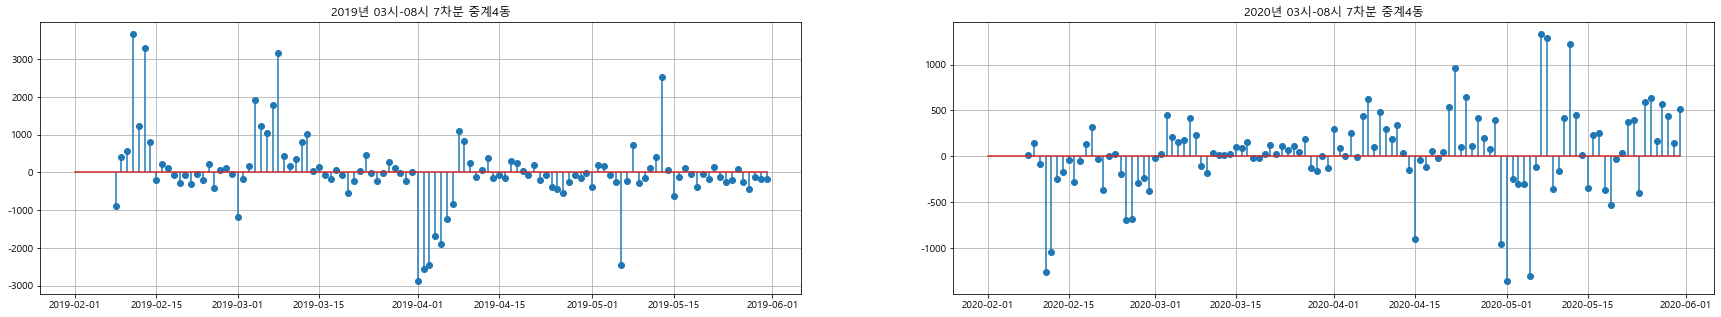

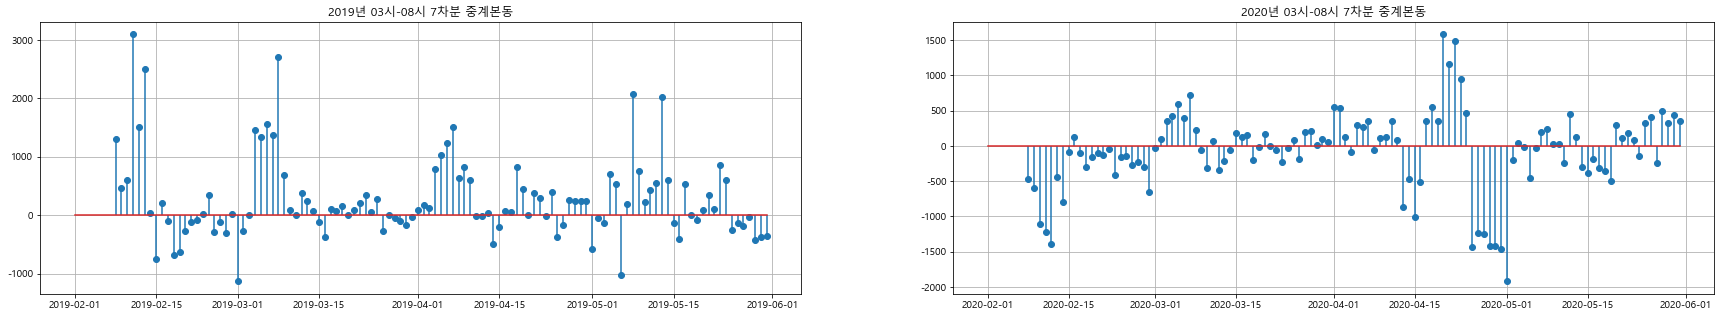

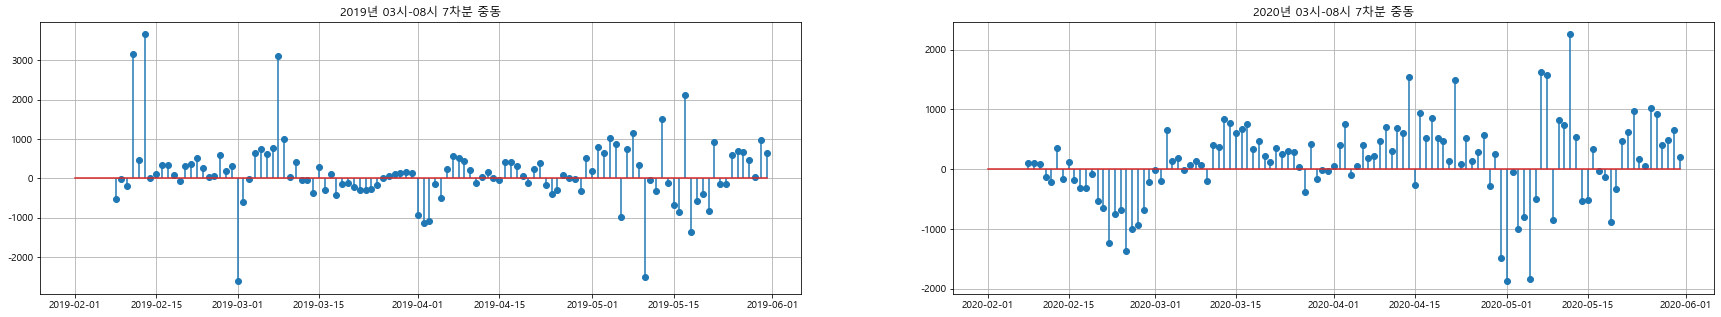

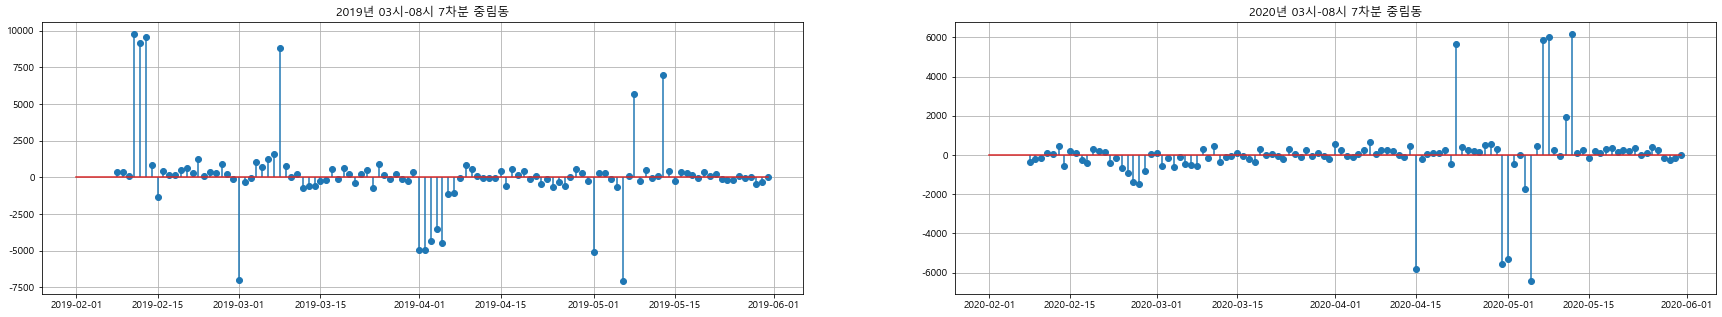

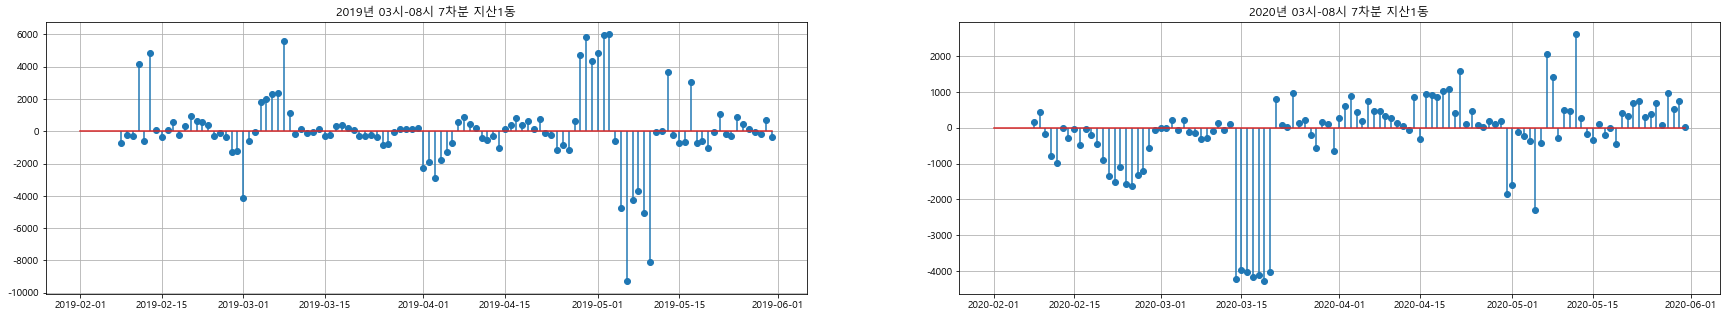

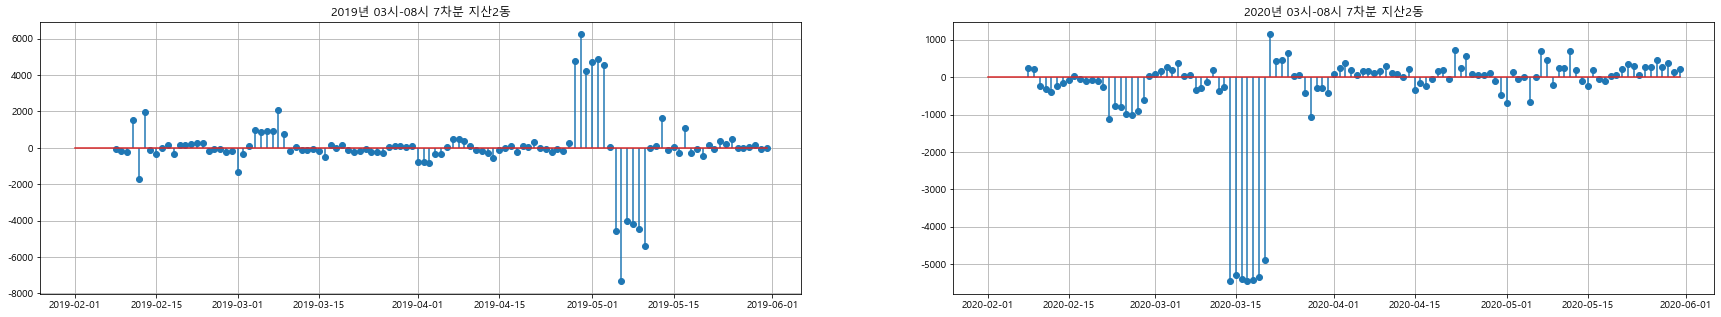

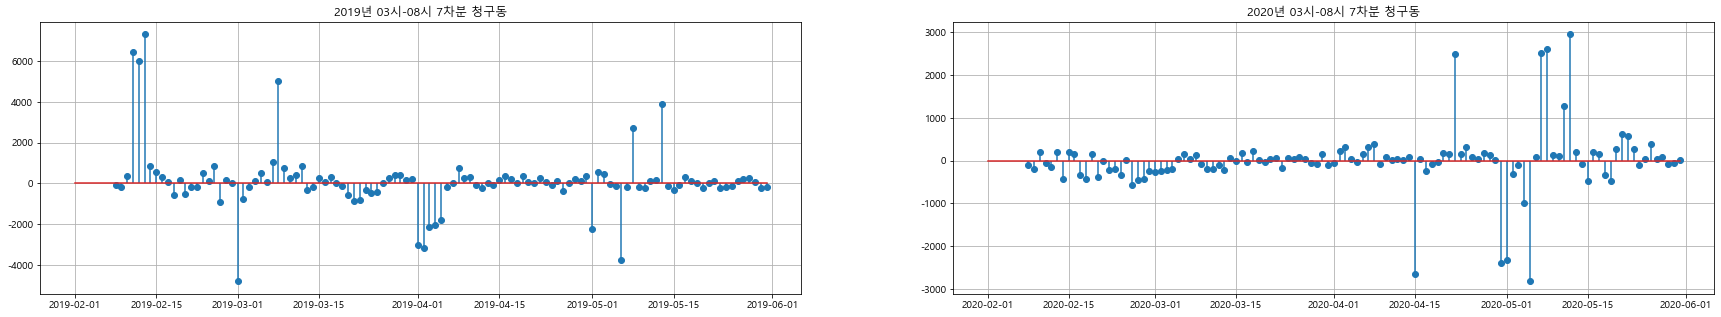

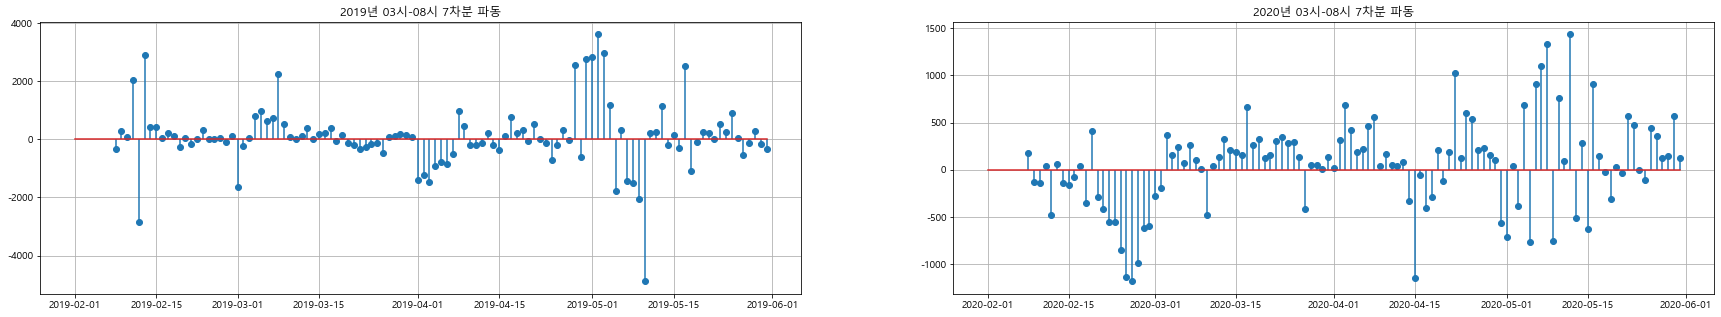

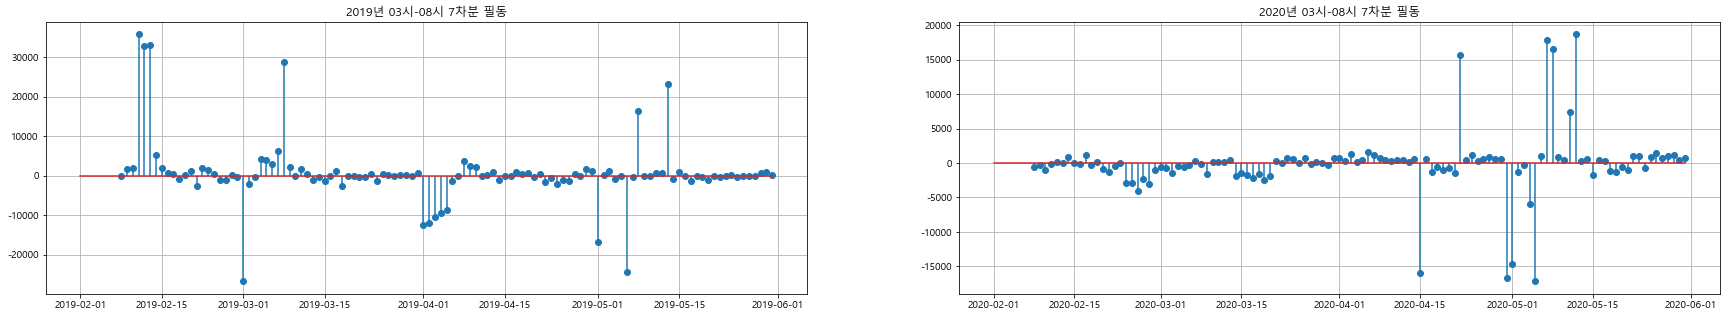

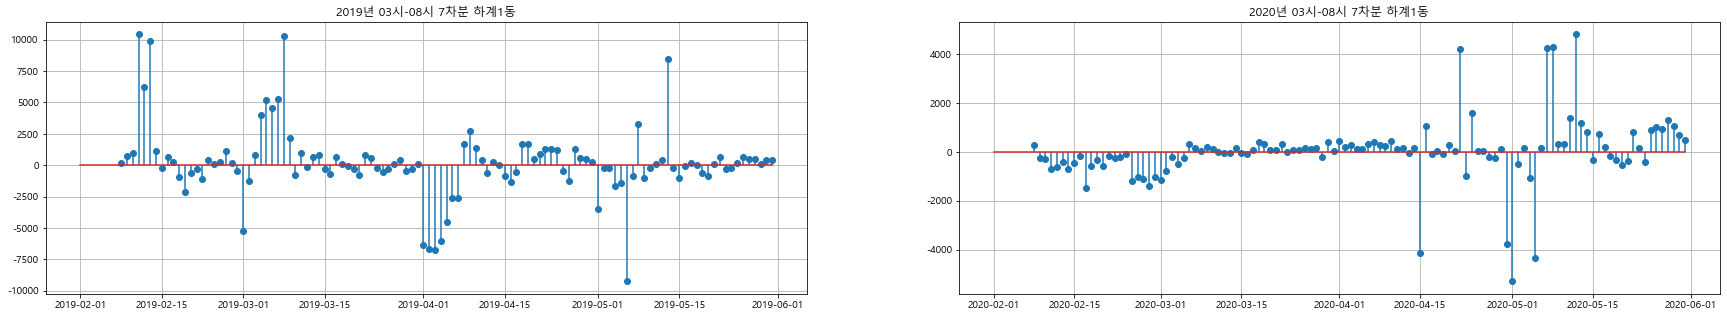

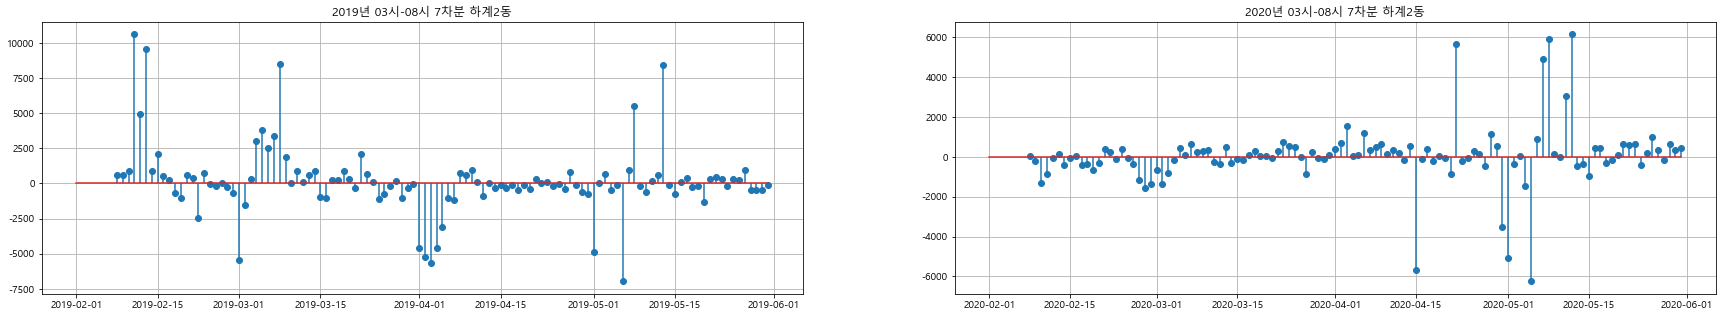

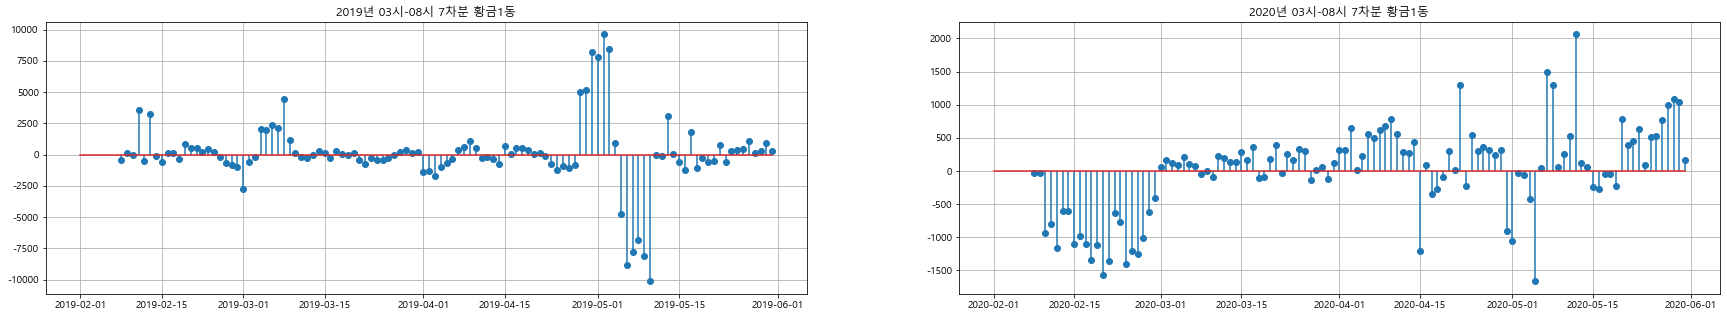

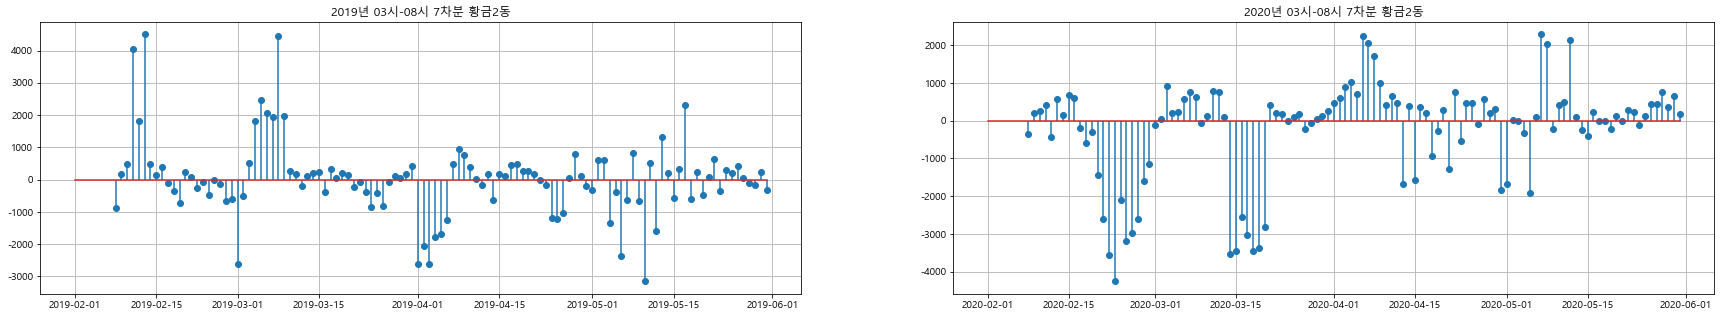

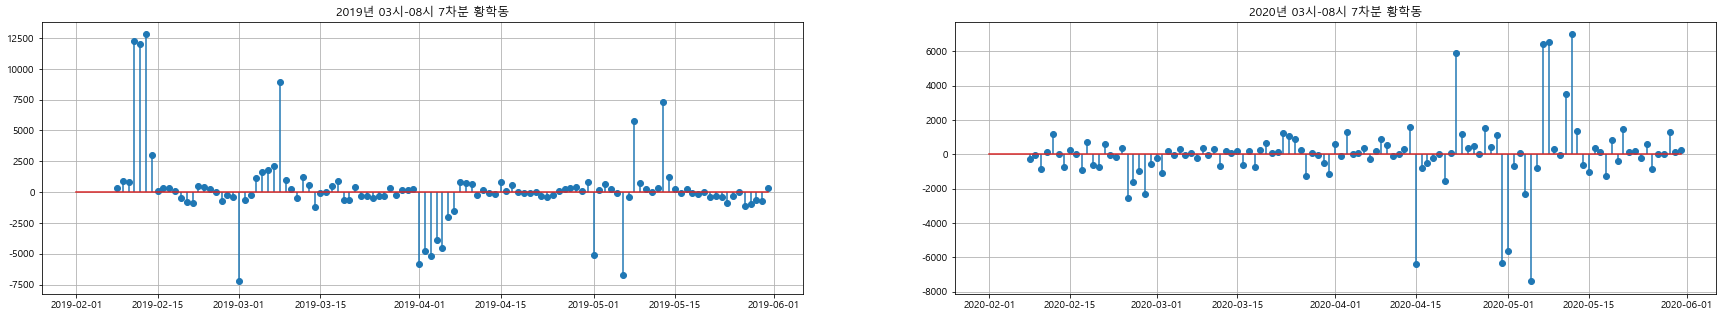

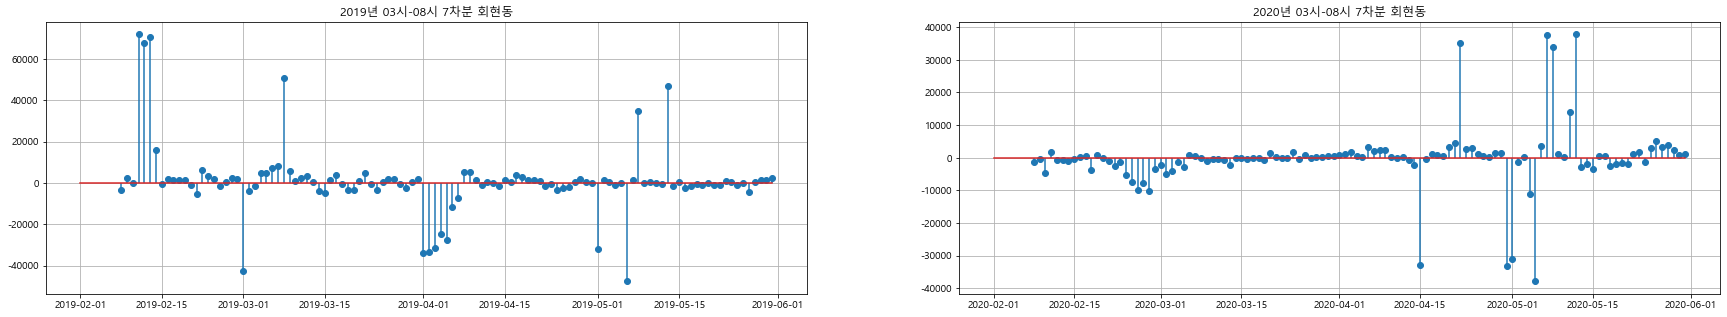

In [14]:
# 22시- 02시 동별 차분 조회하기( Case: diff 7 )
name_list= sk_time_2019_0308.DONG_NM.unique()
diff= 7

for i in range(69):
    name= name_list[i]
    sk_2019_diff_0308 = pd.DataFrame({'DATE': sk_time_2019_0308.query("DONG_NM == @name").DATE ,'DIFF1': sk_time_2019_0308.query("DONG_NM == @name").iloc[:,2] - sk_time_2019_0308.query("DONG_NM == @name").iloc[:,2].shift(diff)})
    sk_2020_diff_0308 = pd.DataFrame({'DATE': sk_time_2020_0308.query("DONG_NM == @name").DATE ,'DIFF1': sk_time_2020_0308.query("DONG_NM == @name").iloc[:,2] - sk_time_2020_0308.query("DONG_NM == @name").iloc[:,2].shift(diff)})
    try:       
        plt.figure(figsize= (30,5))
        plt.subplot(1,2,1)
        plt.stem(sk_2019_diff_0308.iloc[:,0], sk_2019_diff_0308.iloc[:,1], use_line_collection= True)
        plt.title("2019년 03시-08시 7차분 "+name)
        plt.grid('sns')
        
        plt.subplot(1,2,2)
        plt.stem(sk_2020_diff_0308.iloc[:,0], sk_2020_diff_0308.iloc[:,1], use_line_collection= True)
        plt.title("2020년 03시-08시 7차분 "+name)
        plt.grid('sns')
        plt.show()
    except:
        continue